# Linear Algebra Applications: Real-World Data Analysis

This comprehensive notebook demonstrates practical applications of fundamental linear algebra concepts on real-world datasets. We'll explore:

1. **Vectors** - Physics simulations, similarity measures, projections
2. **Matrix Operations** - Transformations, solving systems, neural networks
3. **Basis and Change of Basis** - Coordinate systems, transformations, PCA
4. **Norms** - Regularization, distance metrics, optimization
5. **Eigenvectors and Eigenvalues** - PageRank, eigenfaces, spectral analysis
6. **Tensors** - Image processing, neural networks, multi-dimensional data

## Why Linear Algebra?

Linear algebra is the foundation of modern data science, machine learning, computer graphics, and scientific computing. Understanding these concepts through real-world applications helps bridge theory and practice.


In [44]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import lu, qr, eig, solve
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris, make_blobs
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)


---

## Topic 1: Vectors

Vectors are fundamental building blocks in linear algebra. They represent quantities with both magnitude and direction, making them essential for physics, graphics, and data representation.


### Application 1.1: Vector Addition/Subtraction - Physics Simulations

In physics, forces and velocities are represented as vectors. Vector addition allows us to find the net force or resulting velocity.


Force Vectors:
Force 1: [10  5] N
Force 2: [-3  8] N
Force 3: [ 5 -2] N

Net Force: [12 11] N
Magnitude: 16.28 N
Direction: 42.51°


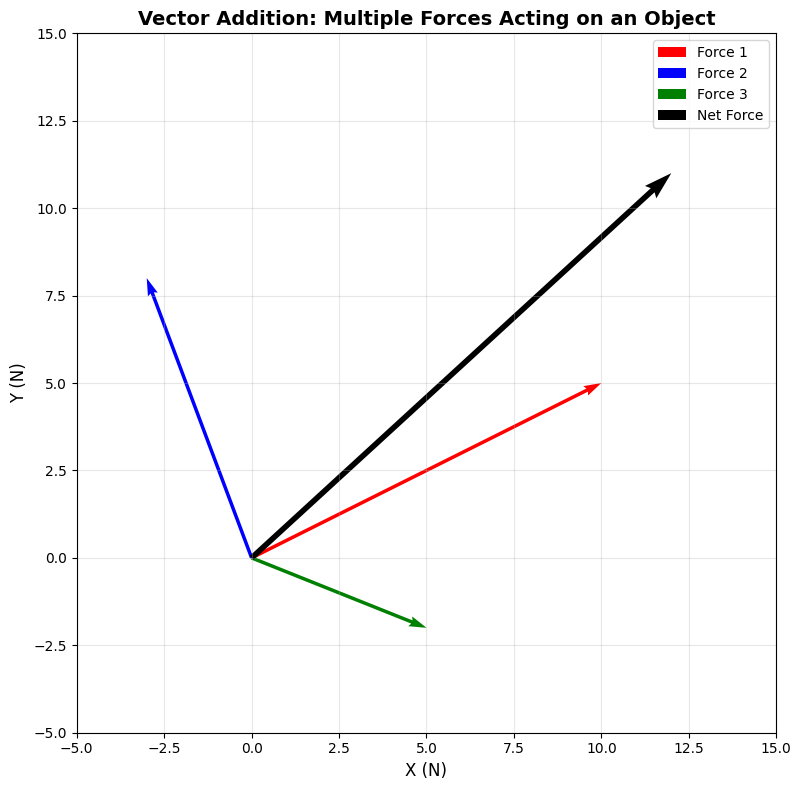

In [2]:
# Simulate multiple forces acting on an object
# Example: Forces on a box being pushed

# Force vectors (in Newtons)
force1 = np.array([10, 5])   # Force pushing right and up
force2 = np.array([-3, 8])   # Force pushing left and up
force3 = np.array([5, -2])   # Force pushing right and down

# Net force (vector sum)
net_force = force1 + force2 + force3

print("Force Vectors:")
print(f"Force 1: {force1} N")
print(f"Force 2: {force2} N")
print(f"Force 3: {force3} N")
print(f"\nNet Force: {net_force} N")
print(f"Magnitude: {np.linalg.norm(net_force):.2f} N")
print(f"Direction: {np.arctan2(net_force[1], net_force[0]) * 180 / np.pi:.2f}°")

# Visualize forces
fig, ax = plt.subplots(figsize=(10, 8))
origin = np.array([0, 0])

# Plot individual forces
forces = [force1, force2, force3]
colors = ['red', 'blue', 'green']
labels = ['Force 1', 'Force 2', 'Force 3']

for i, (force, color, label) in enumerate(zip(forces, colors, labels)):
    ax.quiver(origin[0], origin[1], force[0], force[1], 
             angles='xy', scale_units='xy', scale=1, 
             color=color, width=0.005, label=label)

# Plot net force (solid line, no linestyle argument to avoid error)
ax.quiver(origin[0], origin[1], net_force[0], net_force[1],
         angles='xy', scale_units='xy', scale=1,
         color='black', width=0.008, label='Net Force')

ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)
ax.set_xlabel('X (N)', fontsize=12)
ax.set_ylabel('Y (N)', fontsize=12)
ax.set_title('Vector Addition: Multiple Forces Acting on an Object', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


### Application 1.2: Dot Product - Similarity Measures

The dot product measures how aligned two vectors are. It's fundamental to cosine similarity, which is used extensively in information retrieval and machine learning.


Document Similarity (Cosine Similarity using Dot Product):
Doc 1 vs Doc 1: 1.0000
  'machine learning deep neural networks...'
  'machine learning deep neural networks...'

Doc 1 vs Doc 2: 0.3386
  'machine learning deep neural networks...'
  'artificial intelligence neural networks...'

Doc 1 vs Doc 3: 0.0000
  'machine learning deep neural networks...'
  'data science statistics probability...'

Doc 1 vs Doc 4: 0.0000
  'machine learning deep neural networks...'
  'programming python software development...'

Doc 1 vs Doc 5: 0.5723
  'machine learning deep neural networks...'
  'deep learning convolutional networks...'



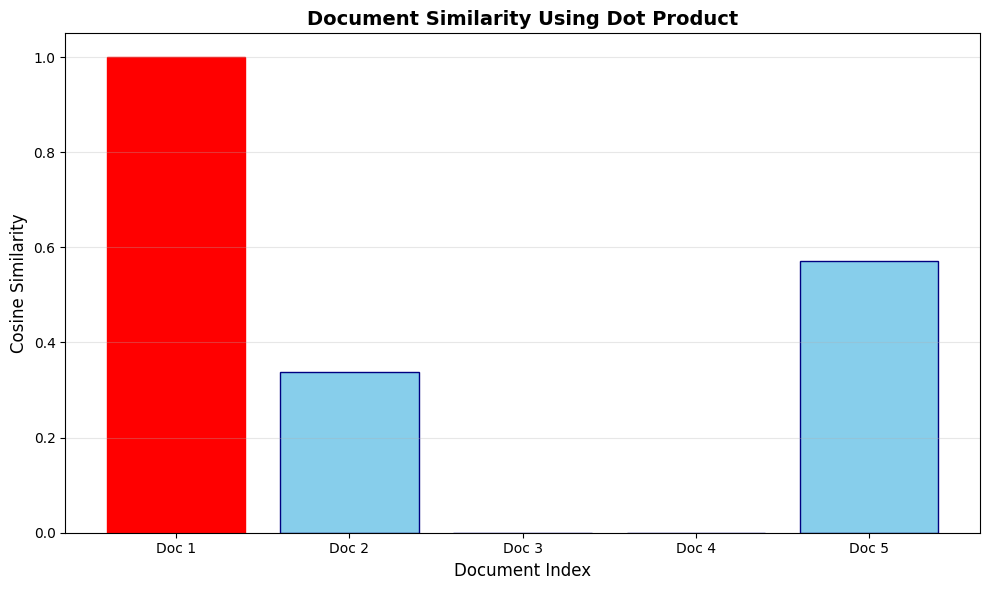

Key Insight: Dot product measures alignment. Cosine similarity normalizes by magnitude.


In [3]:
# Document similarity using TF-IDF vectors and cosine similarity
documents = [
    "machine learning deep neural networks",
    "artificial intelligence neural networks",
    "data science statistics probability",
    "programming python software development",
    "deep learning convolutional networks"
]

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents).toarray()

# Compute cosine similarity using dot product
def cosine_similarity(vec1, vec2):
    """Compute cosine similarity using dot product."""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0
    return dot_product / (norm1 * norm2)

# Compare first document with all others
doc1 = tfidf_matrix[0]
similarities = []

print("Document Similarity (Cosine Similarity using Dot Product):")
print("=" * 70)
for i in range(len(documents)):
    sim = cosine_similarity(doc1, tfidf_matrix[i])
    similarities.append(sim)
    print(f"Doc 1 vs Doc {i+1}: {sim:.4f}")
    print(f"  '{documents[0][:50]}...'")
    print(f"  '{documents[i][:50]}...'")
    print()

# Visualize similarity
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(len(documents)), similarities, color='skyblue', edgecolor='navy')
bars[0].set_color('red')  # Self-similarity
ax.set_xlabel('Document Index', fontsize=12)
ax.set_ylabel('Cosine Similarity', fontsize=12)
ax.set_title('Document Similarity Using Dot Product', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(documents)))
ax.set_xticklabels([f'Doc {i+1}' for i in range(len(documents))])
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Key Insight: Dot product measures alignment. Cosine similarity normalizes by magnitude.")


### Application 1.3: Cross Product - 3D Graphics and Normal Vectors

The cross product finds a vector perpendicular to two given vectors, essential for computing surface normals in 3D graphics.


Triangle Normal Vector Computation:
Vertex 1: [0 0 0]
Vertex 2: [3 0 0]
Vertex 3: [1.5 2.  1. ]

Edge 1 (v2 - v1): [3 0 0]
Edge 2 (v3 - v1): [1.5 2.  1. ]

Normal vector (cross product): [ 0. -3.  6.]
Normalized normal: [ 0.         -0.4472136   0.89442719]
Magnitude: 6.7082


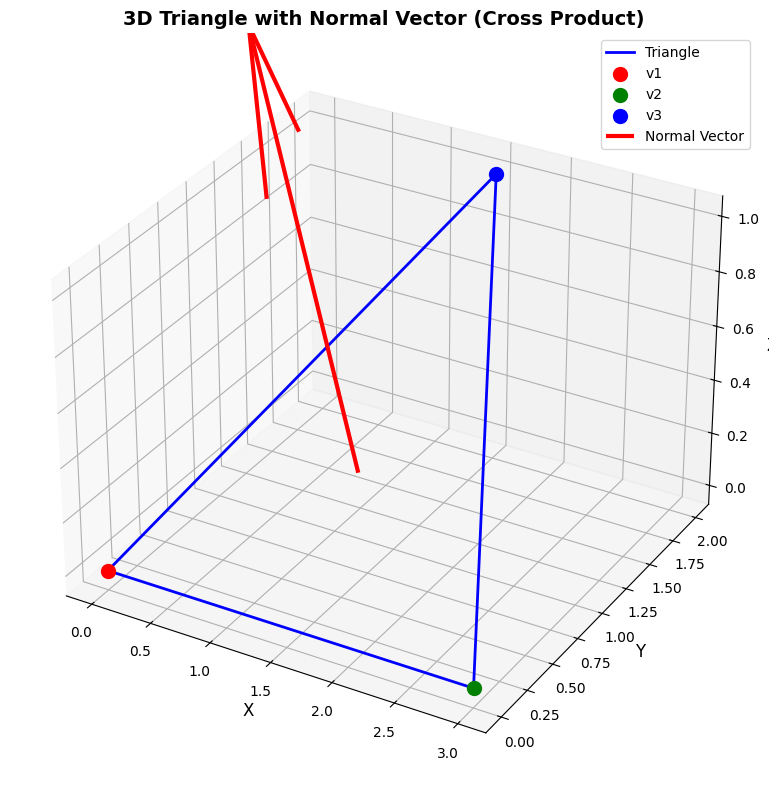


Application: Normal vectors are used for lighting calculations in 3D graphics!


In [4]:
# 3D triangle with normal vector computation
# Define triangle vertices
v1 = np.array([0, 0, 0])
v2 = np.array([3, 0, 0])
v3 = np.array([1.5, 2, 1])

# Edge vectors
edge1 = v2 - v1
edge2 = v3 - v1

# Normal vector using cross product
normal = np.cross(edge1, edge2)
normal_normalized = normal / np.linalg.norm(normal)

print("Triangle Normal Vector Computation:")
print("=" * 50)
print(f"Vertex 1: {v1}")
print(f"Vertex 2: {v2}")
print(f"Vertex 3: {v3}")
print(f"\nEdge 1 (v2 - v1): {edge1}")
print(f"Edge 2 (v3 - v1): {edge2}")
print(f"\nNormal vector (cross product): {normal}")
print(f"Normalized normal: {normal_normalized}")
print(f"Magnitude: {np.linalg.norm(normal):.4f}")

# Visualize triangle and normal
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot triangle
triangle = np.array([v1, v2, v3, v1])
ax.plot(triangle[:, 0], triangle[:, 1], triangle[:, 2], 'b-', linewidth=2, label='Triangle')
ax.scatter(*v1, color='red', s=100, label='v1')
ax.scatter(*v2, color='green', s=100, label='v2')
ax.scatter(*v3, color='blue', s=100, label='v3')

# Plot normal vector from centroid
centroid = (v1 + v2 + v3) / 3
normal_scale = 2
ax.quiver(centroid[0], centroid[1], centroid[2],
         normal_normalized[0] * normal_scale,
         normal_normalized[1] * normal_scale,
         normal_normalized[2] * normal_scale,
         color='red', arrow_length_ratio=0.3, linewidth=3, label='Normal Vector')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('3D Triangle with Normal Vector (Cross Product)', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.show()

print("\nApplication: Normal vectors are used for lighting calculations in 3D graphics!")


### Application 1.4: Vector Spaces - Data Representation

Vectors form the basis of representing data points in feature spaces, fundamental to machine learning.


Data Points as Vectors:
Feature space: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First 5 data points (vectors):
Sample 1: [5.1 3.5 1.4 0.2]
Sample 2: [4.9 3.  1.4 0.2]
Sample 3: [4.7 3.2 1.3 0.2]
Sample 4: [4.6 3.1 1.5 0.2]
Sample 5: [5.  3.6 1.4 0.2]


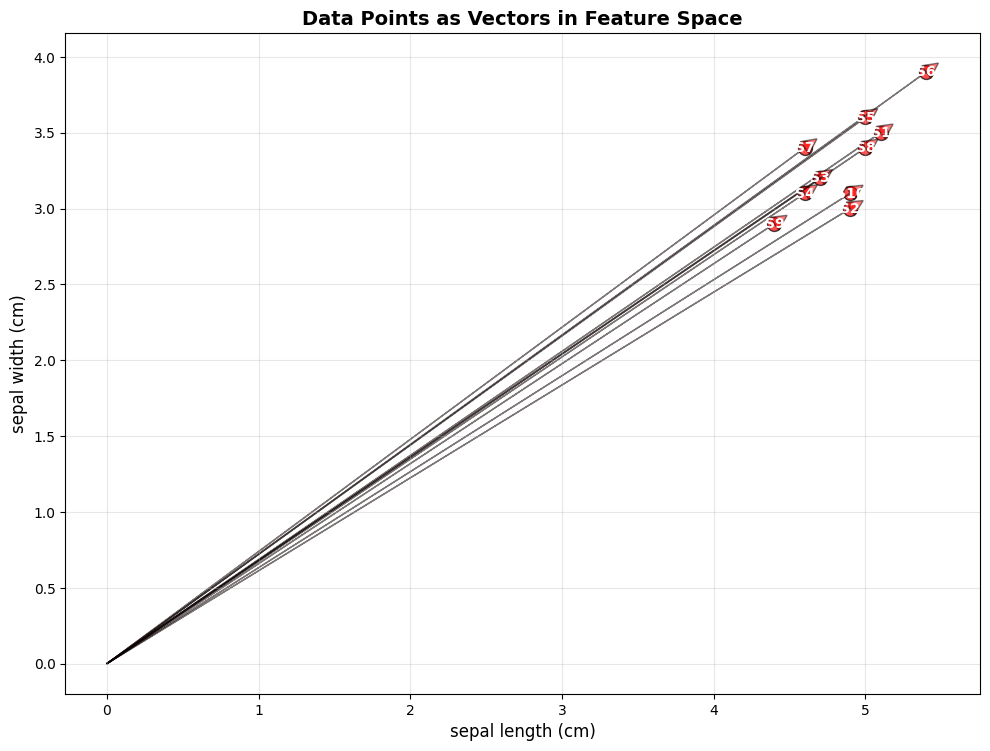


Euclidean Distances Between Vectors:
Distance(S1, S2): 0.5385
Distance(S1, S3): 0.5099
Distance(S2, S3): 0.3000

Key Insight: Each data point is a vector in n-dimensional feature space!
Machine learning algorithms operate on these vector representations.


In [9]:
# Represent data points as vectors in feature space
# Example: Iris dataset features as vectors

iris = load_iris()
X = iris.data[:10]  # First 10 samples
feature_names = iris.feature_names

print("Data Points as Vectors:")
print("=" * 70)
print(f"Feature space: {feature_names}")
print(f"\nFirst 5 data points (vectors):")
for i in range(5):
    print(f"Sample {i+1}: {X[i]}")

# Visualize in 2D feature space (first 2 features)
fig, ax = plt.subplots(figsize=(10, 8))

colors_map = ['red', 'green', 'blue']
target_names = iris.target_names

for i in range(len(X)):
    color = colors_map[iris.target[i]]
    ax.scatter(X[i, 0], X[i, 1], c=color, s=100, alpha=0.7, 
              edgecolors='black', linewidth=1)
    ax.annotate(f'S{i+1}', (X[i, 0], X[i, 1]), fontsize=10, 
               ha='center', va='center', color='white', fontweight='bold')

# Draw vectors from origin
for i in range(len(X)):
    ax.arrow(0, 0, X[i, 0], X[i, 1], head_width=0.1, head_length=0.1,
            fc=colors_map[iris.target[i]], ec='black', alpha=0.5, linewidth=1)

ax.set_xlabel(feature_names[0], fontsize=12)
ax.set_ylabel(feature_names[1], fontsize=12)
ax.set_title('Data Points as Vectors in Feature Space', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

# Compute distances between vectors
print("\nEuclidean Distances Between Vectors:")
print("=" * 50)
for i in range(3):
    for j in range(i+1, 3):
        distance = np.linalg.norm(X[i] - X[j])
        print(f"Distance(S{i+1}, S{j+1}): {distance:.4f}")

print("\nKey Insight: Each data point is a vector in n-dimensional feature space!")
print("Machine learning algorithms operate on these vector representations.")


### Application 1.5: Vector Norms - Distance Metrics

Different norms measure distance differently, each with specific applications.


Vector Norms Comparison:
Vector: [3 4]

L1 norm (Manhattan): 7.0
L2 norm (Euclidean): 5.0
L∞ norm (Chebyshev): 4.0


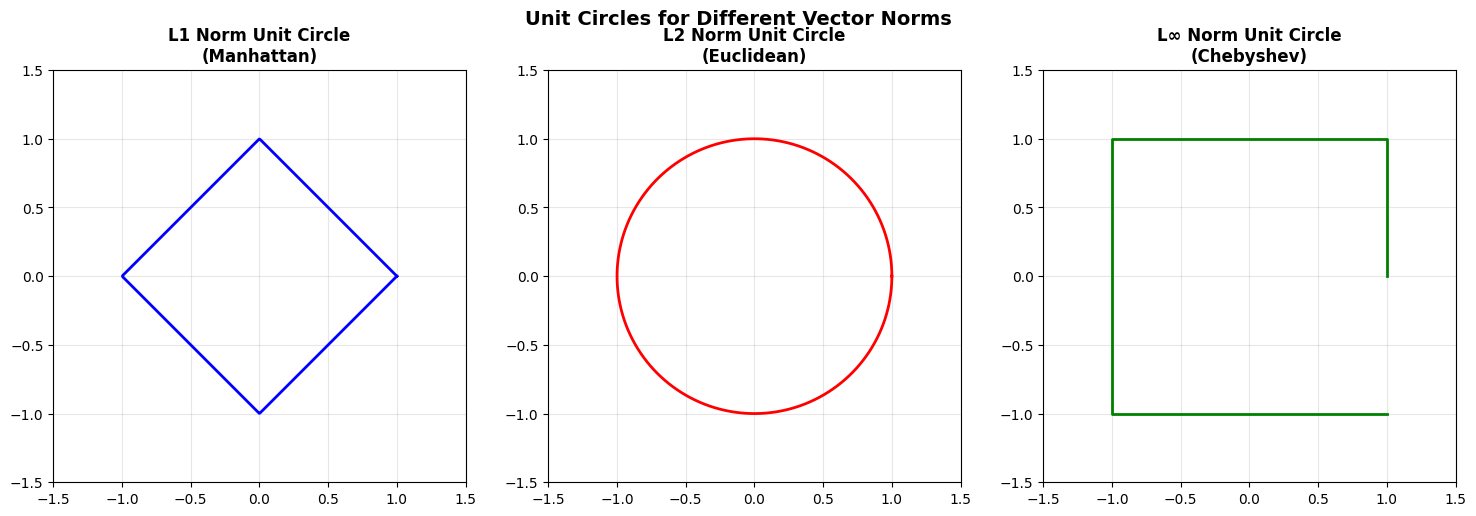


Applications:
- L1: Sparse solutions, Lasso regression, feature selection
- L2: Standard distance, Ridge regression, regularization
- L∞: Error bounds, worst-case analysis


In [10]:
# Compare different vector norms
v1 = np.array([3, 4])
v2 = np.array([0, 0])

# Different norms
l1_norm = np.linalg.norm(v1, ord=1)  # Manhattan distance
l2_norm = np.linalg.norm(v1, ord=2)  # Euclidean distance
linf_norm = np.linalg.norm(v1, ord=np.inf)  # Chebyshev distance

print("Vector Norms Comparison:")
print("=" * 50)
print(f"Vector: {v1}")
print(f"\nL1 norm (Manhattan): {l1_norm}")
print(f"L2 norm (Euclidean): {l2_norm}")
print(f"L∞ norm (Chebyshev): {linf_norm}")

# Visualize unit circles for different norms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

theta = np.linspace(0, 2*np.pi, 1000)

# L1 unit circle (diamond)
x_l1 = np.cos(theta) / (np.abs(np.cos(theta)) + np.abs(np.sin(theta)))
y_l1 = np.sin(theta) / (np.abs(np.cos(theta)) + np.abs(np.sin(theta)))
axes[0].plot(x_l1, y_l1, 'b-', linewidth=2)
axes[0].set_title('L1 Norm Unit Circle\n(Manhattan)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)

# L2 unit circle (circle)
x_l2 = np.cos(theta)
y_l2 = np.sin(theta)
axes[1].plot(x_l2, y_l2, 'r-', linewidth=2)
axes[1].set_title('L2 Norm Unit Circle\n(Euclidean)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

# L∞ unit circle (square)
x_linf = np.sign(np.cos(theta)) * np.minimum(1, 1/np.abs(np.cos(theta)))
y_linf = np.sign(np.sin(theta)) * np.minimum(1, 1/np.abs(np.sin(theta)))
axes[2].plot(x_linf, y_linf, 'g-', linewidth=2)
axes[2].set_title('L∞ Norm Unit Circle\n(Chebyshev)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)

plt.suptitle('Unit Circles for Different Vector Norms', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications:")
print("- L1: Sparse solutions, Lasso regression, feature selection")
print("- L2: Standard distance, Ridge regression, regularization")
print("- L∞: Error bounds, worst-case analysis")


---

## Topic 2: Matrix Operations

Matrix operations are the computational backbone of linear algebra, enabling transformations, solving systems, and representing complex operations.


### Application 2.1: Matrix Multiplication - Neural Network Forward Pass

Matrix multiplication is fundamental to neural networks, where each layer performs a linear transformation.


Neural Network Forward Pass (Matrix Multiplication):
Input shape: (5, 3)
Hidden layer shape: (5, 4)
Output shape: (5, 2)

First sample:
  Input: [ 0.49671415 -0.1382643   0.64768854]
  Hidden (before activation): [-0.63112004 -1.6589636  -0.03254256 -1.80755711]
  Hidden (after ReLU): [0. 0. 0. 0.]
  Output: [0.19686124 0.73846658]


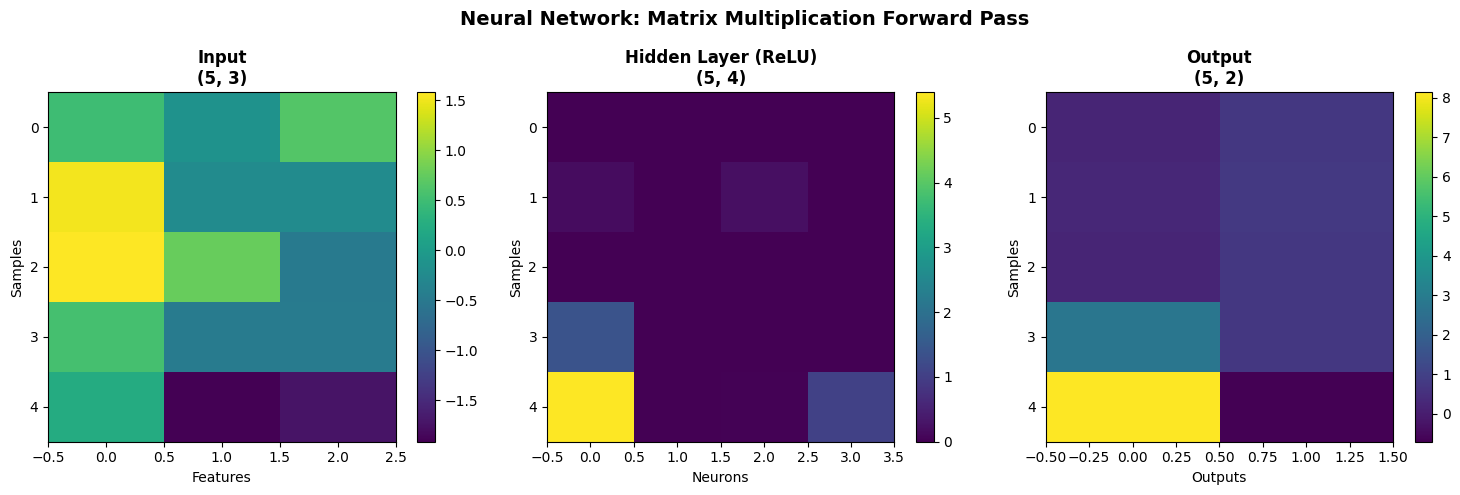


Key Insight: Each layer is a matrix multiplication: output = input @ weights + bias


In [11]:
# Simulate a simple neural network layer
# Input: 3 features, Output: 2 neurons, Hidden layer: 4 neurons

# Input data (batch of 5 samples)
X = np.random.randn(5, 3)  # 5 samples × 3 features

# Weights for first layer
W1 = np.random.randn(3, 4)  # 3 inputs × 4 hidden neurons
b1 = np.random.randn(4)      # Bias for hidden layer

# Weights for output layer
W2 = np.random.randn(4, 2)  # 4 hidden × 2 outputs
b2 = np.random.randn(2)      # Bias for output layer

# Forward pass
hidden = X @ W1 + b1  # Matrix multiplication + bias
hidden_activated = np.maximum(0, hidden)  # ReLU activation
output = hidden_activated @ W2 + b2  # Final layer

print("Neural Network Forward Pass (Matrix Multiplication):")
print("=" * 60)
print(f"Input shape: {X.shape}")
print(f"Hidden layer shape: {hidden.shape}")
print(f"Output shape: {output.shape}")
print(f"\nFirst sample:")
print(f"  Input: {X[0]}")
print(f"  Hidden (before activation): {hidden[0]}")
print(f"  Hidden (after ReLU): {hidden_activated[0]}")
print(f"  Output: {output[0]}")

# Visualize the transformation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Input
im1 = axes[0].imshow(X, cmap='viridis', aspect='auto')
axes[0].set_title(f'Input\n{X.shape}', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Samples')
plt.colorbar(im1, ax=axes[0])

# Hidden layer
im2 = axes[1].imshow(hidden_activated, cmap='viridis', aspect='auto')
axes[1].set_title(f'Hidden Layer (ReLU)\n{hidden_activated.shape}', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Neurons')
axes[1].set_ylabel('Samples')
plt.colorbar(im2, ax=axes[1])

# Output
im3 = axes[2].imshow(output, cmap='viridis', aspect='auto')
axes[2].set_title(f'Output\n{output.shape}', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Outputs')
axes[2].set_ylabel('Samples')
plt.colorbar(im3, ax=axes[2])

plt.suptitle('Neural Network: Matrix Multiplication Forward Pass', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insight: Each layer is a matrix multiplication: output = input @ weights + bias")


### Application 2.2: Matrix Addition/Subtraction - Image Blending

Matrix addition enables blending images, adjusting brightness, and combining transformations.


Image Operations Using Matrix Addition/Subtraction:
Image shapes: (200, 200)
Blending coefficient: 0.5


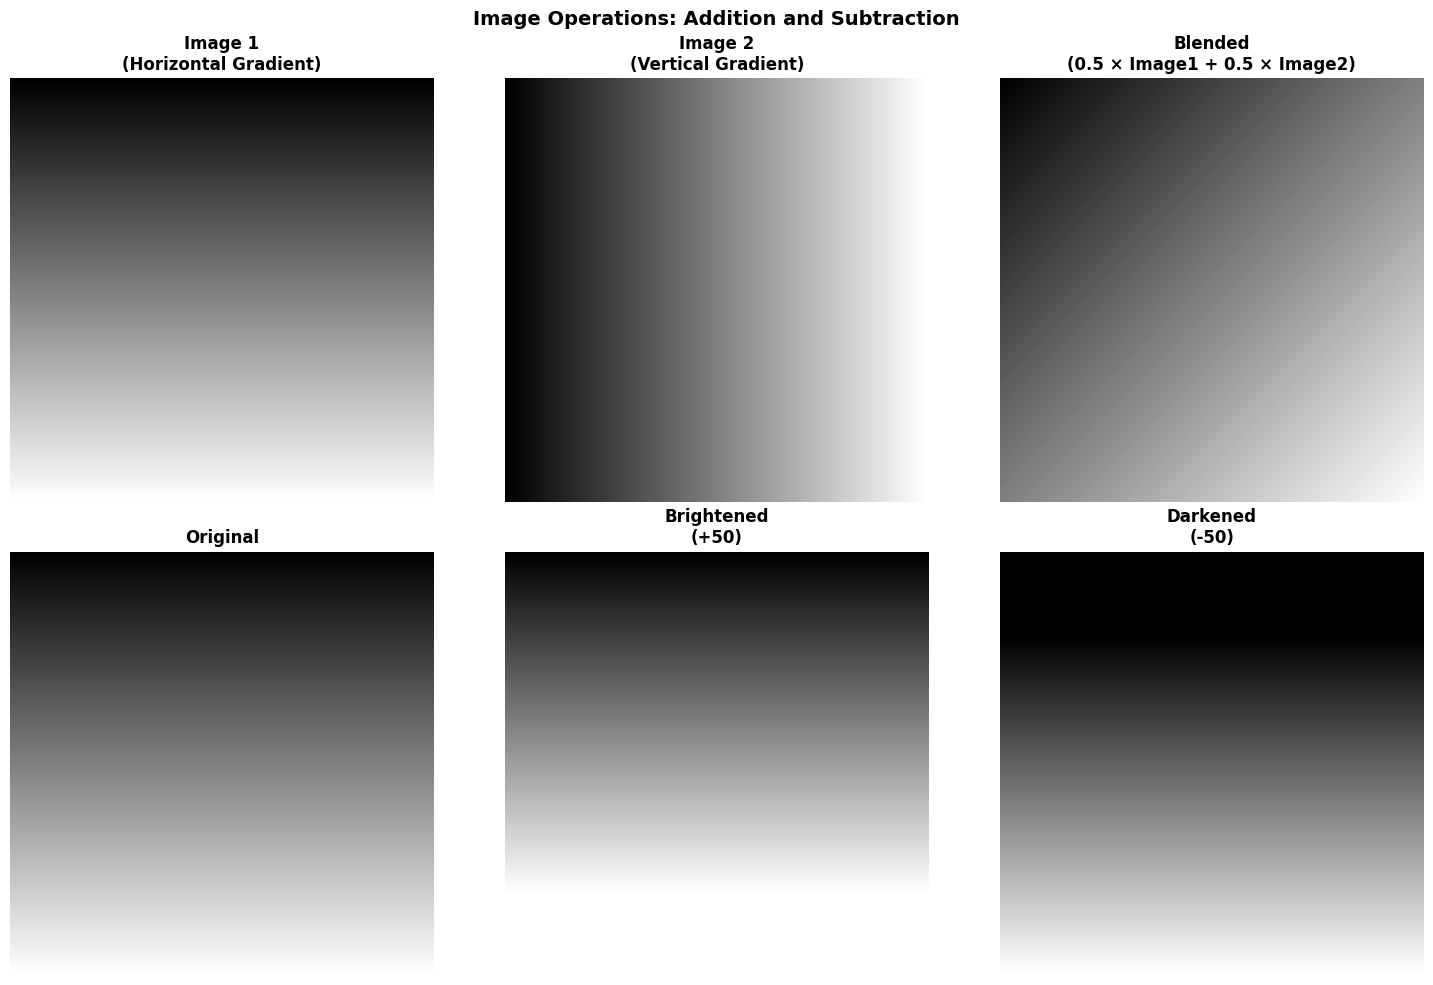


Applications: Image blending, brightness adjustment, noise addition/subtraction


In [12]:
# Create sample images and blend them
size = (200, 200)

# Image 1: Horizontal gradient
image1 = np.zeros(size)
for i in range(size[0]):
    image1[i, :] = i * 255 / size[0]

# Image 2: Vertical gradient
image2 = np.zeros(size)
for j in range(size[1]):
    image2[:, j] = j * 255 / size[1]

# Blend images (weighted addition)
alpha = 0.5
blended = alpha * image1 + (1 - alpha) * image2
blended = np.clip(blended, 0, 255).astype(np.uint8)

# Brightness adjustment (addition)
brightened = np.clip(image1.astype(float) + 50, 0, 255).astype(np.uint8)
darkened = np.clip(image1.astype(float) - 50, 0, 255).astype(np.uint8)

print("Image Operations Using Matrix Addition/Subtraction:")
print("=" * 60)
print(f"Image shapes: {image1.shape}")
print(f"Blending coefficient: {alpha}")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(image1, cmap='gray')
axes[0, 0].set_title('Image 1\n(Horizontal Gradient)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(image2, cmap='gray')
axes[0, 1].set_title('Image 2\n(Vertical Gradient)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(blended, cmap='gray')
axes[0, 2].set_title('Blended\n(0.5 × Image1 + 0.5 × Image2)', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(image1, cmap='gray')
axes[1, 0].set_title('Original', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(brightened, cmap='gray')
axes[1, 1].set_title('Brightened\n(+50)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(darkened, cmap='gray')
axes[1, 2].set_title('Darkened\n(-50)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle('Image Operations: Addition and Subtraction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Image blending, brightness adjustment, noise addition/subtraction")


### Application 2.3: Matrix Transpose - Data Reshaping and Covariance

The transpose operation is crucial for reshaping data and computing covariance matrices.


Covariance Matrix Computation Using Transpose:
Data shape: (4, 3) (samples × features)
Data:
[[1 2 3]
 [4 5 6]
 [7 8 9]
 [2 3 4]]

Centered data:
[[-2.5 -2.5 -2.5]
 [ 0.5  0.5  0.5]
 [ 3.5  3.5  3.5]
 [-1.5 -1.5 -1.5]]

Covariance matrix shape: (3, 3)
Covariance matrix:
[[7. 7. 7.]
 [7. 7. 7.]
 [7. 7. 7.]]

NumPy covariance (verification):
[[7. 7. 7.]
 [7. 7. 7.]
 [7. 7. 7.]]

Difference: 8.88e-16


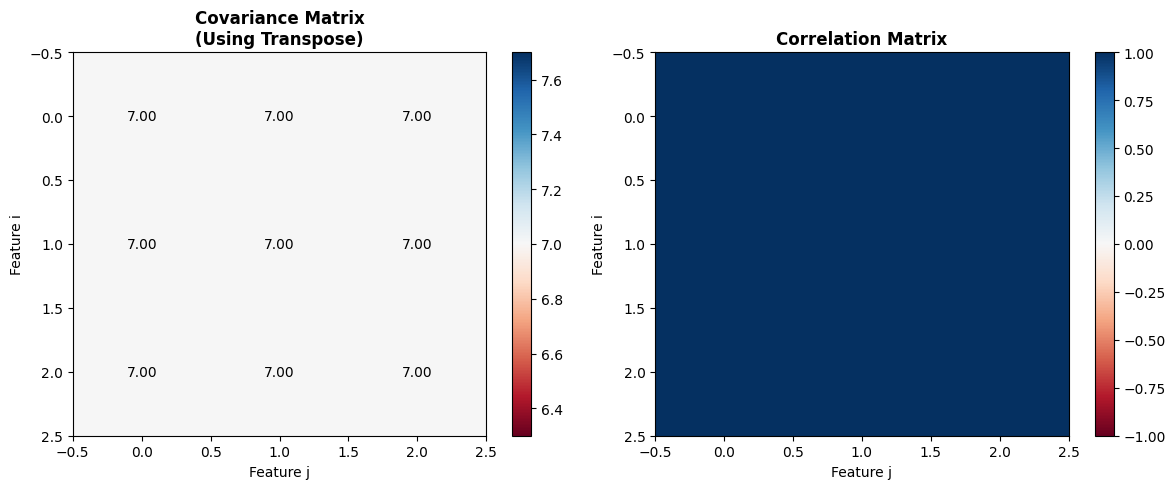


Key Insight: Covariance = (1/(n-1)) × X^T × X (after centering)
Transpose is essential for computing relationships between features!


In [13]:
# Compute covariance matrix using transpose
# Data: samples in rows, features in columns
data = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [2, 3, 4]
])

# Center the data
data_centered = data - np.mean(data, axis=0)

# Covariance matrix: (1/(n-1)) * X^T @ X
covariance = (1 / (data.shape[0] - 1)) * data_centered.T @ data_centered

print("Covariance Matrix Computation Using Transpose:")
print("=" * 60)
print(f"Data shape: {data.shape} (samples × features)")
print(f"Data:\n{data}")
print(f"\nCentered data:\n{data_centered}")
print(f"\nCovariance matrix shape: {covariance.shape}")
print(f"Covariance matrix:\n{covariance}")

# Verify with NumPy
cov_numpy = np.cov(data.T)
print(f"\nNumPy covariance (verification):\n{cov_numpy}")
print(f"\nDifference: {np.max(np.abs(covariance - cov_numpy)):.2e}")

# Visualize covariance matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(covariance, cmap='RdBu', aspect='auto')
axes[0].set_title('Covariance Matrix\n(Using Transpose)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Feature j')
axes[0].set_ylabel('Feature i')
plt.colorbar(im1, ax=axes[0])

# Add values to matrix
for i in range(covariance.shape[0]):
    for j in range(covariance.shape[1]):
        axes[0].text(j, i, f'{covariance[i, j]:.2f}', 
                     ha='center', va='center', fontsize=10)

# Correlation matrix (normalized covariance)
std_dev = np.sqrt(np.diag(covariance))
correlation = covariance / np.outer(std_dev, std_dev)

im2 = axes[1].imshow(correlation, cmap='RdBu', aspect='auto', vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature j')
axes[1].set_ylabel('Feature i')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

print("\nKey Insight: Covariance = (1/(n-1)) × X^T × X (after centering)")
print("Transpose is essential for computing relationships between features!")


### Application 2.4: Matrix Inverse - Solving Linear Systems

Matrix inversion solves systems of linear equations, fundamental to many computational problems.


Solving Linear System: Ax = b
Matrix A:
[[3 2 1]
 [1 3 2]
 [2 1 3]]

Vector b: [14 11 13]

Solution (using inverse): x = [3.11111111 1.44444444 1.77777778]
Solution (using solve): x = [3.11111111 1.44444444 1.77777778]

Verification: A @ x = [14. 11. 13.] (should equal b)

Determinant of A: 18.0000
Is A invertible? True


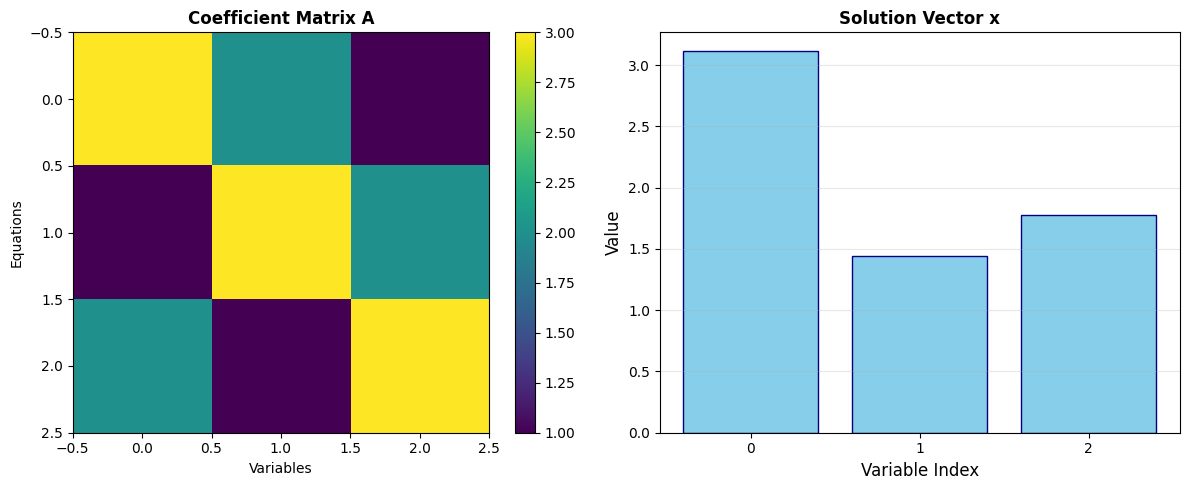


Applications: Circuit analysis, resource allocation, optimization problems
Note: solve() is preferred over inv() for numerical stability!


In [14]:
# Solve linear system: Ax = b
# Example: Circuit analysis or resource allocation

A = np.array([
    [3, 2, 1],
    [1, 3, 2],
    [2, 1, 3]
])

b = np.array([14, 11, 13])

print("Solving Linear System: Ax = b")
print("=" * 50)
print(f"Matrix A:\n{A}")
print(f"\nVector b: {b}")

# Method 1: Using matrix inverse
A_inv = np.linalg.inv(A)
x_inv = A_inv @ b

# Method 2: Using solve (more numerically stable)
x_solve = solve(A, b)

print(f"\nSolution (using inverse): x = {x_inv}")
print(f"Solution (using solve): x = {x_solve}")
print(f"\nVerification: A @ x = {A @ x_solve} (should equal b)")

# Check determinant (invertibility)
det_A = np.linalg.det(A)
print(f"\nDeterminant of A: {det_A:.4f}")
print(f"Is A invertible? {abs(det_A) > 1e-10}")

# Visualize the system
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matrix A
im1 = axes[0].imshow(A, cmap='viridis', aspect='auto')
axes[0].set_title('Coefficient Matrix A', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Equations')
plt.colorbar(im1, ax=axes[0])

# Solution
axes[1].bar(range(len(x_solve)), x_solve, color='skyblue', edgecolor='navy')
axes[1].set_xlabel('Variable Index', fontsize=12)
axes[1].set_ylabel('Value', fontsize=12)
axes[1].set_title('Solution Vector x', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(len(x_solve)))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nApplications: Circuit analysis, resource allocation, optimization problems")
print("Note: solve() is preferred over inv() for numerical stability!")


### Application 2.5: Matrix Determinant - Volume Calculations

The determinant measures how a linear transformation scales volumes/areas.


Determinant and Area Scaling:
Transformation matrix:
[[2 1]
 [1 2]]
Determinant: 3.0000
Area scaling factor: 3.0000x
Original area: 1.0
Transformed area: 3.0000


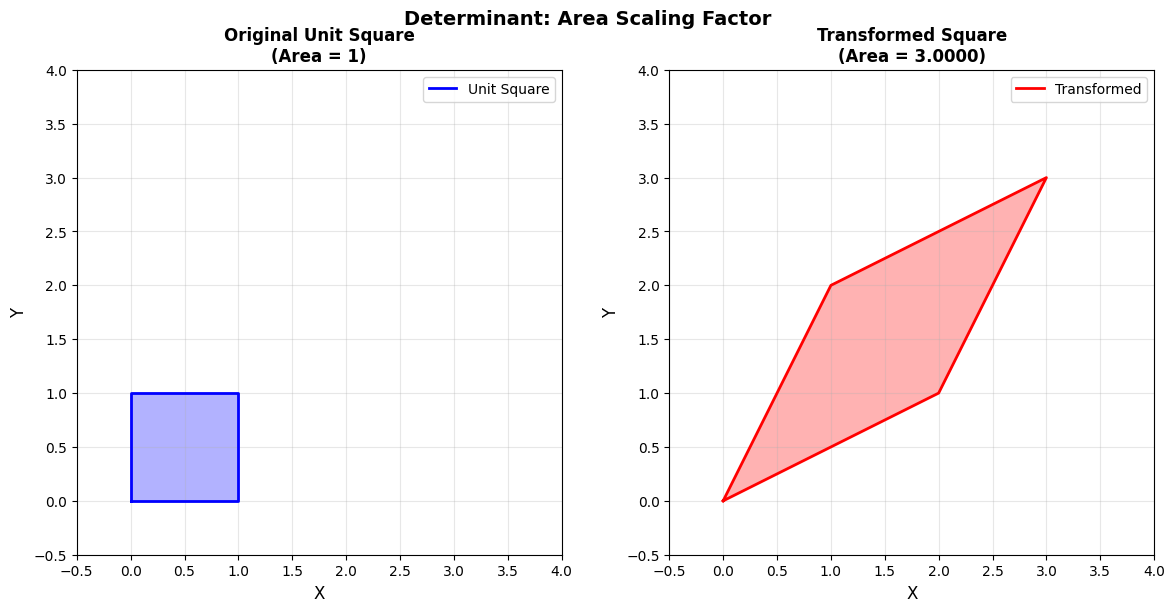


3D Example:
Transformation matrix:
[[2.  0.  0. ]
 [0.  3.  0. ]
 [0.  0.  1.5]]
Determinant: 9.0000
Volume scaling: 9.0000x (unit cube → 9.0000 volume)

Applications: Volume calculations, change of variables in integration,
checking invertibility (det ≠ 0), orientation preservation


In [15]:
# Determinant and area/volume scaling
# 2D: Area scaling, 3D: Volume scaling

# 2D transformation
A_2d = np.array([
    [2, 1],
    [1, 2]
])

det_2d = np.linalg.det(A_2d)

# Unit square vertices
unit_square = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Transform unit square
transformed_square = (A_2d @ unit_square.T).T

print("Determinant and Area Scaling:")
print("=" * 50)
print(f"Transformation matrix:\n{A_2d}")
print(f"Determinant: {det_2d:.4f}")
print(f"Area scaling factor: {det_2d:.4f}x")
print(f"Original area: 1.0")
print(f"Transformed area: {det_2d:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original unit square
axes[0].plot(unit_square[:, 0], unit_square[:, 1], 'b-', linewidth=2, label='Unit Square')
axes[0].fill(unit_square[:, 0], unit_square[:, 1], alpha=0.3, color='blue')
axes[0].set_xlim(-0.5, 4)
axes[0].set_ylim(-0.5, 4)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('Original Unit Square\n(Area = 1)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')
axes[0].legend()

# Transformed square
axes[1].plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', linewidth=2, label='Transformed')
axes[1].fill(transformed_square[:, 0], transformed_square[:, 1], alpha=0.3, color='red')
axes[1].set_xlim(-0.5, 4)
axes[1].set_ylim(-0.5, 4)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].set_title(f'Transformed Square\n(Area = {det_2d:.4f})', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')
axes[1].legend()

plt.suptitle('Determinant: Area Scaling Factor', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3D volume example
A_3d = np.array([
    [2, 0, 0],
    [0, 3, 0],
    [0, 0, 1.5]
])

det_3d = np.linalg.det(A_3d)
print(f"\n3D Example:")
print(f"Transformation matrix:\n{A_3d}")
print(f"Determinant: {det_3d:.4f}")
print(f"Volume scaling: {det_3d:.4f}x (unit cube → {det_3d:.4f} volume)")

print("\nApplications: Volume calculations, change of variables in integration,")
print("checking invertibility (det ≠ 0), orientation preservation")


### Application 2.6: Matrix Decompositions - LU and QR

Matrix decompositions break matrices into simpler components, enabling efficient solving of systems.


LU Decomposition: A = P @ L @ U
Original matrix A:
[[4 3 2]
 [2 4 1]
 [1 2 3]]

Permutation matrix P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Lower triangular L:
[[1.   0.   0.  ]
 [0.5  1.   0.  ]
 [0.25 0.5  1.  ]]

Upper triangular U:
[[4.  3.  2. ]
 [0.  2.5 0. ]
 [0.  0.  2.5]]

Verification: P @ L @ U =
[[4. 3. 2.]
 [2. 4. 1.]
 [1. 2. 3.]]

QR Decomposition: A = Q @ R
Orthogonal matrix Q:
[[-8.72871561e-01  4.87950036e-01  2.32271053e-17]
 [-4.36435780e-01 -7.80720058e-01 -4.47213595e-01]
 [-2.18217890e-01 -3.90360029e-01  8.94427191e-01]]

Upper triangular R:
[[-4.58257569 -4.80079359 -2.83683257]
 [ 0.         -2.43975018 -0.97590007]
 [ 0.          0.          2.23606798]]

Verification: Q @ R =
[[4. 3. 2.]
 [2. 4. 1.]
 [1. 2. 3.]]

Q is orthogonal? Q^T @ Q = I:
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 5.55111512e-17]
 [0.00000000e+00 5.55111512e-17 1.00000000e+00]]

Solving Ax = b using LU:
b = [10  8  6]
Solution (LU): [1.2 1.2 0.8]
Solut

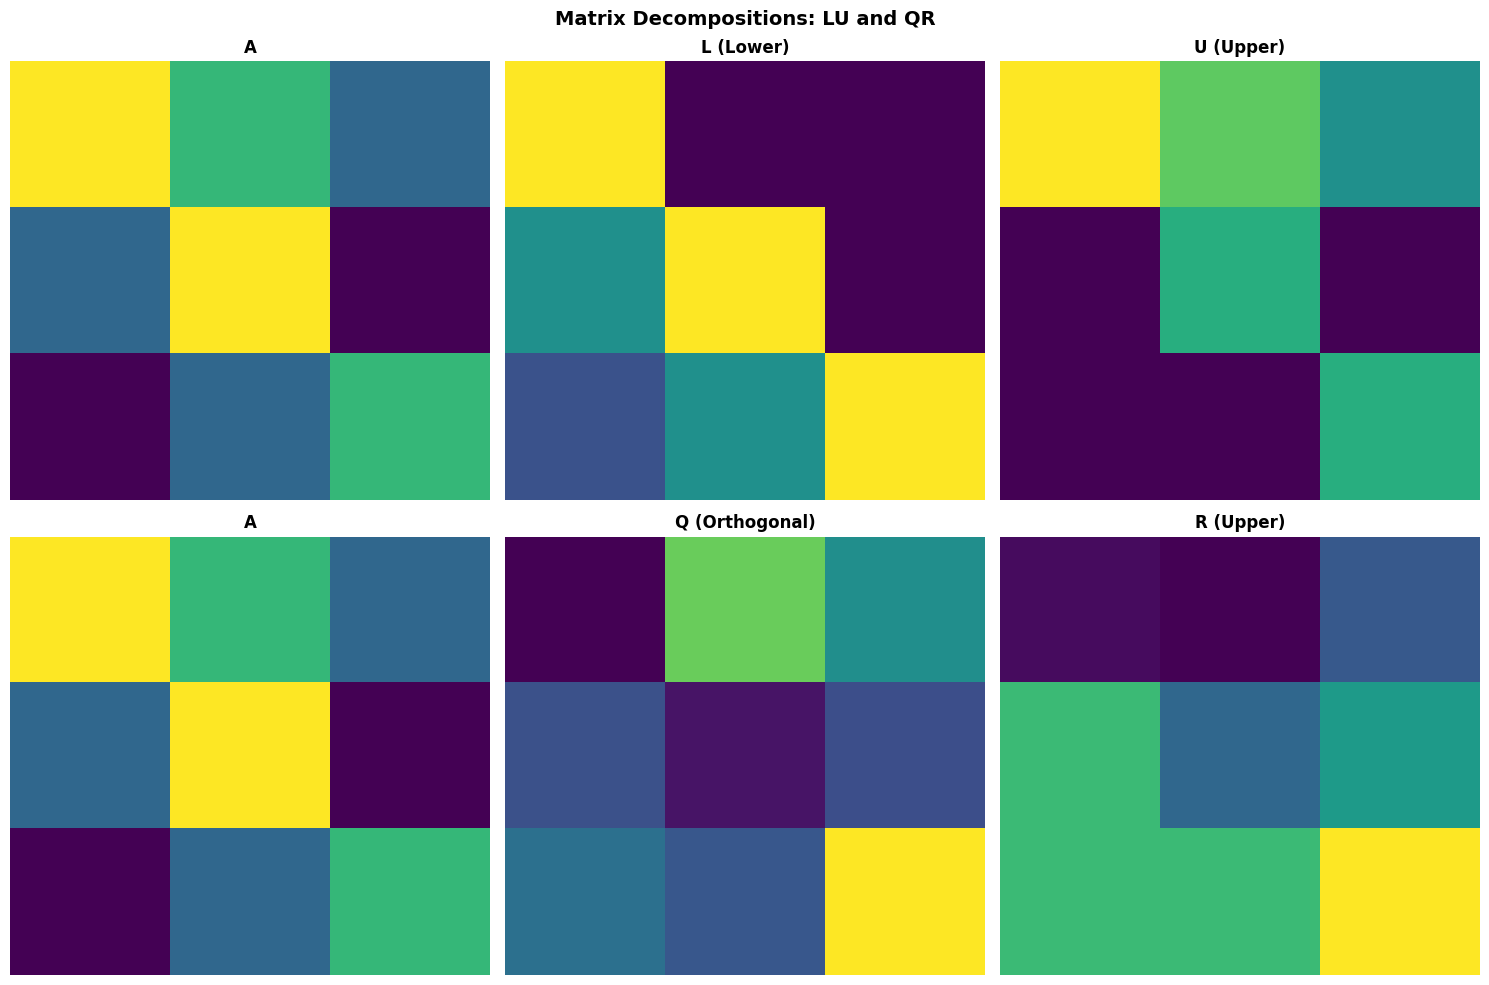


Applications:
- LU: Efficient solving of multiple systems, matrix inversion
- QR: Least squares, eigenvalue computation, Gram-Schmidt process


In [16]:
# LU Decomposition: A = L @ U
# Useful for solving multiple systems with same A

A = np.array([
    [4, 3, 2],
    [2, 4, 1],
    [1, 2, 3]
])

P, L, U = lu(A)

print("LU Decomposition: A = P @ L @ U")
print("=" * 50)
print(f"Original matrix A:\n{A}")
print(f"\nPermutation matrix P:\n{P}")
print(f"\nLower triangular L:\n{L}")
print(f"\nUpper triangular U:\n{U}")
print(f"\nVerification: P @ L @ U =\n{P @ L @ U}")

# QR Decomposition: A = Q @ R
# Q is orthogonal, R is upper triangular

Q, R = qr(A)

print(f"\nQR Decomposition: A = Q @ R")
print("=" * 50)
print(f"Orthogonal matrix Q:\n{Q}")
print(f"\nUpper triangular R:\n{R}")
print(f"\nVerification: Q @ R =\n{Q @ R}")
print(f"\nQ is orthogonal? Q^T @ Q = I:\n{Q.T @ Q}")

# Solve system using LU decomposition
b = np.array([10, 8, 6])

# Solve Ly = Pb (forward substitution)
Pb = P @ b
y = solve(L, Pb)

# Solve Ux = y (backward substitution)
x_lu = solve(U, y)

# Compare with direct solve
x_direct = solve(A, b)

print(f"\nSolving Ax = b using LU:")
print(f"b = {b}")
print(f"Solution (LU): {x_lu}")
print(f"Solution (direct): {x_direct}")
print(f"Difference: {np.max(np.abs(x_lu - x_direct)):.2e}")

# Visualize decompositions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# LU decomposition
axes[0, 0].imshow(A, cmap='viridis', aspect='auto')
axes[0, 0].set_title('A', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(L, cmap='viridis', aspect='auto')
axes[0, 1].set_title('L (Lower)', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(U, cmap='viridis', aspect='auto')
axes[0, 2].set_title('U (Upper)', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# QR decomposition
axes[1, 0].imshow(A, cmap='viridis', aspect='auto')
axes[1, 0].set_title('A', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(Q, cmap='viridis', aspect='auto')
axes[1, 1].set_title('Q (Orthogonal)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(R, cmap='viridis', aspect='auto')
axes[1, 2].set_title('R (Upper)', fontsize=12, fontweight='bold')
axes[1, 2].axis('off')

plt.suptitle('Matrix Decompositions: LU and QR', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications:")
print("- LU: Efficient solving of multiple systems, matrix inversion")
print("- QR: Least squares, eigenvalue computation, Gram-Schmidt process")


---

## Topic 3: Basis and Change of Basis

A basis is a set of linearly independent vectors that span a vector space. Changing basis allows us to represent the same data in different coordinate systems.


### Application 3.1: Standard Basis - Coordinate Systems

The standard basis vectors form the foundation of our coordinate system.


Standard Basis Vectors:
2D standard basis:
  e1 = [1 0]
  e2 = [0 1]

Vector v = [3 4] in standard basis:
  v = 3 × e1 + 4 × e2
  v = 3 × [1 0] + 4 × [0 1]

3D standard basis:
  e1 = [1 0 0]
  e2 = [0 1 0]
  e3 = [0 0 1]

Vector v = [2 3 4] in standard basis:
  v = 2 × e1 + 3 × e2 + 4 × e3


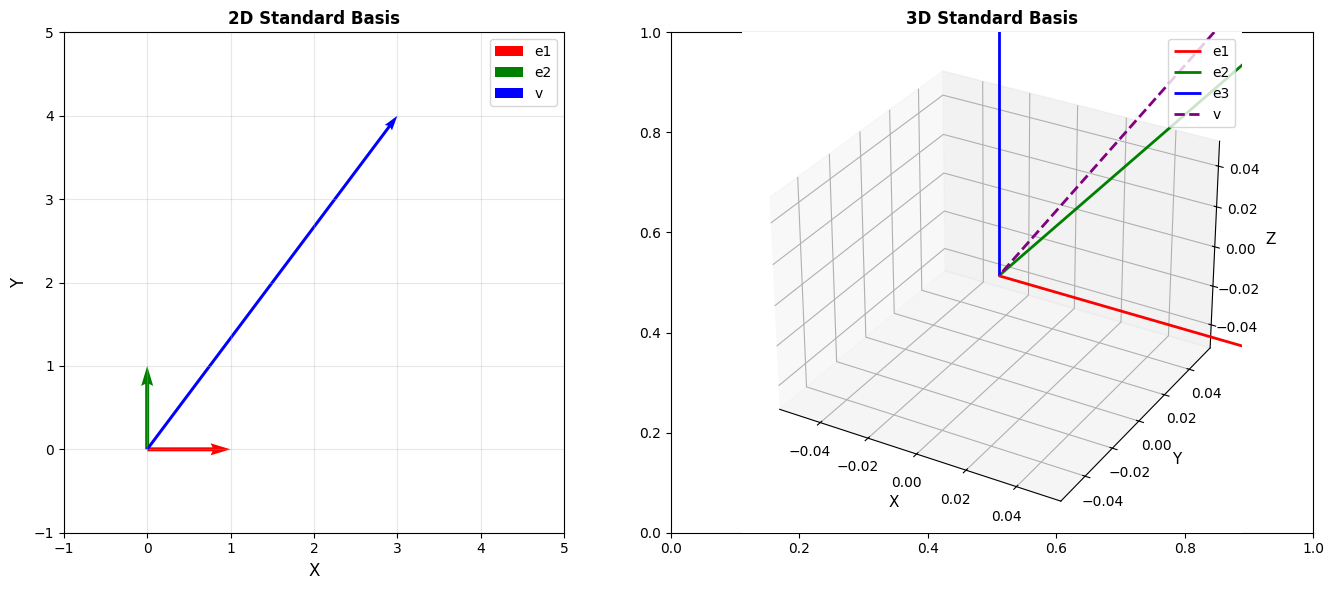


Key Insight: Standard basis makes coordinates = components!
Any vector can be expressed as a linear combination of basis vectors.


In [17]:
# Standard basis in 2D and 3D
e1_2d = np.array([1, 0])
e2_2d = np.array([0, 1])

e1_3d = np.array([1, 0, 0])
e2_3d = np.array([0, 1, 0])
e3_3d = np.array([0, 0, 1])

# Express a vector in standard basis
v_2d = np.array([3, 4])
v_3d = np.array([2, 3, 4])

print("Standard Basis Vectors:")
print("=" * 50)
print(f"2D standard basis:")
print(f"  e1 = {e1_2d}")
print(f"  e2 = {e2_2d}")
print(f"\nVector v = {v_2d} in standard basis:")
print(f"  v = {v_2d[0]} × e1 + {v_2d[1]} × e2")
print(f"  v = {v_2d[0]} × {e1_2d} + {v_2d[1]} × {e2_2d}")

print(f"\n3D standard basis:")
print(f"  e1 = {e1_3d}")
print(f"  e2 = {e2_3d}")
print(f"  e3 = {e3_3d}")
print(f"\nVector v = {v_3d} in standard basis:")
print(f"  v = {v_3d[0]} × e1 + {v_3d[1]} × e2 + {v_3d[2]} × e3")

# Visualize 2D standard basis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2D
origin = np.array([0, 0])
axes[0].quiver(origin[0], origin[1], e1_2d[0], e1_2d[1],
              angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='e1', linewidth=2)
axes[0].quiver(origin[0], origin[1], e2_2d[0], e2_2d[1],
              angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='e2', linewidth=2)
axes[0].quiver(origin[0], origin[1], v_2d[0], v_2d[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.006, label='v', linestyle='--', linewidth=2)

axes[0].set_xlim(-1, 5)
axes[0].set_ylim(-1, 5)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('2D Standard Basis', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')

# 3D
ax_3d = fig.add_subplot(122, projection='3d')
ax_3d.quiver(0, 0, 0, e1_3d[0], e1_3d[1], e1_3d[2], color='red', arrow_length_ratio=0.3, linewidth=2, label='e1')
ax_3d.quiver(0, 0, 0, e2_3d[0], e2_3d[1], e2_3d[2], color='green', arrow_length_ratio=0.3, linewidth=2, label='e2')
ax_3d.quiver(0, 0, 0, e3_3d[0], e3_3d[1], e3_3d[2], color='blue', arrow_length_ratio=0.3, linewidth=2, label='e3')
ax_3d.quiver(0, 0, 0, v_3d[0], v_3d[1], v_3d[2], color='purple', arrow_length_ratio=0.3, linewidth=2, label='v', linestyle='--')

ax_3d.set_xlabel('X', fontsize=11)
ax_3d.set_ylabel('Y', fontsize=11)
ax_3d.set_zlabel('Z', fontsize=11)
ax_3d.set_title('3D Standard Basis', fontsize=12, fontweight='bold')
ax_3d.legend()

plt.tight_layout()
plt.show()

print("\nKey Insight: Standard basis makes coordinates = components!")
print("Any vector can be expressed as a linear combination of basis vectors.")


### Application 3.2: Orthogonal Basis - Gram-Schmidt Process

The Gram-Schmidt process creates an orthogonal basis from a set of linearly independent vectors.


Gram-Schmidt Process:
Original vectors:
  v1 = [1 1 0]
  v2 = [1 0 1]
  v3 = [0 1 1]

Orthogonal basis:
  u1 = [1. 1. 0.]
  u2 = [ 0.5 -0.5  1. ]
  u3 = [-0.66666667  0.66666667  0.66666667]

Orthonormal basis (normalized):
  e1 = [0.70710678 0.70710678 0.        ]
  e2 = [ 0.40824829 -0.40824829  0.81649658]
  e3 = [-0.57735027  0.57735027  0.57735027]

Orthogonality check (dot products should be 0):
  e1 · e2 = 0.000000
  e1 · e3 = 0.000000
  e2 · e3 = 0.000000

Norm check (should be 1):
  ||e1|| = 1.000000
  ||e2|| = 1.000000
  ||e3|| = 1.000000


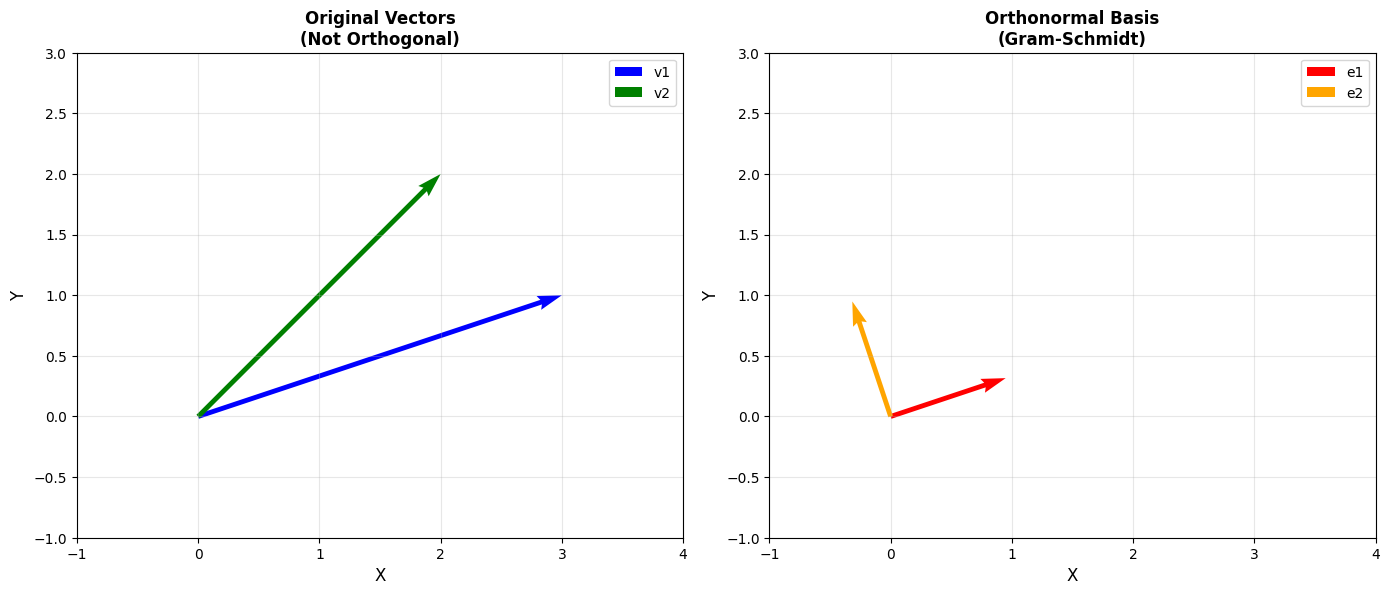


Applications: QR decomposition, orthogonalization, signal processing


In [18]:
# Gram-Schmidt process to create orthogonal basis
def gram_schmidt(vectors):
    """Apply Gram-Schmidt process to create orthogonal basis."""
    n = len(vectors)
    orthogonal = []
    
    for i in range(n):
        v = vectors[i].copy()
        # Subtract projections onto previous orthogonal vectors
        for j in range(i):
            proj = np.dot(v, orthogonal[j]) / np.dot(orthogonal[j], orthogonal[j])
            v = v - proj * orthogonal[j]
        orthogonal.append(v)
    
    # Normalize to get orthonormal basis
    orthonormal = [v / np.linalg.norm(v) for v in orthogonal]
    return np.array(orthogonal), np.array(orthonormal)

# Example: Create orthogonal basis from non-orthogonal vectors
v1 = np.array([1, 1, 0])
v2 = np.array([1, 0, 1])
v3 = np.array([0, 1, 1])

vectors = [v1, v2, v3]
orthogonal_basis, orthonormal_basis = gram_schmidt(vectors)

print("Gram-Schmidt Process:")
print("=" * 60)
print("Original vectors:")
for i, v in enumerate(vectors):
    print(f"  v{i+1} = {v}")

print("\nOrthogonal basis:")
for i, v in enumerate(orthogonal_basis):
    print(f"  u{i+1} = {v}")

print("\nOrthonormal basis (normalized):")
for i, v in enumerate(orthonormal_basis):
    print(f"  e{i+1} = {v}")

# Verify orthogonality
print("\nOrthogonality check (dot products should be 0):")
for i in range(len(orthonormal_basis)):
    for j in range(i+1, len(orthonormal_basis)):
        dot = np.dot(orthonormal_basis[i], orthonormal_basis[j])
        print(f"  e{i+1} · e{j+1} = {dot:.6f}")

# Verify orthonormality (norms should be 1)
print("\nNorm check (should be 1):")
for i, v in enumerate(orthonormal_basis):
    norm = np.linalg.norm(v)
    print(f"  ||e{i+1}|| = {norm:.6f}")

# Visualize 2D example
v1_2d = np.array([3, 1])
v2_2d = np.array([2, 2])
orth_2d, orthonorm_2d = gram_schmidt([v1_2d, v2_2d])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original vectors
origin = np.array([0, 0])
axes[0].quiver(origin[0], origin[1], v1_2d[0], v1_2d[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.008, label='v1', linewidth=2)
axes[0].quiver(origin[0], origin[1], v2_2d[0], v2_2d[1],
              angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='v2', linewidth=2)
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-1, 3)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('Original Vectors\n(Not Orthogonal)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')

# Orthonormal basis
axes[1].quiver(origin[0], origin[1], orthonorm_2d[0, 0], orthonorm_2d[0, 1],
              angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='e1', linewidth=2)
axes[1].quiver(origin[0], origin[1], orthonorm_2d[1, 0], orthonorm_2d[1, 1],
              angles='xy', scale_units='xy', scale=1,
              color='orange', width=0.008, label='e2', linewidth=2)
axes[1].set_xlim(-1, 4)
axes[1].set_ylim(-1, 3)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].set_title('Orthonormal Basis\n(Gram-Schmidt)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nApplications: QR decomposition, orthogonalization, signal processing")


### Application 3.3: Change of Basis - Coordinate Transformations

Changing basis allows us to represent the same vector in different coordinate systems.


Change of Basis:
Vector in standard basis: [3 2]

New basis vectors:
  b1 = [1 1]
  b2 = [-1  1]

Change of basis matrix B:
[[ 1 -1]
 [ 1  1]]

Vector in new basis: [ 2.5 -0.5]
  v = 2.50 × b1 + -0.50 × b2

Verification: B @ v_new = [3. 2.] (should equal [3 2])


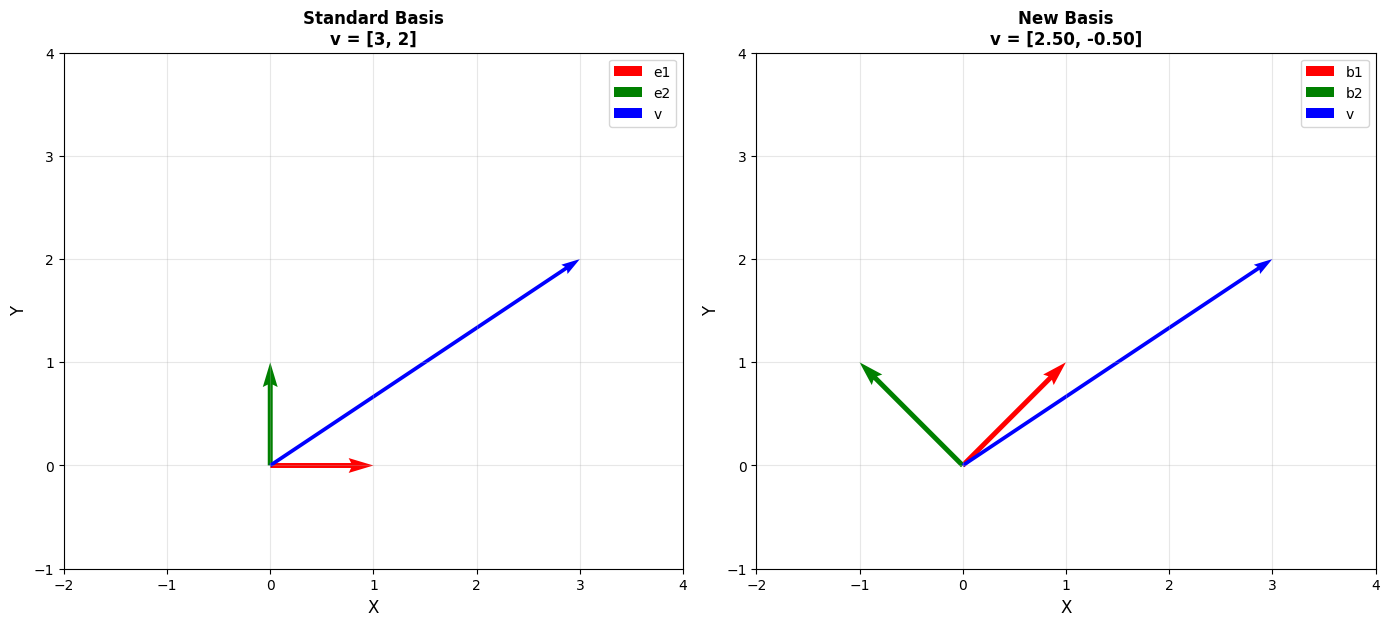


Applications: Coordinate transformations, PCA, diagonalization


In [19]:
# Change of basis: represent vector in different coordinate systems
# Standard basis: e1 = [1,0], e2 = [0,1]
# New basis: b1 = [1,1], b2 = [-1,1]

# Vector in standard basis
v_standard = np.array([3, 2])

# New basis vectors (as columns)
B = np.array([
    [1, -1],
    [1, 1]
])

# Change of basis matrix: columns are new basis vectors in standard coordinates
# To convert FROM standard TO new basis: v_new = B^(-1) @ v_standard
# To convert FROM new TO standard: v_standard = B @ v_new

B_inv = np.linalg.inv(B)
v_new_basis = B_inv @ v_standard

print("Change of Basis:")
print("=" * 60)
print(f"Vector in standard basis: {v_standard}")
print(f"\nNew basis vectors:")
print(f"  b1 = {B[:, 0]}")
print(f"  b2 = {B[:, 1]}")
print(f"\nChange of basis matrix B:\n{B}")
print(f"\nVector in new basis: {v_new_basis}")
print(f"  v = {v_new_basis[0]:.2f} × b1 + {v_new_basis[1]:.2f} × b2")

# Verify: reconstruct in standard basis
v_reconstructed = B @ v_new_basis
print(f"\nVerification: B @ v_new = {v_reconstructed} (should equal {v_standard})")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

origin = np.array([0, 0])

# Standard basis
axes[0].quiver(origin[0], origin[1], 1, 0, angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='e1', linewidth=2)
axes[0].quiver(origin[0], origin[1], 0, 1, angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='e2', linewidth=2)
axes[0].quiver(origin[0], origin[1], v_standard[0], v_standard[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.006, label='v', linewidth=2, linestyle='--')
axes[0].set_xlim(-2, 4)
axes[0].set_ylim(-1, 4)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('Standard Basis\nv = [3, 2]', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')

# New basis
axes[1].quiver(origin[0], origin[1], B[0, 0], B[1, 0], angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='b1', linewidth=2)
axes[1].quiver(origin[0], origin[1], B[0, 1], B[1, 1], angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='b2', linewidth=2)
axes[1].quiver(origin[0], origin[1], v_standard[0], v_standard[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.006, label='v', linewidth=2, linestyle='--')
axes[1].set_xlim(-2, 4)
axes[1].set_ylim(-1, 4)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].set_title(f'New Basis\nv = [{v_new_basis[0]:.2f}, {v_new_basis[1]:.2f}]', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nApplications: Coordinate transformations, PCA, diagonalization")


### Application 3.4: Basis in Graphics - Rotation Matrices

Rotation matrices form an orthonormal basis, fundamental to computer graphics.


Rotation Matrix as Orthonormal Basis:
Rotation matrix (45°):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Columns (basis vectors):
  b1 = [0.70710678 0.70710678]
  b2 = [-0.70710678  0.70710678]

Orthonormality check:
  b1 · b2 = 0.000000 (should be 0)
  ||b1|| = 1.000000 (should be 1)
  ||b2|| = 1.000000 (should be 1)
  R^T @ R = I:
[[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]

Rotation example:
  Original vector: [2 0]
  Rotated vector: [1.41421356 1.41421356]


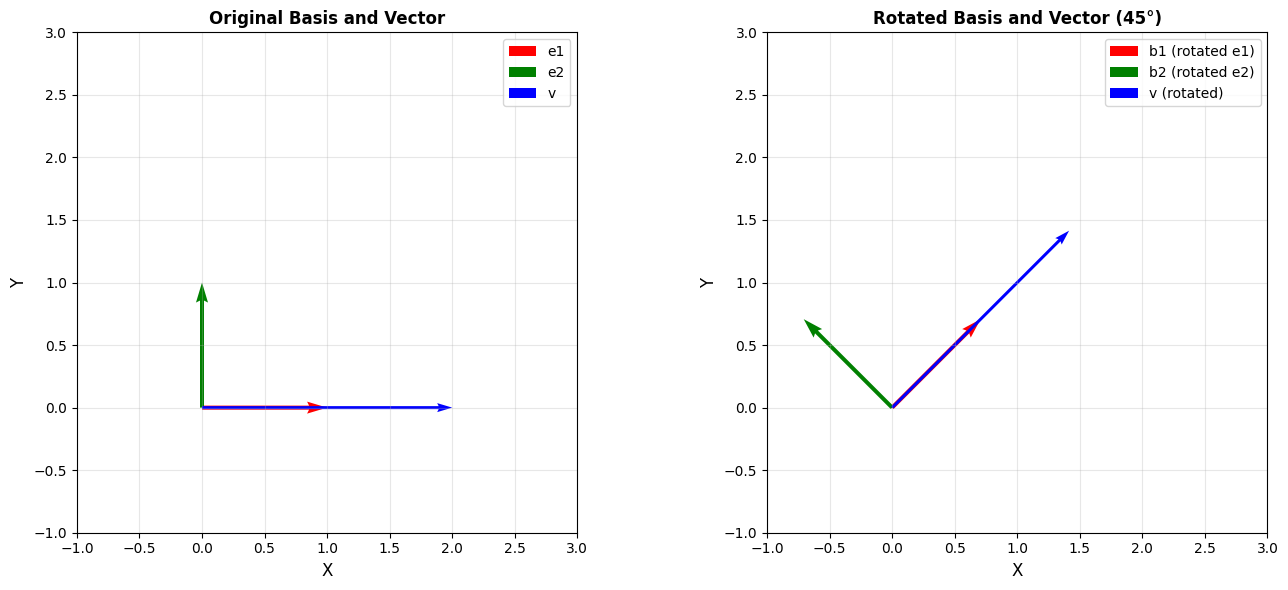


Applications: 3D graphics, robotics, computer vision, game engines


In [20]:
# Rotation matrix as orthonormal basis
def rotation_matrix_2d(angle_degrees):
    """Create 2D rotation matrix."""
    angle_rad = np.radians(angle_degrees)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    return np.array([
        [cos_a, -sin_a],
        [sin_a, cos_a]
    ])

# Rotate by 45 degrees
R = rotation_matrix_2d(45)

print("Rotation Matrix as Orthonormal Basis:")
print("=" * 50)
print(f"Rotation matrix (45°):\n{R}")
print(f"\nColumns (basis vectors):")
print(f"  b1 = {R[:, 0]}")
print(f"  b2 = {R[:, 1]}")

# Verify orthonormality
print(f"\nOrthonormality check:")
print(f"  b1 · b2 = {np.dot(R[:, 0], R[:, 1]):.6f} (should be 0)")
print(f"  ||b1|| = {np.linalg.norm(R[:, 0]):.6f} (should be 1)")
print(f"  ||b2|| = {np.linalg.norm(R[:, 1]):.6f} (should be 1)")
print(f"  R^T @ R = I:\n{R.T @ R}")

# Rotate a vector
v = np.array([2, 0])
v_rotated = R @ v

print(f"\nRotation example:")
print(f"  Original vector: {v}")
print(f"  Rotated vector: {v_rotated}")

# Visualize rotation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

origin = np.array([0, 0])

# Original
axes[0].quiver(origin[0], origin[1], 1, 0, angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='e1', linewidth=2)
axes[0].quiver(origin[0], origin[1], 0, 1, angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='e2', linewidth=2)
axes[0].quiver(origin[0], origin[1], v[0], v[1], angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.006, label='v', linewidth=2, linestyle='--')
axes[0].set_xlim(-1, 3)
axes[0].set_ylim(-1, 3)
axes[0].set_xlabel('X', fontsize=12)
axes[0].set_ylabel('Y', fontsize=12)
axes[0].set_title('Original Basis and Vector', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')

# Rotated
axes[1].quiver(origin[0], origin[1], R[0, 0], R[1, 0], angles='xy', scale_units='xy', scale=1,
              color='red', width=0.008, label='b1 (rotated e1)', linewidth=2)
axes[1].quiver(origin[0], origin[1], R[0, 1], R[1, 1], angles='xy', scale_units='xy', scale=1,
              color='green', width=0.008, label='b2 (rotated e2)', linewidth=2)
axes[1].quiver(origin[0], origin[1], v_rotated[0], v_rotated[1],
              angles='xy', scale_units='xy', scale=1,
              color='blue', width=0.006, label='v (rotated)', linewidth=2, linestyle='--')
axes[1].set_xlim(-1, 3)
axes[1].set_ylim(-1, 3)
axes[1].set_xlabel('X', fontsize=12)
axes[1].set_ylabel('Y', fontsize=12)
axes[1].set_title('Rotated Basis and Vector (45°)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

print("\nApplications: 3D graphics, robotics, computer vision, game engines")


### Application 3.5: Basis in Data - Feature Spaces and PCA

Principal components form an orthonormal basis in the feature space, optimal for representing data variance.


PCA Basis Vectors (Principal Components):
Data shape: (150, 4)

Principal components (columns are basis vectors):
  PC1 = [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
  PC2 = [-0.65658877 -0.73016143  0.17337266  0.07548102]
  PC3 = [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]
  PC4 = [ 0.31548719 -0.3197231  -0.47983899  0.75365743]

Orthonormality check:
  PC1 · PC2 = -0.000000
  PC1 · PC3 = -0.000000
  PC1 · PC4 = -0.000000
  PC2 · PC3 = 0.000000
  PC2 · PC4 = 0.000000
  PC3 · PC4 = 0.000000

Data in PC basis (first 5 samples):
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]]


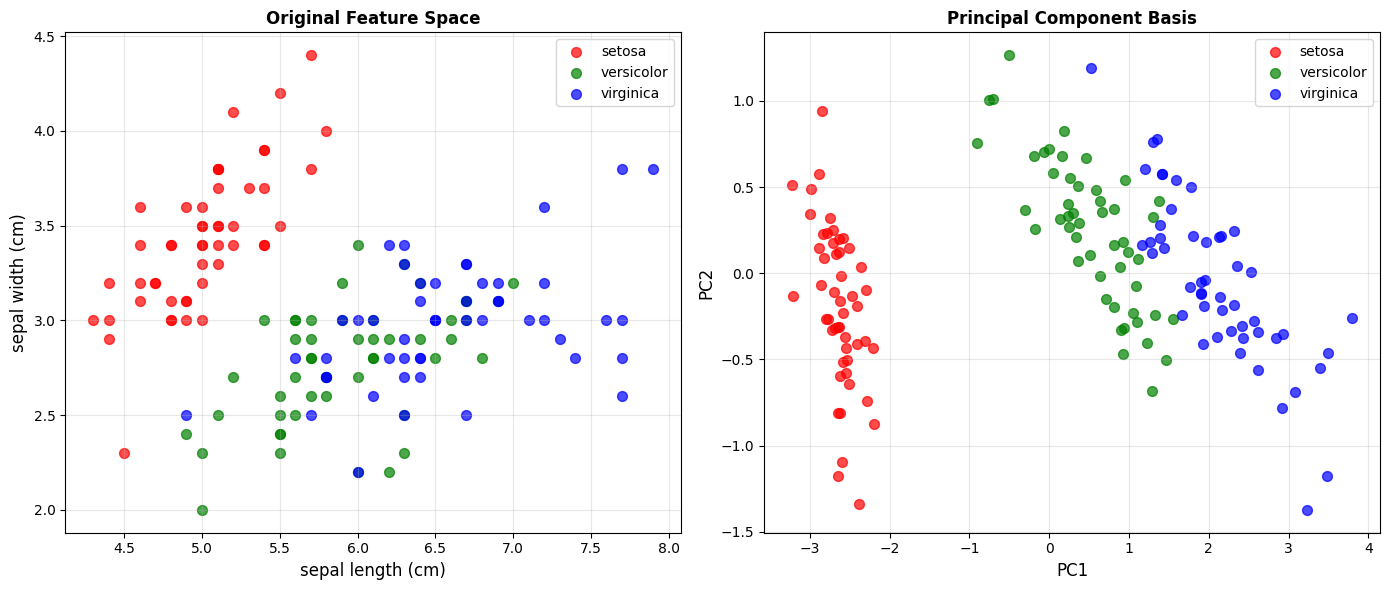


Key Insight: PC basis maximizes variance, optimal for dimensionality reduction!


In [21]:
# PCA basis vectors (principal components)
iris = load_iris()
X = iris.data
X_centered = X - np.mean(X, axis=0)

# Perform PCA using SVD
U, s, Vh = np.linalg.svd(X_centered, full_matrices=False)
principal_components = Vh.T

print("PCA Basis Vectors (Principal Components):")
print("=" * 60)
print(f"Data shape: {X.shape}")
print(f"\nPrincipal components (columns are basis vectors):")
for i in range(principal_components.shape[1]):
    print(f"  PC{i+1} = {principal_components[:, i]}")

# Verify orthonormality
print(f"\nOrthonormality check:")
for i in range(principal_components.shape[1]):
    for j in range(i+1, principal_components.shape[1]):
        dot = np.dot(principal_components[:, i], principal_components[:, j])
        print(f"  PC{i+1} · PC{j+1} = {dot:.6f}")

# Project data onto PC basis
X_pc = X_centered @ principal_components

print(f"\nData in PC basis (first 5 samples):")
print(X_pc[:5, :2])  # First 2 PCs

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original feature space (first 2 features)
colors_map = ['red', 'green', 'blue']
for i in range(3):
    mask = iris.target == i
    axes[0].scatter(X[mask, 0], X[mask, 1], c=colors_map[i], 
                   label=iris.target_names[i], alpha=0.7, s=50)

axes[0].set_xlabel(iris.feature_names[0], fontsize=12)
axes[0].set_ylabel(iris.feature_names[1], fontsize=12)
axes[0].set_title('Original Feature Space', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# PC space
for i in range(3):
    mask = iris.target == i
    axes[1].scatter(X_pc[mask, 0], X_pc[mask, 1], c=colors_map[i],
                   label=iris.target_names[i], alpha=0.7, s=50)

axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title('Principal Component Basis', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: PC basis maximizes variance, optimal for dimensionality reduction!")


### Application 3.6: Orthonormal Basis - Fourier Transform

Fourier basis functions form an orthonormal basis, fundamental to signal processing.


DFT Basis Orthonormality:
  <basis[0], basis[0]> = 1.000000+0.000000j (should be 1)
  <basis[1], basis[1]> = 1.000000+0.000000j (should be 1)
  <basis[2], basis[2]> = 1.000000+0.000000j (should be 1)
  <basis[3], basis[3]> = 1.000000+0.000000j (should be 1)
  <basis[4], basis[4]> = 1.000000+0.000000j (should be 1)
  <basis[5], basis[5]> = 1.000000+0.000000j (should be 1)
  <basis[6], basis[6]> = 1.000000+0.000000j (should be 1)
  <basis[7], basis[7]> = 1.000000+0.000000j (should be 1)

Signal in time domain: [1 2 3 4 3 2 1 0]

Signal in frequency domain (first 4 components):
  Frequency 0: 5.6569+0.0000j
  Frequency 1: -1.7071-1.7071j
  Frequency 2: 0.0000+0.0000j
  Frequency 3: 0.2929-0.2929j

Reconstructed signal: [1.00000000e+00 7.77156117e-16 1.00000000e+00 2.00000000e+00
 3.00000000e+00 4.00000000e+00 3.00000000e+00 2.00000000e+00]
Difference: 2.00e+00


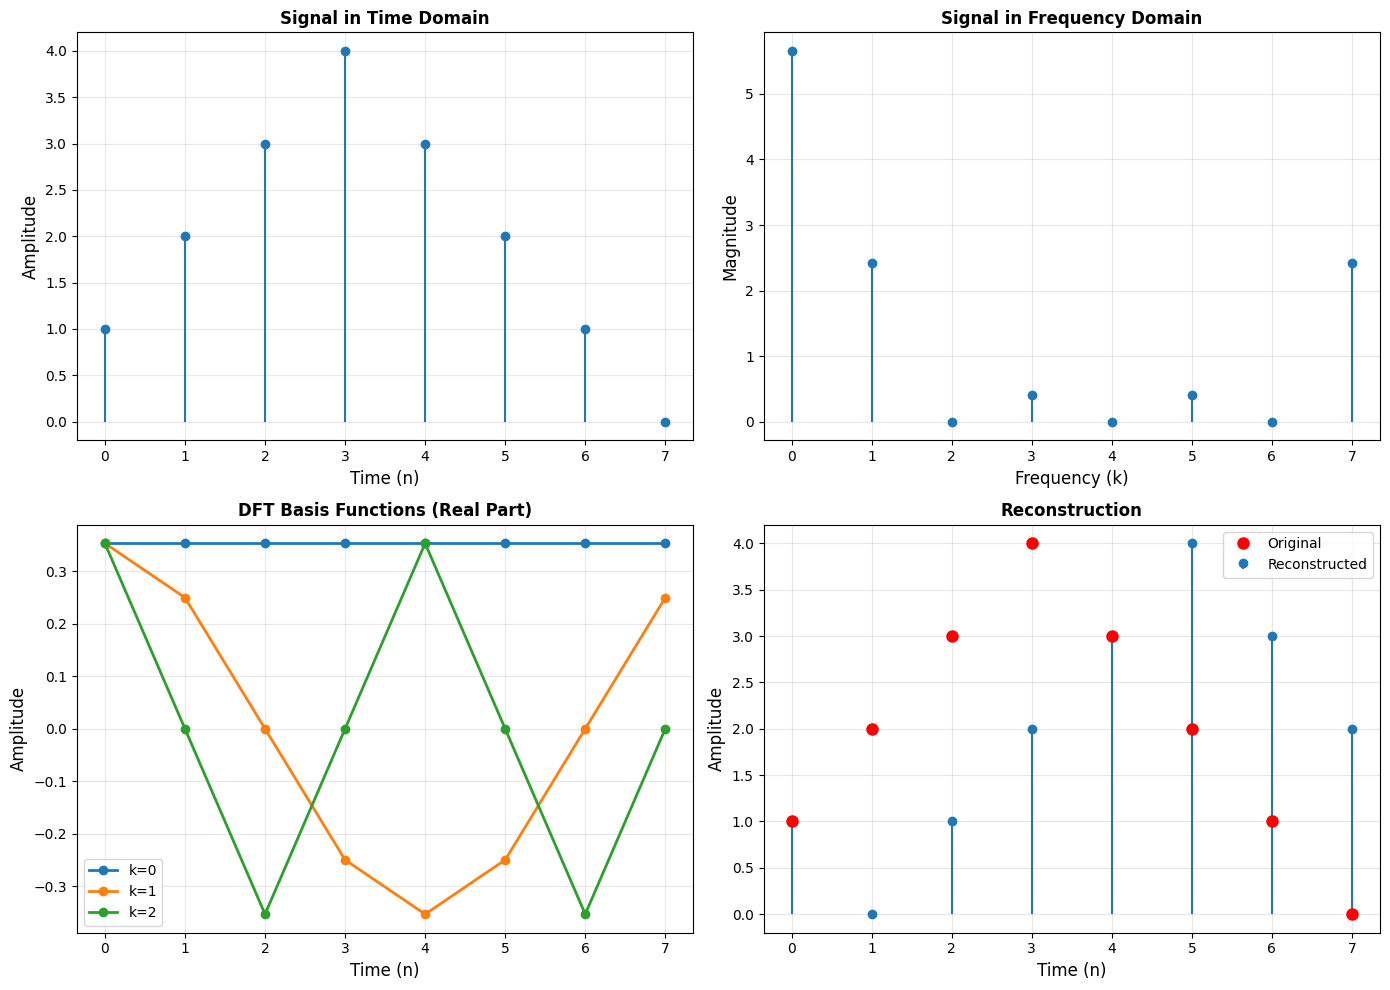


Applications: Signal processing, image compression (JPEG), audio analysis


In [22]:
# Discrete Fourier Transform basis
# For N samples, DFT basis consists of complex exponentials

N = 8
t = np.arange(N)

# Create DFT basis matrix (discrete version)
# Each column is a basis vector: e^(2πikn/N) for k = 0, 1, ..., N-1
dft_basis = np.zeros((N, N), dtype=complex)

for k in range(N):
    for n in range(N):
        dft_basis[n, k] = np.exp(-2j * np.pi * k * n / N) / np.sqrt(N)

# Verify orthonormality (for complex vectors: <u, v> = u* @ v)
print("DFT Basis Orthonormality:")
print("=" * 50)
for i in range(N):
    for j in range(N):
        dot_product = np.conj(dft_basis[:, i]) @ dft_basis[:, j]
        if i == j:
            print(f"  <basis[{i}], basis[{i}]> = {dot_product:.6f} (should be 1)")
        elif abs(dot_product) > 1e-10:
            print(f"  <basis[{i}], basis[{j}]> = {dot_product:.6f} (should be 0)")

# Simple signal
signal = np.array([1, 2, 3, 4, 3, 2, 1, 0])

# Transform to frequency domain (change of basis)
signal_freq = dft_basis.T @ signal

print(f"\nSignal in time domain: {signal}")
print(f"\nSignal in frequency domain (first 4 components):")
for i in range(4):
    print(f"  Frequency {i}: {signal_freq[i]:.4f}")

# Reconstruct (inverse transform)
signal_reconstructed = dft_basis @ signal_freq

print(f"\nReconstructed signal: {signal_reconstructed.real}")
print(f"Difference: {np.max(np.abs(signal - signal_reconstructed.real)):.2e}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time domain
axes[0, 0].stem(t, signal, basefmt=' ')
axes[0, 0].set_xlabel('Time (n)', fontsize=12)
axes[0, 0].set_ylabel('Amplitude', fontsize=12)
axes[0, 0].set_title('Signal in Time Domain', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Frequency domain (magnitude)
axes[0, 1].stem(t, np.abs(signal_freq), basefmt=' ')
axes[0, 1].set_xlabel('Frequency (k)', fontsize=12)
axes[0, 1].set_ylabel('Magnitude', fontsize=12)
axes[0, 1].set_title('Signal in Frequency Domain', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Basis functions (real part)
for k in [0, 1, 2]:
    basis_real = dft_basis[:, k].real
    axes[1, 0].plot(t, basis_real, 'o-', label=f'k={k}', linewidth=2, markersize=6)

axes[1, 0].set_xlabel('Time (n)', fontsize=12)
axes[1, 0].set_ylabel('Amplitude', fontsize=12)
axes[1, 0].set_title('DFT Basis Functions (Real Part)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Reconstructed
axes[1, 1].stem(t, signal_reconstructed.real, basefmt=' ', label='Reconstructed')
axes[1, 1].plot(t, signal, 'ro', label='Original', markersize=8)
axes[1, 1].set_xlabel('Time (n)', fontsize=12)
axes[1, 1].set_ylabel('Amplitude', fontsize=12)
axes[1, 1].set_title('Reconstruction', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nApplications: Signal processing, image compression (JPEG), audio analysis")


---

## Topic 4: Norms

Norms measure the "size" or "length" of vectors and matrices. Different norms have different properties and applications in optimization, regularization, and distance metrics.


### Application 4.1: L1 Norm (Manhattan) - Sparse Solutions and Lasso Regression

L1 norm promotes sparsity, making it ideal for feature selection and regularization.


L1 Regularization (Lasso) - Sparse Solutions:
True non-zero coefficients: 5
Lasso non-zero coefficients: 5

True coefficients (first 10): [ 2.   0.   0.  -1.5  0.   0.   0.   1.   0.   0. ]
Lasso coefficients (first 10): [ 1.89000333 -0.         -0.         -1.42822063 -0.          0.
  0.          0.92938317 -0.         -0.        ]


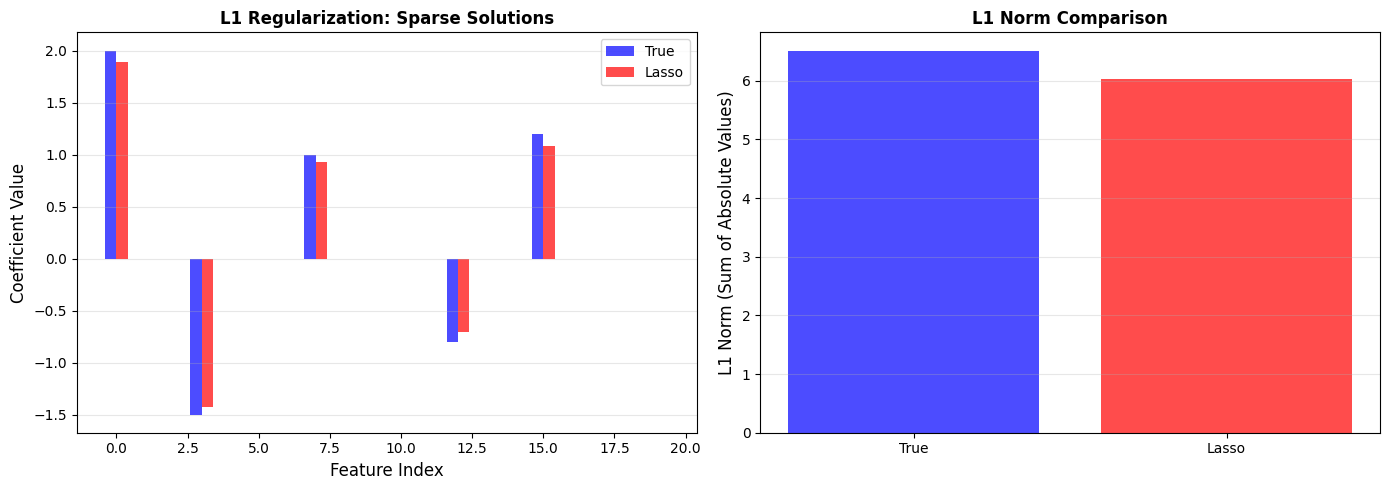


L1 norm of true coefficients: 6.5000
L1 norm of Lasso coefficients: 6.0368

Key Insight: L1 norm encourages sparsity by penalizing small coefficients!


In [23]:
# L1 regularization (Lasso) promotes sparse solutions
# Generate synthetic data
np.random.seed(42)
n_samples, n_features = 50, 20
X = np.random.randn(n_samples, n_features)

# True coefficients (sparse: only 5 non-zero)
true_coef = np.zeros(n_features)
true_coef[[0, 3, 7, 12, 15]] = [2, -1.5, 1, -0.8, 1.2]

# Generate target with noise
y = X @ true_coef + 0.1 * np.random.randn(n_samples)

# Fit Lasso (L1 regularization)
lasso = Lasso(alpha=0.1, max_iter=1000)
lasso.fit(X, y)

# Compare coefficients
print("L1 Regularization (Lasso) - Sparse Solutions:")
print("=" * 60)
print(f"True non-zero coefficients: {np.sum(true_coef != 0)}")
print(f"Lasso non-zero coefficients: {np.sum(np.abs(lasso.coef_) > 1e-3)}")
print(f"\nTrue coefficients (first 10): {true_coef[:10]}")
print(f"Lasso coefficients (first 10): {lasso.coef_[:10]}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Coefficients comparison
x_pos = np.arange(n_features)
axes[0].bar(x_pos - 0.2, true_coef, width=0.4, label='True', alpha=0.7, color='blue')
axes[0].bar(x_pos + 0.2, lasso.coef_, width=0.4, label='Lasso', alpha=0.7, color='red')
axes[0].set_xlabel('Feature Index', fontsize=12)
axes[0].set_ylabel('Coefficient Value', fontsize=12)
axes[0].set_title('L1 Regularization: Sparse Solutions', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# L1 norm of coefficients
l1_norm_true = np.sum(np.abs(true_coef))
l1_norm_lasso = np.sum(np.abs(lasso.coef_))
axes[1].bar(['True', 'Lasso'], [l1_norm_true, l1_norm_lasso], 
           color=['blue', 'red'], alpha=0.7)
axes[1].set_ylabel('L1 Norm (Sum of Absolute Values)', fontsize=12)
axes[1].set_title('L1 Norm Comparison', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nL1 norm of true coefficients: {l1_norm_true:.4f}")
print(f"L1 norm of Lasso coefficients: {l1_norm_lasso:.4f}")
print("\nKey Insight: L1 norm encourages sparsity by penalizing small coefficients!")


### Application 4.2: L2 Norm (Euclidean) - Distance Metrics and Ridge Regression

L2 norm is the standard Euclidean distance, fundamental to many machine learning algorithms.


L2 Regularization (Ridge) vs L1 (Lasso):
Lasso non-zero coefficients: 5
Ridge non-zero coefficients: 19

L1 norm (Lasso): 6.0368
L2 norm (Ridge): 3.0027


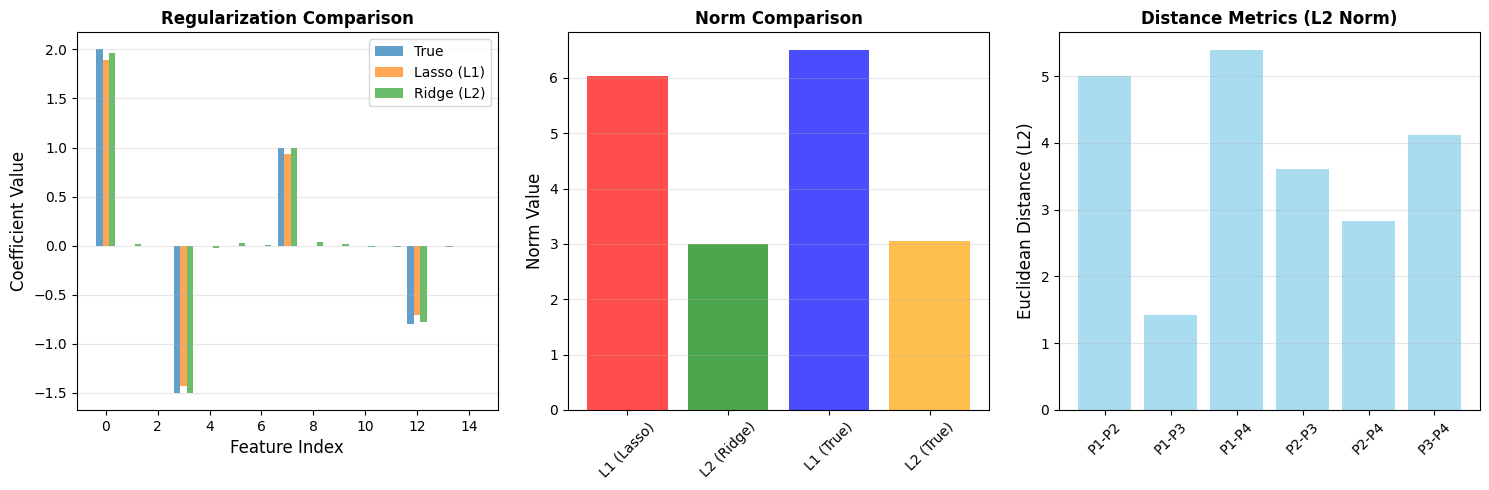


Key Insight: L2 norm is smooth and differentiable, ideal for gradient-based optimization!


In [24]:
# L2 regularization (Ridge) shrinks coefficients
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Compare L1 vs L2 regularization
print("L2 Regularization (Ridge) vs L1 (Lasso):")
print("=" * 60)
print(f"Lasso non-zero coefficients: {np.sum(np.abs(lasso.coef_) > 1e-3)}")
print(f"Ridge non-zero coefficients: {np.sum(np.abs(ridge.coef_) > 1e-3)}")
print(f"\nL1 norm (Lasso): {np.sum(np.abs(lasso.coef_)):.4f}")
print(f"L2 norm (Ridge): {np.linalg.norm(ridge.coef_):.4f}")

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

x_pos = np.arange(min(15, n_features))

# Coefficients
axes[0].bar(x_pos - 0.25, true_coef[:len(x_pos)], width=0.25, label='True', alpha=0.7)
axes[0].bar(x_pos, lasso.coef_[:len(x_pos)], width=0.25, label='Lasso (L1)', alpha=0.7)
axes[0].bar(x_pos + 0.25, ridge.coef_[:len(x_pos)], width=0.25, label='Ridge (L2)', alpha=0.7)
axes[0].set_xlabel('Feature Index', fontsize=12)
axes[0].set_ylabel('Coefficient Value', fontsize=12)
axes[0].set_title('Regularization Comparison', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Norms comparison
norms_data = {
    'L1 (Lasso)': np.sum(np.abs(lasso.coef_)),
    'L2 (Ridge)': np.linalg.norm(ridge.coef_),
    'L1 (True)': np.sum(np.abs(true_coef)),
    'L2 (True)': np.linalg.norm(true_coef)
}
axes[1].bar(norms_data.keys(), norms_data.values(), color=['red', 'green', 'blue', 'orange'], alpha=0.7)
axes[1].set_ylabel('Norm Value', fontsize=12)
axes[1].set_title('Norm Comparison', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Distance metrics using L2 norm
points = np.array([[0, 0], [3, 4], [1, 1], [5, 2]])
distances = []
labels = []
for i in range(len(points)):
    for j in range(i+1, len(points)):
        dist = np.linalg.norm(points[i] - points[j])
        distances.append(dist)
        labels.append(f'P{i+1}-P{j+1}')

axes[2].bar(labels, distances, color='skyblue', alpha=0.7)
axes[2].set_ylabel('Euclidean Distance (L2)', fontsize=12)
axes[2].set_title('Distance Metrics (L2 Norm)', fontsize=12, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Insight: L2 norm is smooth and differentiable, ideal for gradient-based optimization!")


### Application 4.3: L∞ Norm (Max) - Error Bounds and Chebyshev Approximation

L∞ norm measures the maximum absolute value, useful for worst-case analysis.


L∞ Norm (Maximum Norm):
Vector 1: [ 1 -3  2 -1]
  L∞ norm: 3.0000
  Max absolute value: 3.0000

Vector 2: [ 5  0 -2  3]
  L∞ norm: 5.0000
  Max absolute value: 5.0000

Vector 3: [-1  1 -1  1]
  L∞ norm: 1.0000
  Max absolute value: 1.0000

Error Bounds Using Different Norms:
True values: [1. 2. 3. 4. 5.]
Approximations: [1.1 1.9 3.2 3.8 5.1]
Errors: [0.1 0.1 0.2 0.2 0.1]

L∞ error (worst case): 0.2000
L2 error: 0.3317
L1 error: 0.7000


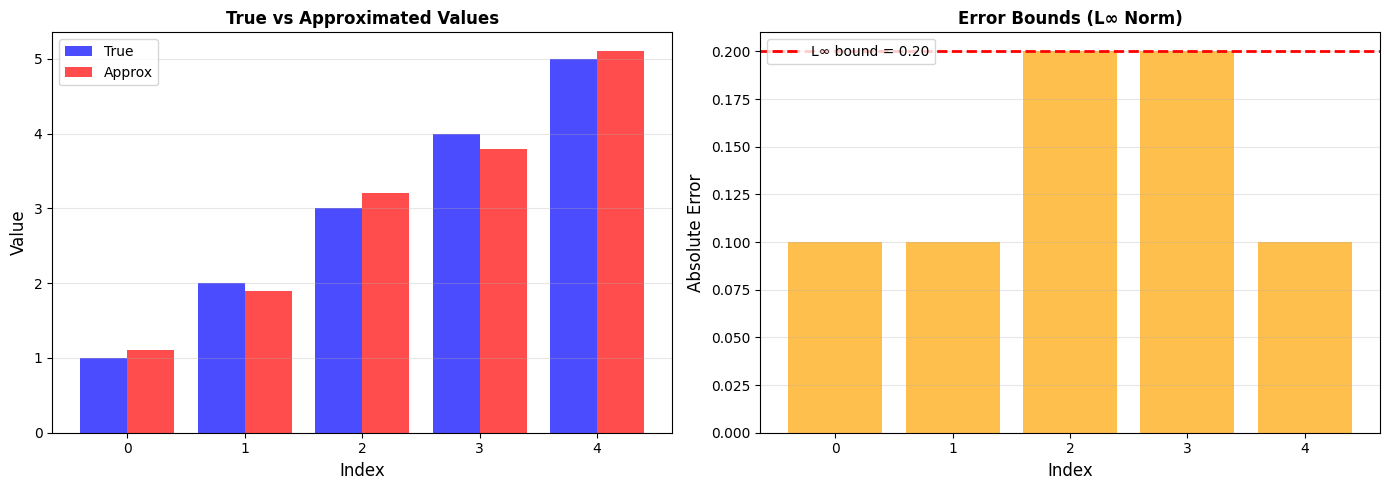


Applications: Worst-case analysis, Chebyshev approximation, robust optimization


In [25]:
# L∞ norm: maximum absolute value
# Useful for error bounds and worst-case analysis

vectors = [
    np.array([1, -3, 2, -1]),
    np.array([5, 0, -2, 3]),
    np.array([-1, 1, -1, 1])
]

print("L∞ Norm (Maximum Norm):")
print("=" * 50)
for i, v in enumerate(vectors):
    linf_norm = np.linalg.norm(v, ord=np.inf)
    max_abs = np.max(np.abs(v))
    print(f"Vector {i+1}: {v}")
    print(f"  L∞ norm: {linf_norm:.4f}")
    print(f"  Max absolute value: {max_abs:.4f}")
    print()

# Error bounds example
true_values = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
approximations = np.array([1.1, 1.9, 3.2, 3.8, 5.1])
errors = np.abs(true_values - approximations)

linf_error = np.linalg.norm(errors, ord=np.inf)
l2_error = np.linalg.norm(errors, ord=2)
l1_error = np.linalg.norm(errors, ord=1)

print("Error Bounds Using Different Norms:")
print("=" * 50)
print(f"True values: {true_values}")
print(f"Approximations: {approximations}")
print(f"Errors: {errors}")
print(f"\nL∞ error (worst case): {linf_error:.4f}")
print(f"L2 error: {l2_error:.4f}")
print(f"L1 error: {l1_error:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Error comparison
x_pos = np.arange(len(true_values))
axes[0].bar(x_pos - 0.2, true_values, width=0.4, label='True', alpha=0.7, color='blue')
axes[0].bar(x_pos + 0.2, approximations, width=0.4, label='Approx', alpha=0.7, color='red')
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('Value', fontsize=12)
axes[0].set_title('True vs Approximated Values', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Error bars showing L∞ bound
axes[1].bar(x_pos, errors, alpha=0.7, color='orange')
axes[1].axhline(y=linf_error, color='red', linestyle='--', linewidth=2, label=f'L∞ bound = {linf_error:.2f}')
axes[1].set_xlabel('Index', fontsize=12)
axes[1].set_ylabel('Absolute Error', fontsize=12)
axes[1].set_title('Error Bounds (L∞ Norm)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nApplications: Worst-case analysis, Chebyshev approximation, robust optimization")


### Application 4.4: Frobenius Norm - Matrix Approximation Error

Frobenius norm measures the "size" of a matrix, useful for matrix approximation and neural network regularization.


Frobenius Norm - Matrix Approximation:
Original matrix A:
[[ 0.74930242 -0.71728795  1.65698847 -1.54041867]
 [-1.38558509  1.44431158 -2.60984179  0.37856887]
 [-0.107326   -0.73595192 -0.19993985 -0.84752349]
 [ 1.54225595  1.80449709 -0.68573759  0.27552488]
 [-1.32507647  1.07305216  1.04700917 -0.29526223]]

Frobenius norm of A: 5.3608
Approximation error (Frobenius): 0.5392
Relative error: 0.1006 (10.06%)

Low-rank approximation (rank 2):
  Frobenius error: 2.4000
  Relative error: 0.4477 (44.77%)


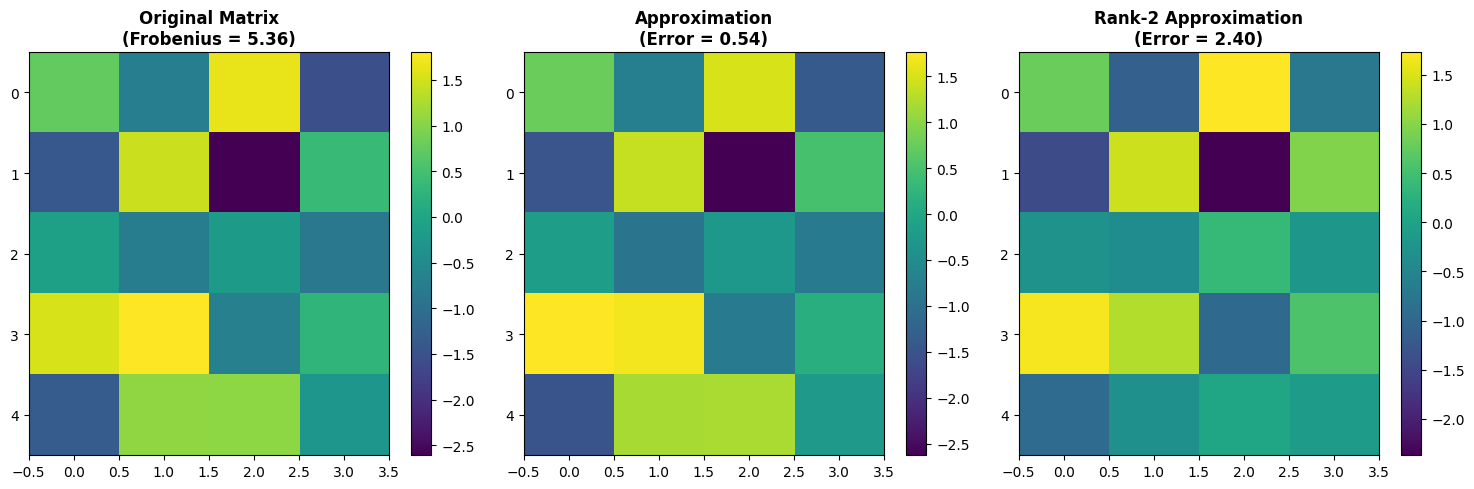


Applications: Matrix approximation, neural network weight regularization,
SVD truncation error measurement


In [26]:
# Frobenius norm: sqrt(sum of squares of all elements)
# Useful for matrix approximation error

A = np.random.randn(5, 4)
A_approx = A + 0.1 * np.random.randn(5, 4)  # Approximation with noise

frobenius_A = np.linalg.norm(A, 'fro')
frobenius_error = np.linalg.norm(A - A_approx, 'fro')
relative_error = frobenius_error / frobenius_A

print("Frobenius Norm - Matrix Approximation:")
print("=" * 50)
print(f"Original matrix A:\n{A}")
print(f"\nFrobenius norm of A: {frobenius_A:.4f}")
print(f"Approximation error (Frobenius): {frobenius_error:.4f}")
print(f"Relative error: {relative_error:.4f} ({relative_error*100:.2f}%)")

# Low-rank approximation using SVD
U, s, Vh = np.linalg.svd(A, full_matrices=False)
rank_2_approx = U[:, :2] @ np.diag(s[:2]) @ Vh[:2, :]
rank_2_error = np.linalg.norm(A - rank_2_approx, 'fro')

print(f"\nLow-rank approximation (rank 2):")
print(f"  Frobenius error: {rank_2_error:.4f}")
print(f"  Relative error: {rank_2_error/frobenius_A:.4f} ({rank_2_error/frobenius_A*100:.2f}%)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im1 = axes[0].imshow(A, cmap='viridis', aspect='auto')
axes[0].set_title(f'Original Matrix\n(Frobenius = {frobenius_A:.2f})', fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(A_approx, cmap='viridis', aspect='auto')
axes[1].set_title(f'Approximation\n(Error = {frobenius_error:.2f})', fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[1])

im3 = axes[2].imshow(rank_2_approx, cmap='viridis', aspect='auto')
axes[2].set_title(f'Rank-2 Approximation\n(Error = {rank_2_error:.2f})', fontsize=12, fontweight='bold')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("\nApplications: Matrix approximation, neural network weight regularization,")
print("SVD truncation error measurement")


### Application 4.5: Nuclear Norm - Low-Rank Matrix Completion

Nuclear norm (sum of singular values) is used for low-rank matrix completion problems.


Nuclear Norm - Low-Rank Matrix:
Matrix shape: (10, 8)
True rank: 3
Singular values: [1.01611968e+01 7.10737623e+00 3.18478120e+00 8.99753173e-16
 7.70803404e-16 5.46492204e-16 1.60597567e-16 5.91613714e-17]

Nuclear norm (sum of σ): 20.4534
Frobenius norm: 12.8026
Relationship: ||A||_F ≤ ||A||_* ≤ √rank × ||A||_F


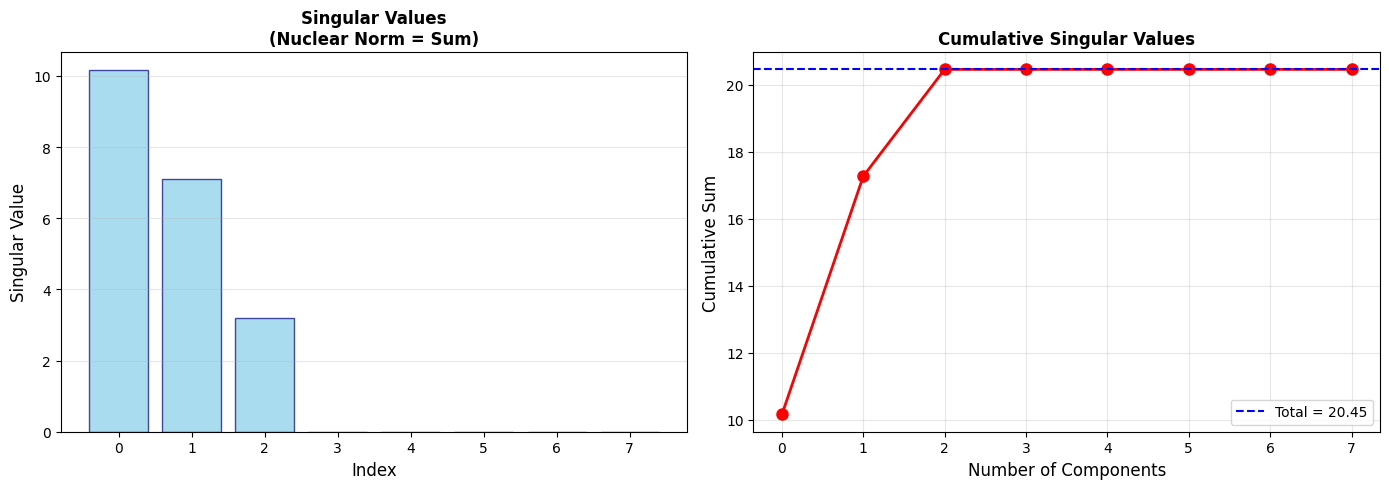


Applications: Matrix completion (Netflix problem), robust PCA,
low-rank approximation with nuclear norm regularization


In [27]:
# Nuclear norm: sum of singular values
# Used for low-rank matrix completion

# Create a low-rank matrix
rank_true = 3
U = np.random.randn(10, rank_true)
V = np.random.randn(rank_true, 8)
A_low_rank = U @ V

# Compute SVD
U_svd, s, Vh_svd = np.linalg.svd(A_low_rank, full_matrices=False)

# Nuclear norm = sum of singular values
nuclear_norm = np.sum(s)

# Compare with Frobenius norm
frobenius_norm = np.linalg.norm(A_low_rank, 'fro')

print("Nuclear Norm - Low-Rank Matrix:")
print("=" * 50)
print(f"Matrix shape: {A_low_rank.shape}")
print(f"True rank: {rank_true}")
print(f"Singular values: {s}")
print(f"\nNuclear norm (sum of σ): {nuclear_norm:.4f}")
print(f"Frobenius norm: {frobenius_norm:.4f}")
print(f"Relationship: ||A||_F ≤ ||A||_* ≤ √rank × ||A||_F")

# Visualize singular values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(len(s)), s, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Index', fontsize=12)
axes[0].set_ylabel('Singular Value', fontsize=12)
axes[0].set_title('Singular Values\n(Nuclear Norm = Sum)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(y=0, color='black', linewidth=0.5)

# Cumulative sum
cumulative = np.cumsum(s)
axes[1].plot(range(len(s)), cumulative, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=nuclear_norm, color='blue', linestyle='--', label=f'Total = {nuclear_norm:.2f}')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Sum', fontsize=12)
axes[1].set_title('Cumulative Singular Values', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nApplications: Matrix completion (Netflix problem), robust PCA,")
print("low-rank approximation with nuclear norm regularization")


### Application 4.6: Norm Comparison - Regularization in Machine Learning

Comparing different norms helps understand their effects on optimization and regularization.


Norm Comparison: L1 vs L2 Regularization:
Regularization strengths: [0.01, 0.1, 1.0, 10.0]


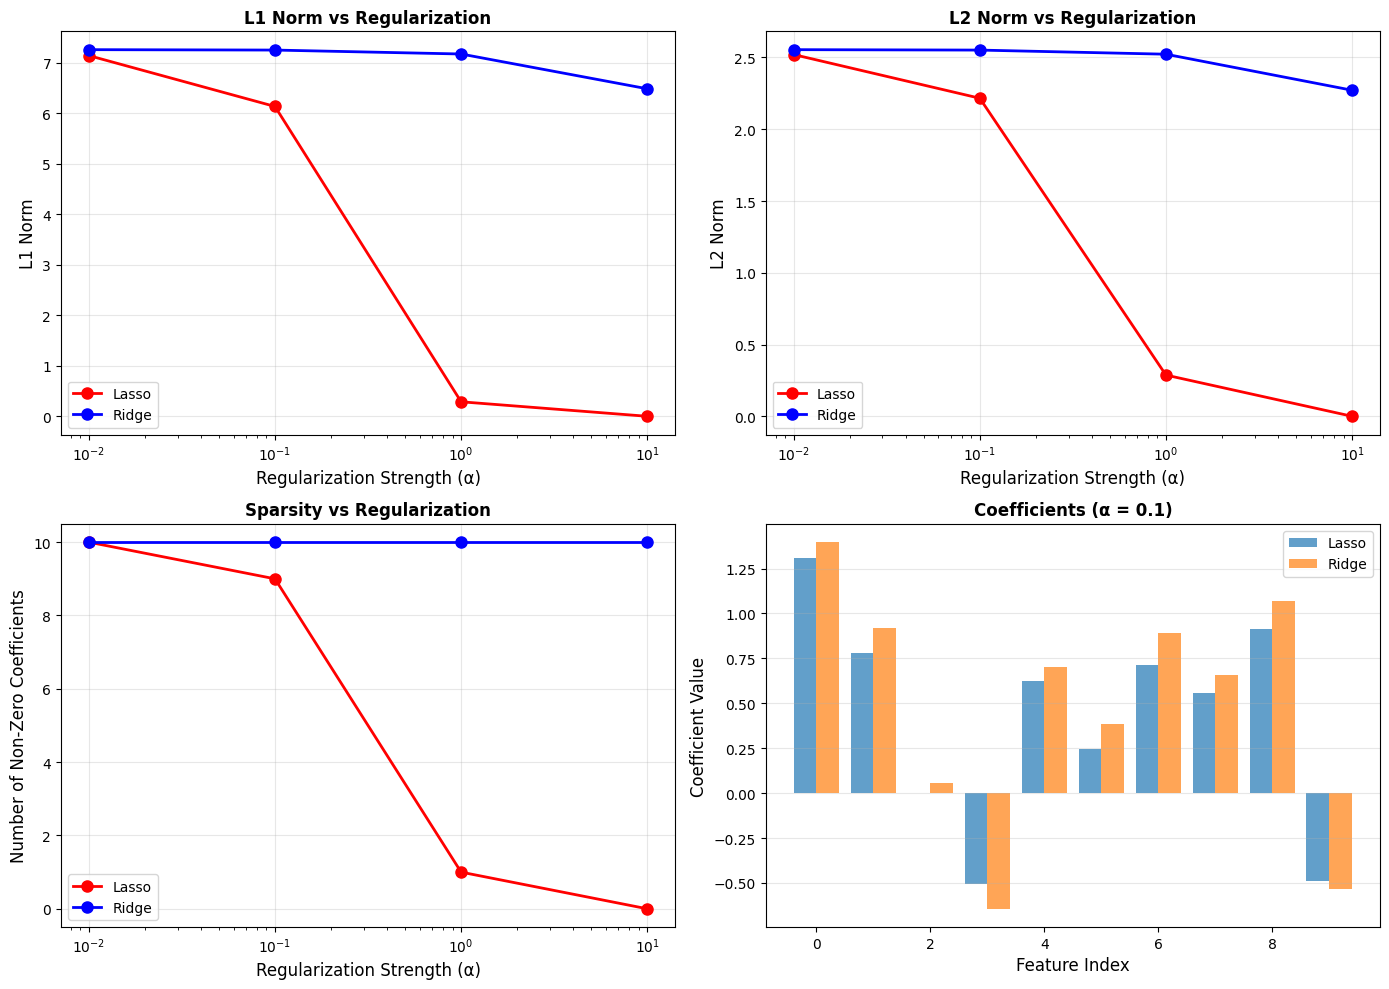


Key Insights:
- L1 (Lasso) promotes sparsity: many coefficients become exactly zero
- L2 (Ridge) shrinks coefficients: all coefficients become smaller
- Choice depends on problem: feature selection (L1) vs. smooth solutions (L2)


In [28]:
# Compare regularization effects of different norms
# Generate data
np.random.seed(42)
X_reg = np.random.randn(100, 10)
y_reg = X_reg @ np.random.randn(10) + 0.1 * np.random.randn(100)

# Fit with different regularization strengths
alphas = [0.01, 0.1, 1.0, 10.0]
lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000)
    ridge = Ridge(alpha=alpha)
    lasso.fit(X_reg, y_reg)
    ridge.fit(X_reg, y_reg)
    lasso_coefs.append(lasso.coef_.copy())
    ridge_coefs.append(ridge.coef_.copy())

# Compute norms
l1_norms_lasso = [np.sum(np.abs(coef)) for coef in lasso_coefs]
l2_norms_lasso = [np.linalg.norm(coef) for coef in lasso_coefs]
l1_norms_ridge = [np.sum(np.abs(coef)) for coef in ridge_coefs]
l2_norms_ridge = [np.linalg.norm(coef) for coef in ridge_coefs]

print("Norm Comparison: L1 vs L2 Regularization:")
print("=" * 60)
print(f"Regularization strengths: {alphas}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# L1 norms
axes[0, 0].plot(alphas, l1_norms_lasso, 'ro-', linewidth=2, markersize=8, label='Lasso')
axes[0, 0].plot(alphas, l1_norms_ridge, 'bo-', linewidth=2, markersize=8, label='Ridge')
axes[0, 0].set_xlabel('Regularization Strength (α)', fontsize=12)
axes[0, 0].set_ylabel('L1 Norm', fontsize=12)
axes[0, 0].set_title('L1 Norm vs Regularization', fontsize=12, fontweight='bold')
axes[0, 0].set_xscale('log')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# L2 norms
axes[0, 1].plot(alphas, l2_norms_lasso, 'ro-', linewidth=2, markersize=8, label='Lasso')
axes[0, 1].plot(alphas, l2_norms_ridge, 'bo-', linewidth=2, markersize=8, label='Ridge')
axes[0, 1].set_xlabel('Regularization Strength (α)', fontsize=12)
axes[0, 1].set_ylabel('L2 Norm', fontsize=12)
axes[0, 1].set_title('L2 Norm vs Regularization', fontsize=12, fontweight='bold')
axes[0, 1].set_xscale('log')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Sparsity (number of non-zero coefficients)
sparsity_lasso = [np.sum(np.abs(coef) > 1e-3) for coef in lasso_coefs]
sparsity_ridge = [np.sum(np.abs(coef) > 1e-3) for coef in ridge_coefs]

axes[1, 0].plot(alphas, sparsity_lasso, 'ro-', linewidth=2, markersize=8, label='Lasso')
axes[1, 0].plot(alphas, sparsity_ridge, 'bo-', linewidth=2, markersize=8, label='Ridge')
axes[1, 0].set_xlabel('Regularization Strength (α)', fontsize=12)
axes[1, 0].set_ylabel('Number of Non-Zero Coefficients', fontsize=12)
axes[1, 0].set_title('Sparsity vs Regularization', fontsize=12, fontweight='bold')
axes[1, 0].set_xscale('log')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Coefficient values at different alpha
alpha_idx = 1  # alpha = 0.1
x_pos = np.arange(len(lasso_coefs[alpha_idx]))
axes[1, 1].bar(x_pos - 0.2, lasso_coefs[alpha_idx], width=0.4, label='Lasso', alpha=0.7)
axes[1, 1].bar(x_pos + 0.2, ridge_coefs[alpha_idx], width=0.4, label='Ridge', alpha=0.7)
axes[1, 1].set_xlabel('Feature Index', fontsize=12)
axes[1, 1].set_ylabel('Coefficient Value', fontsize=12)
axes[1, 1].set_title(f'Coefficients (α = {alphas[alpha_idx]})', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("- L1 (Lasso) promotes sparsity: many coefficients become exactly zero")
print("- L2 (Ridge) shrinks coefficients: all coefficients become smaller")
print("- Choice depends on problem: feature selection (L1) vs. smooth solutions (L2)")


---

## Topic 5: Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues reveal the fundamental directions and scaling factors of linear transformations. They're central to many algorithms in data science, graph theory, and dynamical systems.


### Application 5.1: PCA Revisited - Eigendecomposition

PCA can be computed using eigendecomposition of the covariance matrix, revealing principal directions.


PCA using Eigendecomposition:
Covariance matrix shape: (4, 4)

Eigenvalues (variances): [4.22824171+0.j 0.24267075+0.j 0.0782095 +0.j 0.02383509+0.j]

Eigenvectors (principal components):
  PC1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
  PC2: [-0.65658877 -0.73016143  0.17337266  0.07548102]
  PC3: [-0.58202985  0.59791083  0.07623608  0.54583143]
  PC4: [ 0.31548719 -0.3197231  -0.47983899  0.75365743]

Variance explained:
  PC1: 0.9246+0.0000j (92.46+0.00j%)
  PC2: 0.0531+0.0000j (5.31+0.00j%)
  PC3: 0.0171+0.0000j (1.71+0.00j%)
  PC4: 0.0052+0.0000j (0.52+0.00j%)


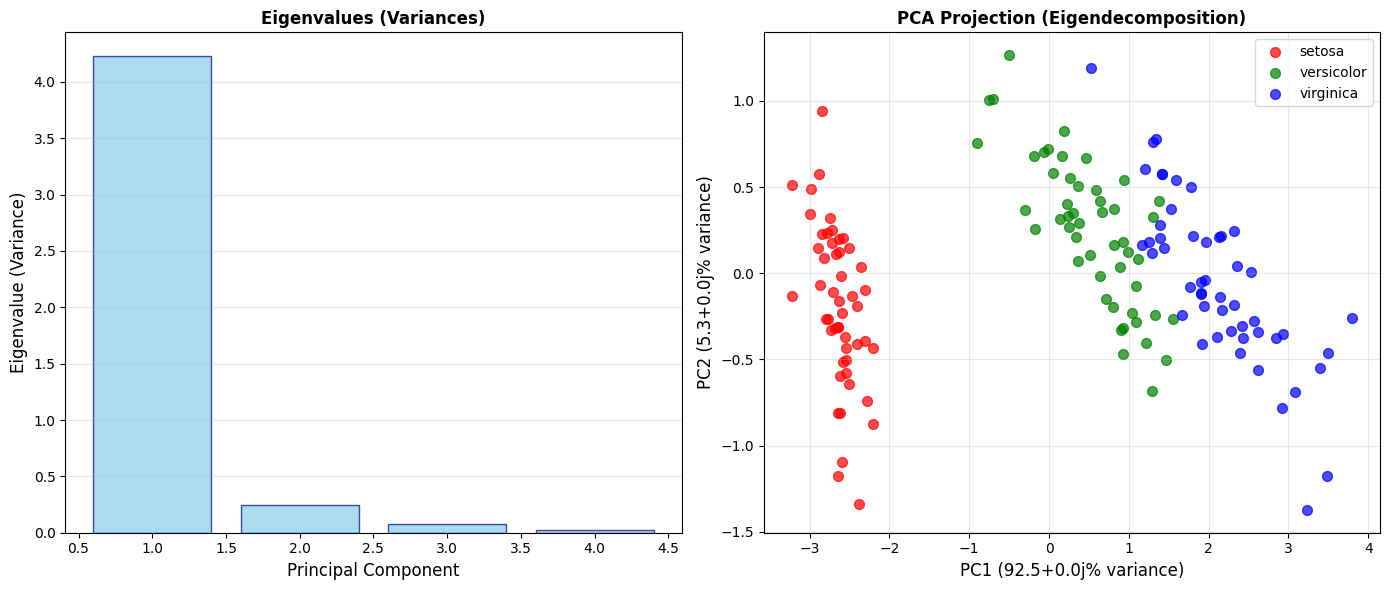


Key Insight: Eigenvectors of covariance matrix = principal components!
Eigenvalues = variances along principal directions.


In [29]:
# PCA using eigendecomposition (alternative to SVD)
iris = load_iris()
X = iris.data
X_centered = X - np.mean(X, axis=0)

# Covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigendecomposition: C = Q @ Λ @ Q^T
eigenvalues, eigenvectors = eig(cov_matrix)

# Sort by eigenvalue (descending)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("PCA using Eigendecomposition:")
print("=" * 60)
print(f"Covariance matrix shape: {cov_matrix.shape}")
print(f"\nEigenvalues (variances): {eigenvalues}")
print(f"\nEigenvectors (principal components):")
for i in range(len(eigenvalues)):
    print(f"  PC{i+1}: {eigenvectors[:, i]}")

# Variance explained
variance_explained = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(variance_explained)

print(f"\nVariance explained:")
for i in range(len(eigenvalues)):
    print(f"  PC{i+1}: {variance_explained[i]:.4f} ({variance_explained[i]*100:.2f}%)")

# Project data
X_pc_eigen = X_centered @ eigenvectors

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Eigenvalues
axes[0].bar(range(1, len(eigenvalues)+1), eigenvalues, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Eigenvalue (Variance)', fontsize=12)
axes[0].set_title('Eigenvalues (Variances)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# 2D projection
colors_map = ['red', 'green', 'blue']
for i in range(3):
    mask = iris.target == i
    axes[1].scatter(X_pc_eigen[mask, 0], X_pc_eigen[mask, 1], 
                   c=colors_map[i], label=iris.target_names[i], alpha=0.7, s=50)

axes[1].set_xlabel(f'PC1 ({variance_explained[0]*100:.1f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({variance_explained[1]*100:.1f}% variance)', fontsize=12)
axes[1].set_title('PCA Projection (Eigendecomposition)', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insight: Eigenvectors of covariance matrix = principal components!")
print("Eigenvalues = variances along principal directions.")


### Application 5.2: PageRank Algorithm - Web Page Ranking

PageRank uses the dominant eigenvector of the web graph's transition matrix to rank pages.


PageRank Algorithm:
Number of pages: 4

Adjacency matrix:
[[0 1 1 0]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 1 0]]

Transition matrix:
[[0.  0.5 0.5 0. ]
 [1.  0.  0.  0.5]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 0. ]]

PageRank matrix (damping=0.85):
[[0.0375 0.4625 0.4625 0.0375]
 [0.8875 0.0375 0.0375 0.4625]
 [0.0375 0.4625 0.0375 0.4625]
 [0.0375 0.0375 0.4625 0.0375]]

Dominant eigenvalue: 1.000000+0.000000j

PageRank scores:
  Page 0: 0.2829
  Page 1: 0.3373
  Page 2: 0.2402
  Page 3: 0.1396


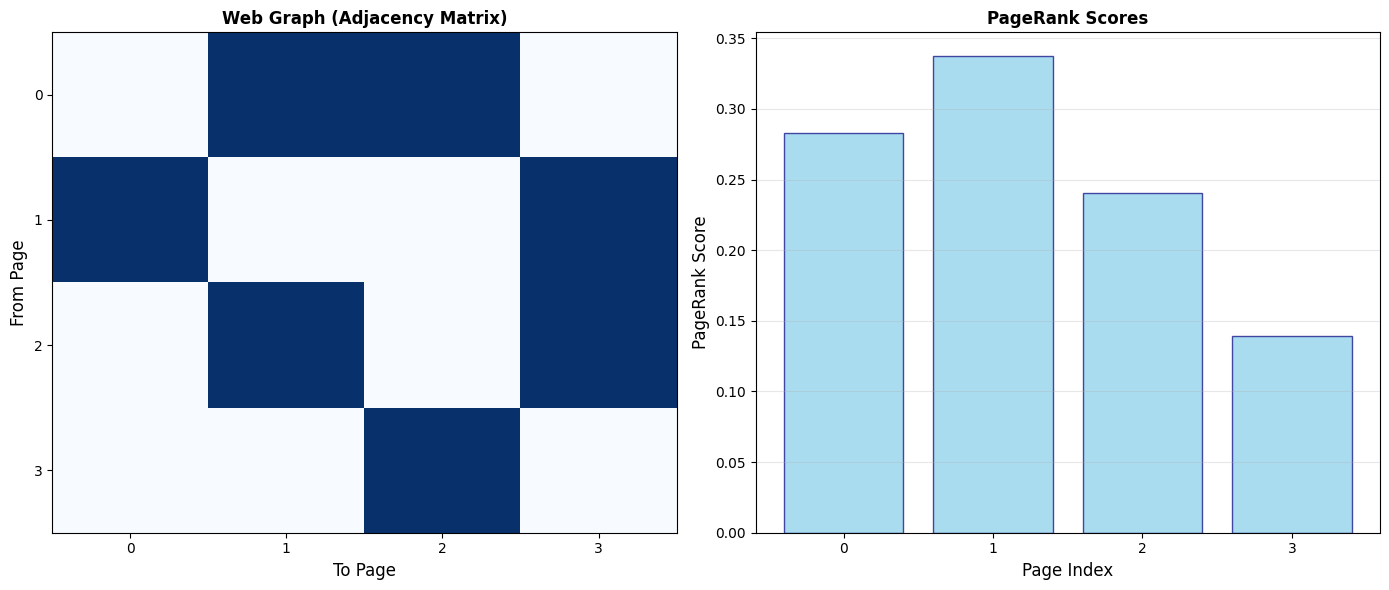


Key Insight: PageRank = dominant eigenvector of transition matrix!
Higher score = more important page in the web graph.


In [30]:
# Simplified PageRank algorithm
# Web graph: pages and links between them

# Adjacency matrix (directed graph)
# Rows = source pages, Columns = destination pages
adjacency = np.array([
    [0, 1, 1, 0],  # Page 0 links to pages 1 and 2
    [1, 0, 0, 1],  # Page 1 links to pages 0 and 3
    [0, 1, 0, 1],  # Page 2 links to pages 1 and 3
    [0, 0, 1, 0]   # Page 3 links to page 2
])

# Transition matrix (column-stochastic)
# Each column sums to 1, represents probability of moving to that page
transition = adjacency.astype(float)
for j in range(transition.shape[1]):
    col_sum = np.sum(transition[:, j])
    if col_sum > 0:
        transition[:, j] /= col_sum
    else:
        # Dangling node: equal probability to all pages
        transition[:, j] = 1.0 / transition.shape[0]

# Add damping factor (teleportation)
damping = 0.85
n_pages = transition.shape[0]
transition_pagerank = damping * transition + (1 - damping) / n_pages * np.ones((n_pages, n_pages))

print("PageRank Algorithm:")
print("=" * 60)
print(f"Number of pages: {n_pages}")
print(f"\nAdjacency matrix:\n{adjacency}")
print(f"\nTransition matrix:\n{transition}")
print(f"\nPageRank matrix (damping={damping}):\n{transition_pagerank}")

# Find dominant eigenvector (eigenvector corresponding to eigenvalue 1)
eigenvalues_pr, eigenvectors_pr = eig(transition_pagerank)

# Find eigenvalue closest to 1
idx_dominant = np.argmin(np.abs(eigenvalues_pr - 1.0))
pagerank_vector = np.real(eigenvectors_pr[:, idx_dominant])

# Normalize to sum to 1 (probability distribution)
pagerank_vector = np.abs(pagerank_vector)
pagerank_vector /= np.sum(pagerank_vector)

print(f"\nDominant eigenvalue: {eigenvalues_pr[idx_dominant]:.6f}")
print(f"\nPageRank scores:")
for i, score in enumerate(pagerank_vector):
    print(f"  Page {i}: {score:.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph visualization (simplified)
axes[0].imshow(adjacency, cmap='Blues', aspect='auto')
axes[0].set_xlabel('To Page', fontsize=12)
axes[0].set_ylabel('From Page', fontsize=12)
axes[0].set_title('Web Graph (Adjacency Matrix)', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(n_pages))
axes[0].set_yticks(range(n_pages))

# PageRank scores
axes[1].bar(range(n_pages), pagerank_vector, color='skyblue', edgecolor='navy', alpha=0.7)
axes[1].set_xlabel('Page Index', fontsize=12)
axes[1].set_ylabel('PageRank Score', fontsize=12)
axes[1].set_title('PageRank Scores', fontsize=12, fontweight='bold')
axes[1].set_xticks(range(n_pages))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Insight: PageRank = dominant eigenvector of transition matrix!")
print("Higher score = more important page in the web graph.")


### Application 5.3: Vibration Analysis - Natural Frequencies

Eigenvalues represent natural frequencies in vibration analysis of mechanical systems.


Vibration Analysis - Natural Frequencies:
Mass matrix M:
[[1.  0.  0. ]
 [0.  2.  0. ]
 [0.  0.  1.5]]

Stiffness matrix K:
[[ 3 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]

Eigenvalues: [3.24187105+0.j 0.43433548+0.j 1.65712681+0.j]

Natural frequencies (ω): [0.65904133 1.28729438 1.80051966]
Natural frequencies (Hz, assuming ω = 2πf): [0.10488969 0.20487926 0.2865616 ]

Mode shapes (eigenvectors):
  Mode 1 (ω = 0.6590):
    [-0.29877298 -0.76655123 -0.56844869]
  Mode 2 (ω = 1.2873):
    [-0.30937598 -0.41545271  0.8553862 ]
  Mode 3 (ω = 1.8005):
    [-0.96871227  0.23430345 -0.08184397]


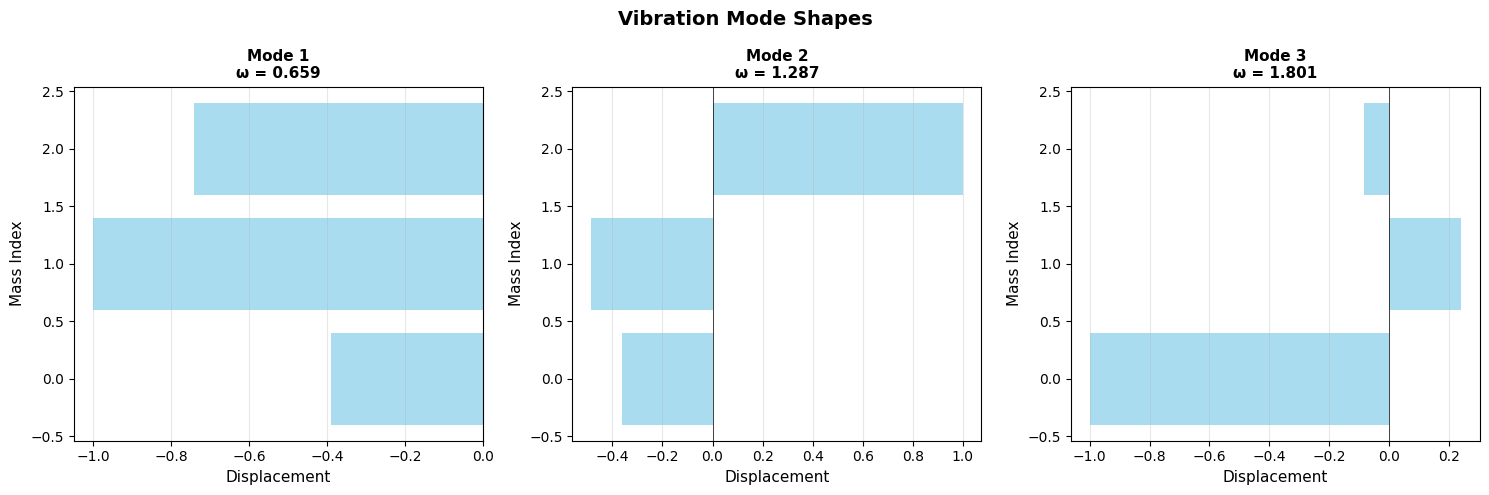


Applications: Structural engineering, mechanical design, earthquake analysis


In [31]:
# Vibration analysis: mass-spring system
# Equation: M * d²x/dt² + K * x = 0
# Natural frequencies: ω = sqrt(λ) where λ are eigenvalues of M^(-1) * K

# Mass matrix (diagonal)
M = np.diag([1.0, 2.0, 1.5])  # Masses of 3 objects

# Stiffness matrix (spring connections)
K = np.array([
    [3, -1, 0],   # Spring connections
    [-1, 2, -1],
    [0, -1, 2]
])

# Solve generalized eigenvalue problem: K * v = λ * M * v
# Equivalent to: M^(-1) * K * v = λ * v
M_inv = np.linalg.inv(M)
A_vib = M_inv @ K

eigenvalues_vib, eigenvectors_vib = eig(A_vib)

# Natural frequencies (angular frequencies)
natural_frequencies = np.sqrt(np.real(eigenvalues_vib))

# Sort by frequency
idx_sort = natural_frequencies.argsort()
natural_frequencies = natural_frequencies[idx_sort]
eigenvectors_vib = eigenvectors_vib[:, idx_sort]

print("Vibration Analysis - Natural Frequencies:")
print("=" * 60)
print(f"Mass matrix M:\n{M}")
print(f"\nStiffness matrix K:\n{K}")
print(f"\nEigenvalues: {eigenvalues_vib}")
print(f"\nNatural frequencies (ω): {natural_frequencies}")
print(f"Natural frequencies (Hz, assuming ω = 2πf): {natural_frequencies / (2 * np.pi)}")

print(f"\nMode shapes (eigenvectors):")
for i in range(len(natural_frequencies)):
    print(f"  Mode {i+1} (ω = {natural_frequencies[i]:.4f}):")
    print(f"    {eigenvectors_vib[:, i]}")

# Visualize mode shapes
fig, axes = plt.subplots(1, len(natural_frequencies), figsize=(15, 5))

for i in range(len(natural_frequencies)):
    mode_shape = np.real(eigenvectors_vib[:, i])
    # Normalize for visualization
    mode_shape = mode_shape / np.max(np.abs(mode_shape))
    
    # Simple visualization: bars representing displacement
    axes[i].barh(range(len(mode_shape)), mode_shape, alpha=0.7, color='skyblue')
    axes[i].set_xlabel('Displacement', fontsize=11)
    axes[i].set_ylabel('Mass Index', fontsize=11)
    axes[i].set_title(f'Mode {i+1}\nω = {natural_frequencies[i]:.3f}', fontsize=11, fontweight='bold')
    axes[i].axvline(x=0, color='black', linewidth=0.5)
    axes[i].grid(True, alpha=0.3, axis='x')

plt.suptitle('Vibration Mode Shapes', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Structural engineering, mechanical design, earthquake analysis")


### Application 5.4: Eigenfaces - Face Recognition

Eigenfaces use PCA (eigendecomposition) to represent faces in a lower-dimensional space.


Eigenfaces - Face Recognition:
Number of faces: 20
Face size: (8, 8)

Top 4 eigenvalues: [0.07108743 0.06515474 0.05423966 0.05265008]

Reconstruction using 4 eigenfaces:
  Original face shape: (64,)
  Coefficients: [ 0.40198584  0.43114407 -0.32364863 -0.20019963]
  Reconstruction error: 2.2193


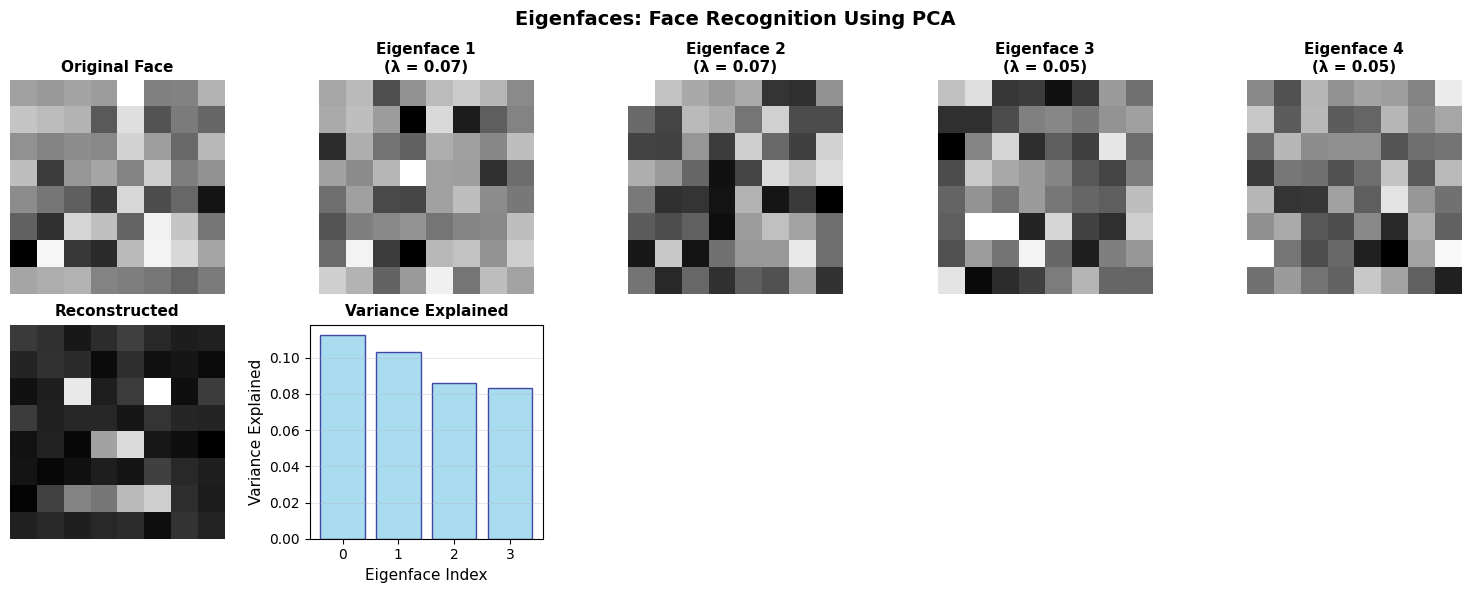


Applications: Face recognition, image compression, feature extraction


In [32]:
# Eigenfaces: simplified version using synthetic face-like data
# In practice, use real face images

# Create synthetic "faces" (simple patterns)
n_faces = 20
face_size = (8, 8)  # Small for visualization

faces = []
for i in range(n_faces):
    # Create a simple face-like pattern
    face = np.zeros(face_size)
    # Eyes
    face[2, 2] = face[2, 5] = 1.0
    # Nose
    face[4, 3:5] = 0.8
    # Mouth
    face[6, 2:6] = 0.6
    # Add some variation
    face += 0.1 * np.random.randn(*face_size)
    faces.append(face.flatten())

faces_matrix = np.array(faces)  # Each row is a face
faces_centered = faces_matrix - np.mean(faces_matrix, axis=0)

# Covariance matrix
cov_faces = np.cov(faces_centered.T)

# Eigendecomposition
eigenvalues_faces, eigenvectors_faces = eig(cov_faces)

# Sort by eigenvalue
idx_faces = eigenvalues_faces.argsort()[::-1]
eigenvalues_faces = np.real(eigenvalues_faces[idx_faces])
eigenvectors_faces = np.real(eigenvectors_faces[:, idx_faces])

# Eigenfaces (first few principal components)
n_eigenfaces = 4
eigenfaces = eigenvectors_faces[:, :n_eigenfaces]

print("Eigenfaces - Face Recognition:")
print("=" * 60)
print(f"Number of faces: {n_faces}")
print(f"Face size: {face_size}")
print(f"\nTop {n_eigenfaces} eigenvalues: {eigenvalues_faces[:n_eigenfaces]}")

# Reconstruct a face using eigenfaces
face_to_reconstruct = faces_centered[0]
face_coefficients = face_to_reconstruct @ eigenfaces
face_reconstructed = eigenfaces @ face_coefficients + np.mean(faces_matrix, axis=0)

print(f"\nReconstruction using {n_eigenfaces} eigenfaces:")
print(f"  Original face shape: {face_to_reconstruct.shape}")
print(f"  Coefficients: {face_coefficients}")
print(f"  Reconstruction error: {np.linalg.norm(face_to_reconstruct - face_reconstructed):.4f}")

# Visualize
fig, axes = plt.subplots(2, n_eigenfaces + 1, figsize=(15, 6))

# Original face
axes[0, 0].imshow(face_to_reconstruct.reshape(face_size), cmap='gray')
axes[0, 0].set_title('Original Face', fontsize=11, fontweight='bold')
axes[0, 0].axis('off')

# Eigenfaces
for i in range(n_eigenfaces):
    eigenface = eigenfaces[:, i].reshape(face_size)
    axes[0, i+1].imshow(eigenface, cmap='gray')
    axes[0, i+1].set_title(f'Eigenface {i+1}\n(λ = {eigenvalues_faces[i]:.2f})', fontsize=11, fontweight='bold')
    axes[0, i+1].axis('off')

# Reconstructed face
axes[1, 0].imshow(face_reconstructed.reshape(face_size), cmap='gray')
axes[1, 0].set_title('Reconstructed', fontsize=11, fontweight='bold')
axes[1, 0].axis('off')

# Variance explained
variance_explained_faces = eigenvalues_faces / np.sum(eigenvalues_faces)
axes[1, 1].bar(range(n_eigenfaces), variance_explained_faces[:n_eigenfaces], 
              color='skyblue', edgecolor='navy', alpha=0.7)
axes[1, 1].set_xlabel('Eigenface Index', fontsize=11)
axes[1, 1].set_ylabel('Variance Explained', fontsize=11)
axes[1, 1].set_title('Variance Explained', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Hide unused subplots
for i in range(2, n_eigenfaces + 1):
    axes[1, i].axis('off')

plt.suptitle('Eigenfaces: Face Recognition Using PCA', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Face recognition, image compression, feature extraction")


### Application 5.5: Spectral Clustering - Graph-Based Clustering

Spectral clustering uses eigenvectors of the graph Laplacian to find clusters.


Spectral Clustering:
Number of data points: 100
Number of clusters: 2

Smallest eigenvalues: [0.         0.34474045 0.97096425 0.97184623 0.98282157]

Fiedler vector (second eigenvector): [ 0.10348886 -0.10307764  0.10604812 -0.0929503  -0.09421995  0.1065953
 -0.09935146 -0.08715014  0.09081013  0.10509936]


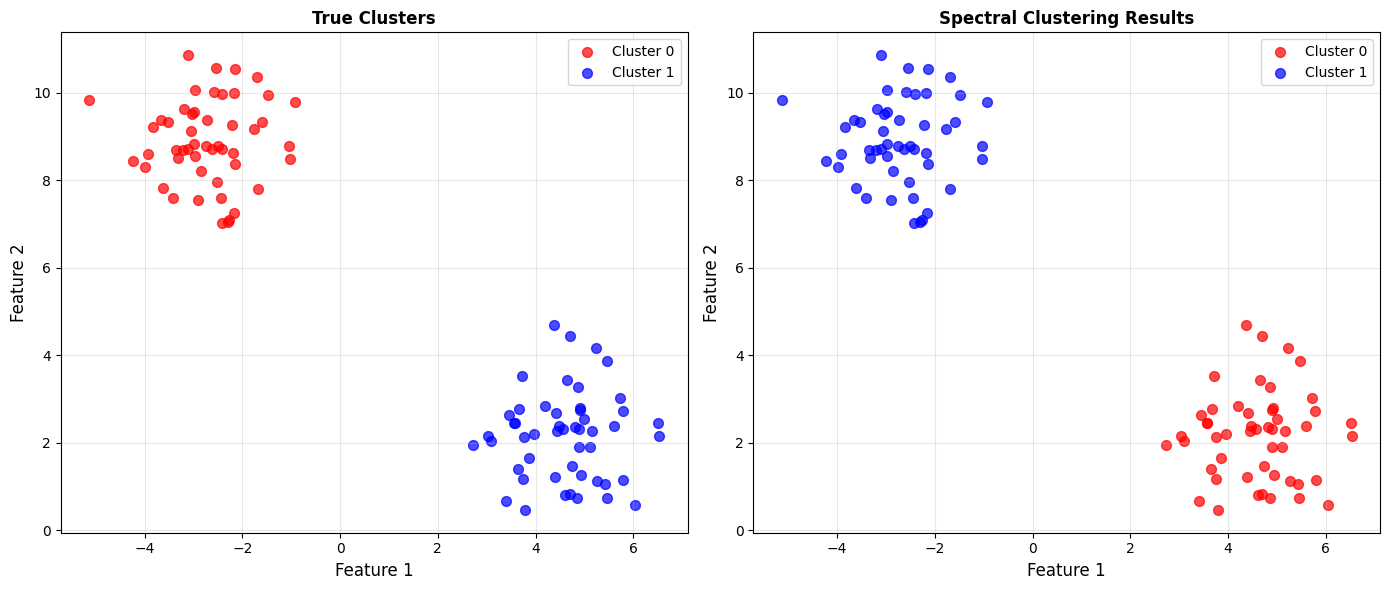


Clustering accuracy: 0.00%

Key Insight: Second smallest eigenvalue's eigenvector (Fiedler vector)
provides optimal graph cut for clustering!


In [33]:
# Spectral clustering: simplified version
# Create a graph with two clusters

# Generate data with two clusters
X_cluster, y_true = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Build similarity graph (using distance)
from scipy.spatial.distance import pdist, squareform
distances = squareform(pdist(X_cluster))
sigma = np.median(distances)  # Bandwidth parameter
similarity = np.exp(-distances**2 / (2 * sigma**2))

# Graph Laplacian: L = D - W
# W is similarity matrix, D is degree matrix
W = similarity
D = np.diag(np.sum(W, axis=1))
L = D - W

# Normalized Laplacian: L_norm = D^(-1/2) * L * D^(-1/2)
D_inv_sqrt = np.diag(1.0 / np.sqrt(np.diag(D) + 1e-10))
L_norm = D_inv_sqrt @ L @ D_inv_sqrt

# Find smallest eigenvalues (clustering uses second smallest)
eigenvalues_sc, eigenvectors_sc = eig(L_norm)
idx_sc = eigenvalues_sc.argsort()
eigenvalues_sc = np.real(eigenvalues_sc[idx_sc])
eigenvectors_sc = np.real(eigenvectors_sc[:, idx_sc])

# Use second eigenvector (Fiedler vector) for clustering
fiedler_vector = eigenvectors_sc[:, 1]
clusters = (fiedler_vector > 0).astype(int)

print("Spectral Clustering:")
print("=" * 60)
print(f"Number of data points: {len(X_cluster)}")
print(f"Number of clusters: 2")
print(f"\nSmallest eigenvalues: {eigenvalues_sc[:5]}")
print(f"\nFiedler vector (second eigenvector): {fiedler_vector[:10]}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# True clusters
axes[0].scatter(X_cluster[y_true == 0, 0], X_cluster[y_true == 0, 1], 
               c='red', label='Cluster 0', alpha=0.7, s=50)
axes[0].scatter(X_cluster[y_true == 1, 0], X_cluster[y_true == 1, 1], 
               c='blue', label='Cluster 1', alpha=0.7, s=50)
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('True Clusters', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Spectral clustering results
axes[1].scatter(X_cluster[clusters == 0, 0], X_cluster[clusters == 0, 1], 
               c='red', label='Cluster 0', alpha=0.7, s=50)
axes[1].scatter(X_cluster[clusters == 1, 0], X_cluster[clusters == 1, 1], 
               c='blue', label='Cluster 1', alpha=0.7, s=50)
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('Spectral Clustering Results', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Accuracy
accuracy = np.mean(clusters == y_true)
print(f"\nClustering accuracy: {accuracy:.2%}")

print("\nKey Insight: Second smallest eigenvalue's eigenvector (Fiedler vector)")
print("provides optimal graph cut for clustering!")


### Application 5.6: Dynamical Systems - Stability Analysis

Eigenvalues determine stability of fixed points in dynamical systems.


Dynamical Systems - Stability Analysis:

Stable System:
  Matrix A:
[[-1.   0.5]
 [ 0.  -2. ]]
  Eigenvalues: [-1.+0.j -2.+0.j]
  Stability: Stable (all Re(λ) < 0)

Unstable System:
  Matrix A:
[[ 1.   0.5]
 [ 0.  -1. ]]
  Eigenvalues: [ 1.+0.j -1.+0.j]
  Stability: Unstable (some Re(λ) > 0)

Marginally Stable System:
  Matrix A:
[[ 0  1]
 [-1  0]]
  Eigenvalues: [0.+1.j 0.-1.j]
  Stability: Marginally stable (Re(λ) = 0)


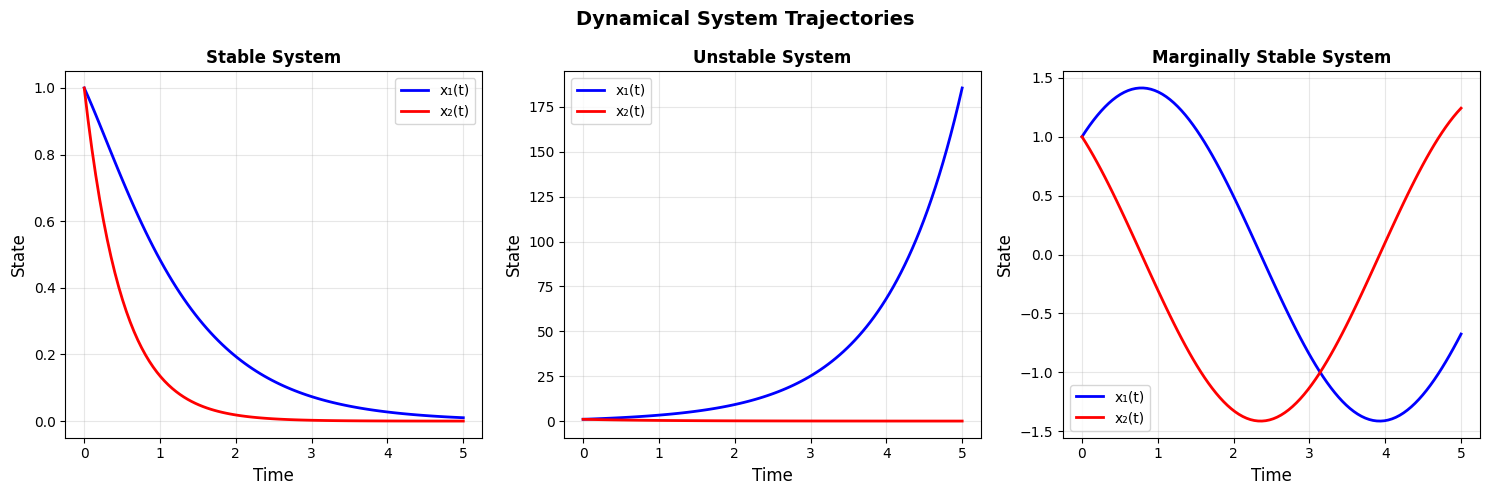


Applications: Control systems, population dynamics, chemical reactions
Key Insight: Eigenvalues determine long-term behavior of linear systems!


In [34]:
# Linear dynamical system: dx/dt = A * x
# Stability depends on eigenvalues of A

# Stable system (all eigenvalues < 0)
A_stable = np.array([
    [-1, 0.5],
    [0, -2]
])

# Unstable system (some eigenvalues > 0)
A_unstable = np.array([
    [1, 0.5],
    [0, -1]
])

# Marginally stable (eigenvalues = 0)
A_marginal = np.array([
    [0, 1],
    [-1, 0]
])

matrices = [A_stable, A_unstable, A_marginal]
names = ['Stable', 'Unstable', 'Marginally Stable']

print("Dynamical Systems - Stability Analysis:")
print("=" * 60)

for A, name in zip(matrices, names):
    eigenvalues_ds, eigenvectors_ds = eig(A)
    eigenvalues_ds = eigenvalues_ds
    
    print(f"\n{name} System:")
    print(f"  Matrix A:\n{A}")
    print(f"  Eigenvalues: {eigenvalues_ds}")
    
    # Determine stability
    real_parts = np.real(eigenvalues_ds)
    if np.all(real_parts < 0):
        stability = "Stable (all Re(λ) < 0)"
    elif np.any(real_parts > 0):
        stability = "Unstable (some Re(λ) > 0)"
    else:
        stability = "Marginally stable (Re(λ) = 0)"
    
    print(f"  Stability: {stability}")

# Visualize trajectories for stable system
from scipy.integrate import odeint

def system_dynamics(x, t, A):
    """dx/dt = A * x"""
    return A @ x

# Initial conditions
x0 = np.array([1, 1])
t = np.linspace(0, 5, 100)

# Solve for each system
solutions = []
for A in matrices:
    sol = odeint(system_dynamics, x0, t, args=(A,))
    solutions.append(sol)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (sol, name) in enumerate(zip(solutions, names)):
    axes[i].plot(t, sol[:, 0], 'b-', label='x₁(t)', linewidth=2)
    axes[i].plot(t, sol[:, 1], 'r-', label='x₂(t)', linewidth=2)
    axes[i].set_xlabel('Time', fontsize=12)
    axes[i].set_ylabel('State', fontsize=12)
    axes[i].set_title(f'{name} System', fontsize=12, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Dynamical System Trajectories', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Control systems, population dynamics, chemical reactions")
print("Key Insight: Eigenvalues determine long-term behavior of linear systems!")


---

## Topic 6: Tensors

Tensors are multi-dimensional arrays that generalize vectors and matrices. They're fundamental to deep learning, image processing, and multi-way data analysis.


### Application 6.1: Image Tensors - RGB Images as 3D Tensors

Images are naturally represented as tensors: height × width × channels.


Image as 3D Tensor:
Tensor shape: (64, 64, 3) (height × width × channels)
Tensor dtype: uint8
Total elements: 12288
Memory size: 12288 bytes

Individual channels:
  Red channel shape: (64, 64)
  Green channel shape: (64, 64)
  Blue channel shape: (64, 64)
  Grayscale shape: (64, 64)


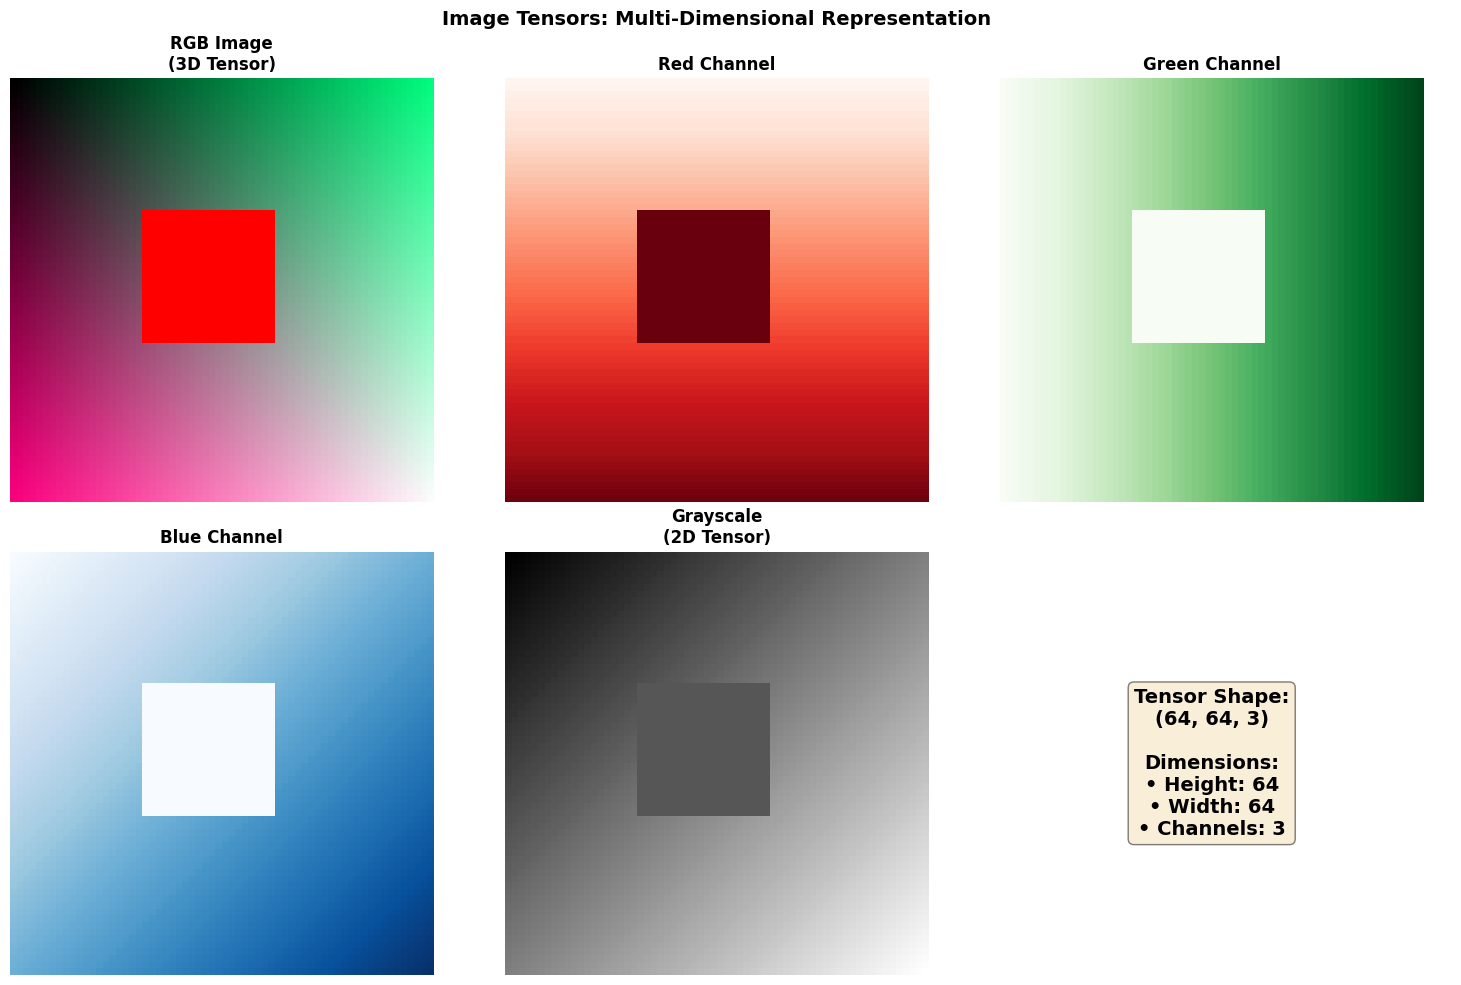


Key Insight: Images are naturally 3D tensors (or 4D with batch dimension)!


In [35]:
# RGB image as 3D tensor
height, width, channels = 64, 64, 3

# Create a synthetic RGB image
image_tensor = np.zeros((height, width, channels))

# Add some patterns
for i in range(height):
    for j in range(width):
        # Create a gradient pattern
        image_tensor[i, j, 0] = i / height * 255  # Red channel
        image_tensor[i, j, 1] = j / width * 255   # Green channel
        image_tensor[i, j, 2] = (i + j) / (height + width) * 255  # Blue channel

# Add a colored square
image_tensor[20:40, 20:40, :] = [255, 0, 0]  # Red square

image_tensor = np.clip(image_tensor, 0, 255).astype(np.uint8)

print("Image as 3D Tensor:")
print("=" * 60)
print(f"Tensor shape: {image_tensor.shape} (height × width × channels)")
print(f"Tensor dtype: {image_tensor.dtype}")
print(f"Total elements: {image_tensor.size}")
print(f"Memory size: {image_tensor.nbytes} bytes")

# Extract individual channels
red_channel = image_tensor[:, :, 0]
green_channel = image_tensor[:, :, 1]
blue_channel = image_tensor[:, :, 2]

# Convert to grayscale (2D tensor)
grayscale = np.mean(image_tensor, axis=2).astype(np.uint8)

print(f"\nIndividual channels:")
print(f"  Red channel shape: {red_channel.shape}")
print(f"  Green channel shape: {green_channel.shape}")
print(f"  Blue channel shape: {blue_channel.shape}")
print(f"  Grayscale shape: {grayscale.shape}")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# RGB image
axes[0, 0].imshow(image_tensor)
axes[0, 0].set_title('RGB Image\n(3D Tensor)', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

# Individual channels
axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title('Red Channel', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(green_channel, cmap='Greens')
axes[0, 2].set_title('Green Channel', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

axes[1, 0].imshow(blue_channel, cmap='Blues')
axes[1, 0].set_title('Blue Channel', fontsize=12, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(grayscale, cmap='gray')
axes[1, 1].set_title('Grayscale\n(2D Tensor)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

# Tensor structure visualization
axes[1, 2].text(0.5, 0.5, f'Tensor Shape:\n{image_tensor.shape}\n\n'
                          f'Dimensions:\n• Height: {height}\n• Width: {width}\n• Channels: {channels}',
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 2].axis('off')

plt.suptitle('Image Tensors: Multi-Dimensional Representation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insight: Images are naturally 3D tensors (or 4D with batch dimension)!")


### Application 6.2: Neural Network Weight Tensors

Neural networks use tensors to represent weights and activations across layers.


Neural Network Weight Tensors:
Convolutional weights shape: (32, 3, 5, 5)
  Interpretation: 32 filters, 3 input channels,
                  5×5 kernel size

Fully connected weights shape: (128, 1024)
  Interpretation: 128 outputs, 1024 inputs

Batch of images shape: (8, 3, 32, 32)
  Interpretation: 8 samples, 3 channels,
                  32×32 spatial dimensions

Memory usage:
  Conv weights: 0.0183 MB
  FC weights: 1.0000 MB
  Batch: 0.1875 MB


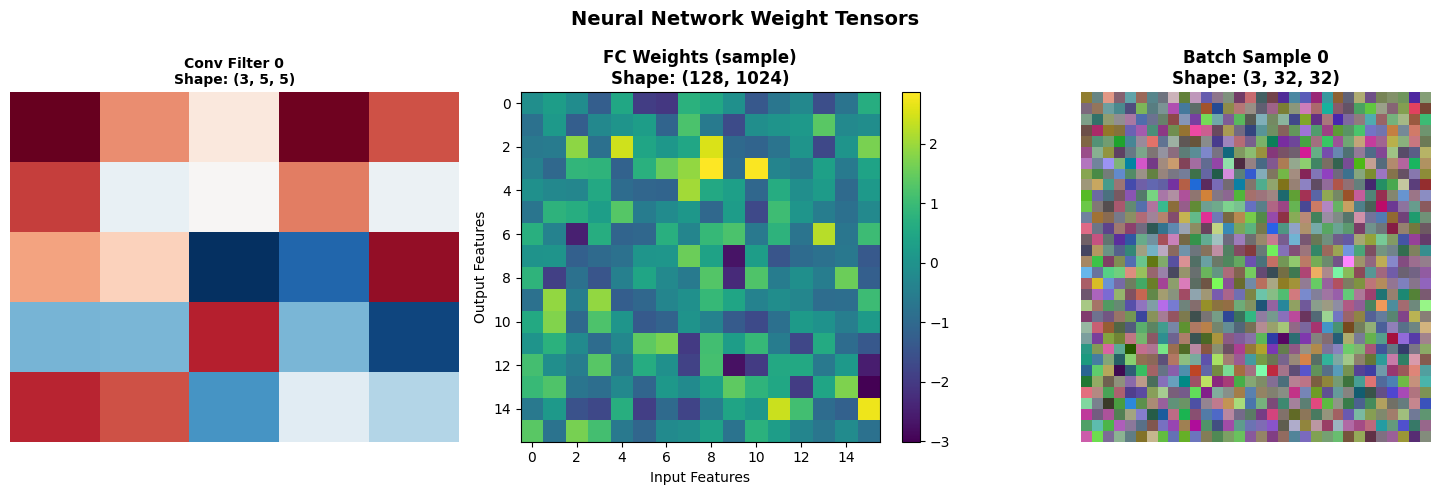


Key Insight: Deep learning uses high-dimensional tensors for efficient computation!


In [36]:
# Neural network weight tensors
# Example: Convolutional layer weights

# Convolutional layer: (out_channels, in_channels, kernel_height, kernel_width)
conv_weights = np.random.randn(32, 3, 5, 5)  # 32 filters, 3 input channels, 5x5 kernel

# Fully connected layer: (out_features, in_features)
fc_weights = np.random.randn(128, 1024)  # 128 outputs, 1024 inputs

# Batch of images: (batch_size, channels, height, width)
batch_images = np.random.randn(8, 3, 32, 32)  # Batch of 8 RGB images

print("Neural Network Weight Tensors:")
print("=" * 60)
print(f"Convolutional weights shape: {conv_weights.shape}")
print(f"  Interpretation: {conv_weights.shape[0]} filters, {conv_weights.shape[1]} input channels,")
print(f"                  {conv_weights.shape[2]}×{conv_weights.shape[3]} kernel size")
print(f"\nFully connected weights shape: {fc_weights.shape}")
print(f"  Interpretation: {fc_weights.shape[0]} outputs, {fc_weights.shape[1]} inputs")
print(f"\nBatch of images shape: {batch_images.shape}")
print(f"  Interpretation: {batch_images.shape[0]} samples, {batch_images.shape[1]} channels,")
print(f"                  {batch_images.shape[2]}×{batch_images.shape[3]} spatial dimensions")

# Compute memory usage
conv_memory = conv_weights.nbytes / (1024**2)  # MB
fc_memory = fc_weights.nbytes / (1024**2)
batch_memory = batch_images.nbytes / (1024**2)

print(f"\nMemory usage:")
print(f"  Conv weights: {conv_memory:.4f} MB")
print(f"  FC weights: {fc_memory:.4f} MB")
print(f"  Batch: {batch_memory:.4f} MB")

# Visualize tensor shapes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Conv weights visualization (show a few filters)
n_filters_show = 4
for i in range(n_filters_show):
    filter_vis = conv_weights[i, 0, :, :]  # First channel of filter i
    row = i // 2
    col = i % 2
    if i < 4:
        ax = axes[0] if i == 0 else None
        if ax is None:
            continue
        im = ax.imshow(filter_vis, cmap='RdBu', aspect='auto')
        ax.set_title(f'Conv Filter {i}\nShape: {conv_weights[i].shape}', fontsize=10, fontweight='bold')
        ax.axis('off')

# FC weights heatmap (sample)
sample_fc = fc_weights[:16, :16]  # Sample 16x16
im1 = axes[1].imshow(sample_fc, cmap='viridis', aspect='auto')
axes[1].set_title(f'FC Weights (sample)\nShape: {fc_weights.shape}', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Input Features')
axes[1].set_ylabel('Output Features')
plt.colorbar(im1, ax=axes[1])

# Batch visualization (first image, all channels)
first_image = batch_images[0]  # Shape: (3, 32, 32)
# Combine channels for visualization
combined = np.transpose(first_image, (1, 2, 0))  # (32, 32, 3)
combined_normalized = (combined - combined.min()) / (combined.max() - combined.min() + 1e-10)
axes[2].imshow(combined_normalized)
axes[2].set_title(f'Batch Sample 0\nShape: {batch_images[0].shape}', fontsize=12, fontweight='bold')
axes[2].axis('off')

plt.suptitle('Neural Network Weight Tensors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insight: Deep learning uses high-dimensional tensors for efficient computation!")


### Application 6.3: Tensor Operations - Reshaping and Slicing

Tensor operations like reshaping and slicing are fundamental to data manipulation.


Tensor Operations:
Original tensor shape: (2, 3, 4)
Original tensor:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

Reshaped to 2D (6×4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]

Flattened to 1D: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Transposed (permute dims): shape = (4, 2, 3)

Slicing:
  First slice [0, :, :] shape: (3, 4)
  Middle slice [:, 1, :] shape: (2, 4)
  Range slice [:, :, 1:3] shape: (2, 3, 2)

Broadcasting:
  A shape: (3, 4, 5)
  B shape: (5,)
  C = A + B shape: (3, 4, 5)


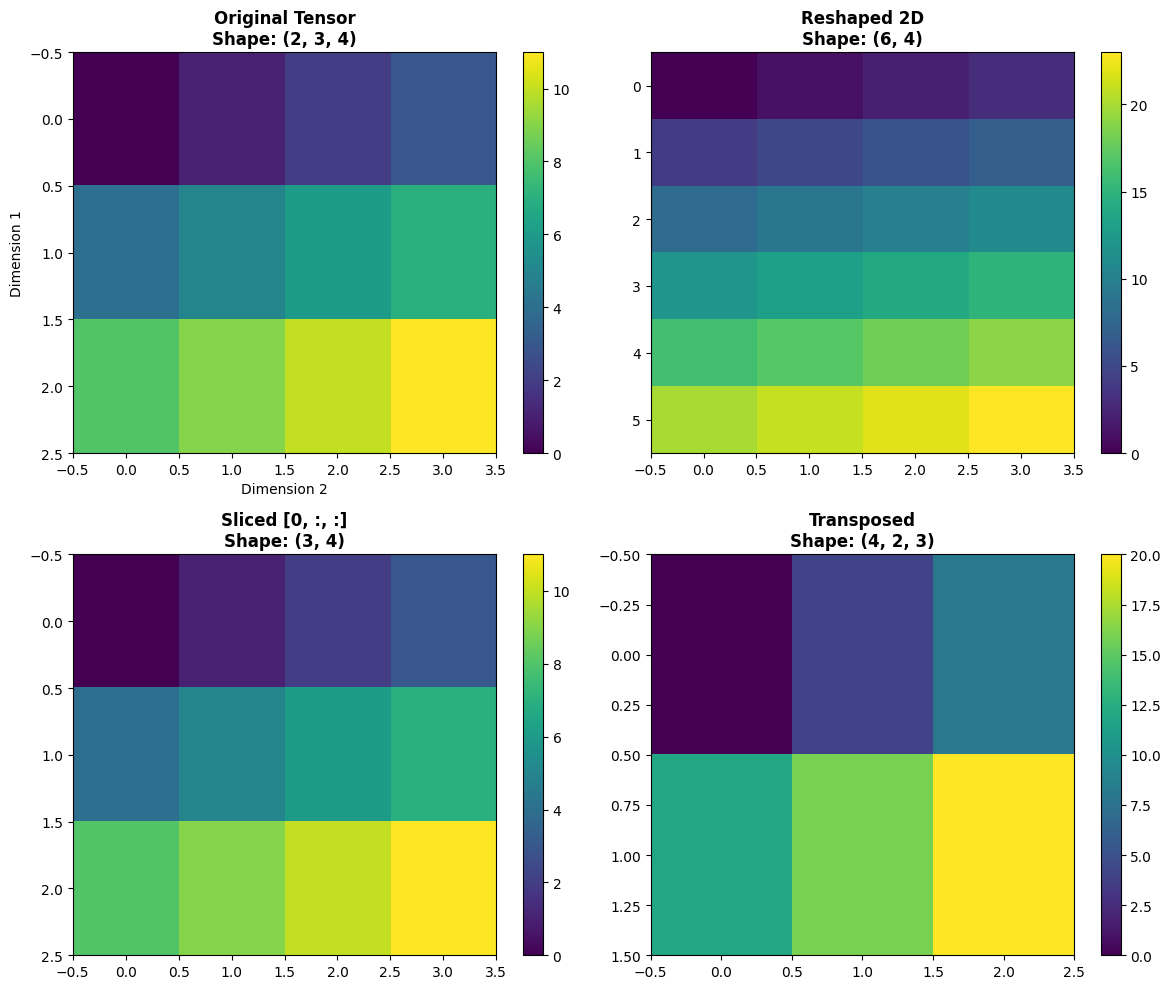


Applications: Data preprocessing, neural network layers, batch processing


In [37]:
# Tensor operations: reshaping, slicing, broadcasting

# Original tensor
original = np.arange(24).reshape(2, 3, 4)

print("Tensor Operations:")
print("=" * 60)
print(f"Original tensor shape: {original.shape}")
print(f"Original tensor:\n{original}")

# Reshape operations
reshaped_2d = original.reshape(6, 4)
reshaped_1d = original.flatten()
reshaped_transpose = original.transpose(2, 0, 1)  # Permute dimensions

print(f"\nReshaped to 2D (6×4):\n{reshaped_2d}")
print(f"\nFlattened to 1D: {reshaped_1d}")
print(f"\nTransposed (permute dims): shape = {reshaped_transpose.shape}")

# Slicing operations
slice_first = original[0, :, :]  # First element along first dimension
slice_middle = original[:, 1, :]  # Middle element along second dimension
slice_range = original[:, :, 1:3]  # Range along third dimension

print(f"\nSlicing:")
print(f"  First slice [0, :, :] shape: {slice_first.shape}")
print(f"  Middle slice [:, 1, :] shape: {slice_middle.shape}")
print(f"  Range slice [:, :, 1:3] shape: {slice_range.shape}")

# Broadcasting
A = np.random.randn(3, 4, 5)
B = np.random.randn(5,)  # Can broadcast to last dimension
C = A + B  # Broadcasting: (3,4,5) + (5,) → (3,4,5)

print(f"\nBroadcasting:")
print(f"  A shape: {A.shape}")
print(f"  B shape: {B.shape}")
print(f"  C = A + B shape: {C.shape}")

# Visualize reshaping
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original
im1 = axes[0, 0].imshow(original[0], cmap='viridis', aspect='auto')
axes[0, 0].set_title(f'Original Tensor\nShape: {original.shape}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Dimension 2')
axes[0, 0].set_ylabel('Dimension 1')
plt.colorbar(im1, ax=axes[0, 0])

# Reshaped 2D
im2 = axes[0, 1].imshow(reshaped_2d, cmap='viridis', aspect='auto')
axes[0, 1].set_title(f'Reshaped 2D\nShape: {reshaped_2d.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[0, 1])

# Sliced
im3 = axes[1, 0].imshow(slice_first, cmap='viridis', aspect='auto')
axes[1, 0].set_title(f'Sliced [0, :, :]\nShape: {slice_first.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im3, ax=axes[1, 0])

# Transposed
im4 = axes[1, 1].imshow(reshaped_transpose[0], cmap='viridis', aspect='auto')
axes[1, 1].set_title(f'Transposed\nShape: {reshaped_transpose.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im4, ax=axes[1, 1])

plt.tight_layout()
plt.show()

print("\nApplications: Data preprocessing, neural network layers, batch processing")


### Application 6.4: Video Processing - 4D Tensors

Videos are 4D tensors: frames × height × width × channels.


Video as 4D Tensor:
Video tensor shape: (10, 32, 32, 3)
  Dimensions: 10 frames × 32×32 pixels × 3 channels
Total elements: 30720
Memory size: 0.03 MB

Frame extraction:
  Frame 0 shape: (32, 32, 3)
  Frame 5 shape: (32, 32, 3)
  Temporal slice shape: (10, 3)


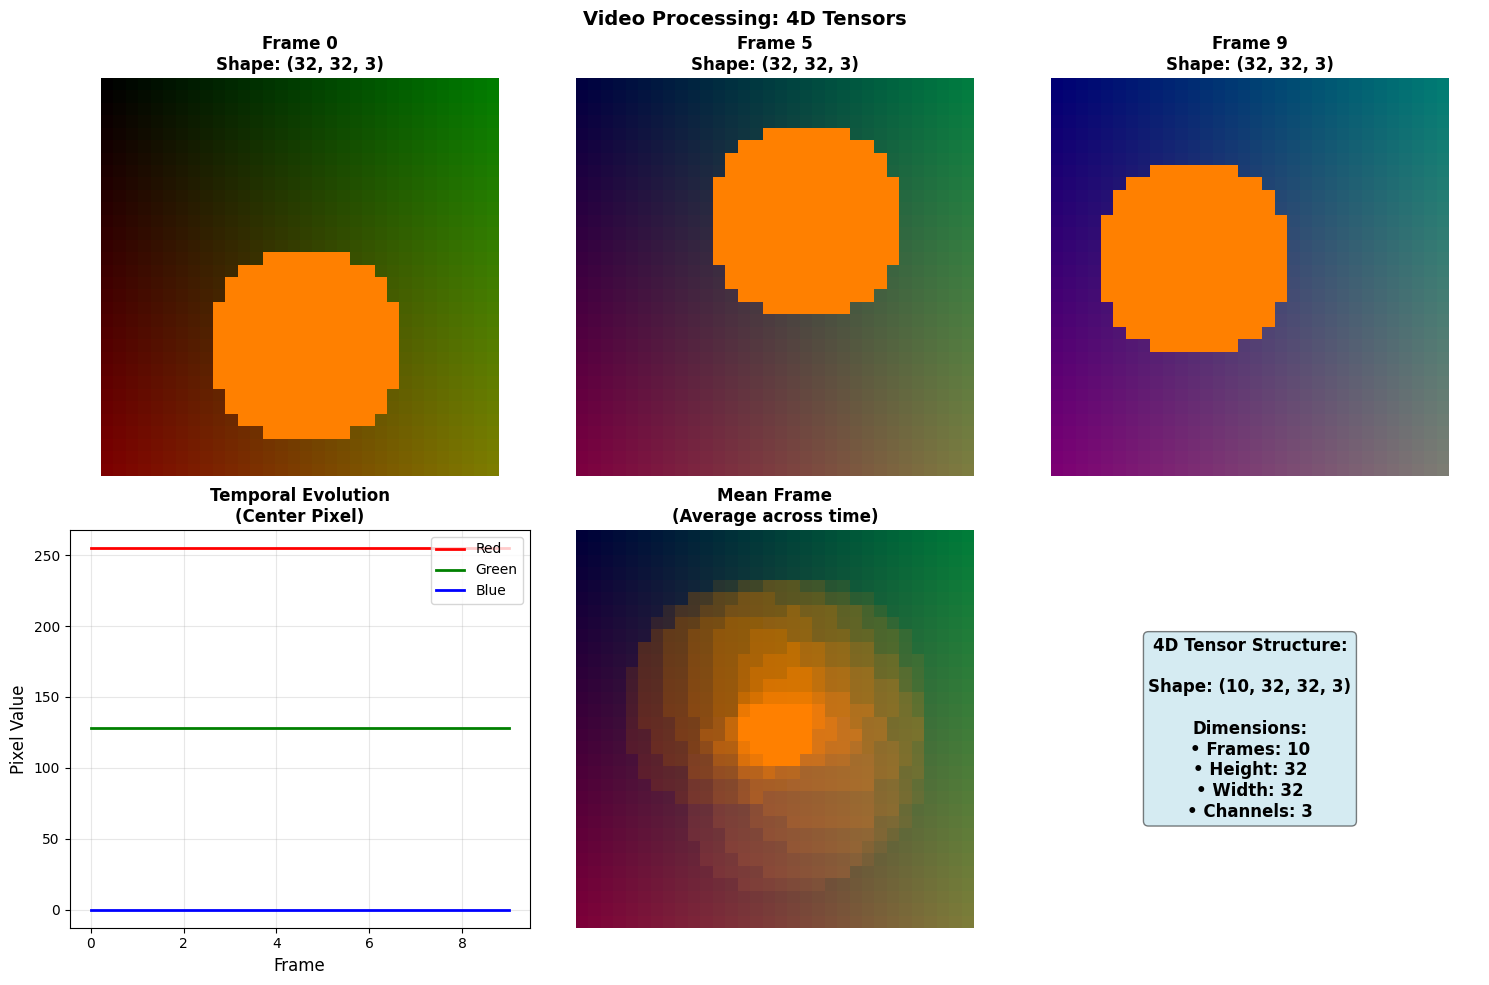


Applications: Video analysis, action recognition, temporal modeling


In [38]:
# Video as 4D tensor: (frames, height, width, channels)
n_frames, height, width, channels = 10, 32, 32, 3

# Create synthetic video (moving pattern)
video_tensor = np.zeros((n_frames, height, width, channels))

for frame in range(n_frames):
    # Create a moving pattern
    center_x = int(width / 2 + 5 * np.sin(frame * 0.5))
    center_y = int(height / 2 + 5 * np.cos(frame * 0.5))
    
    for i in range(height):
        for j in range(width):
            dist = np.sqrt((i - center_y)**2 + (j - center_x)**2)
            if dist < 8:
                video_tensor[frame, i, j, :] = [255, 128, 0]  # Orange circle
            else:
                # Background gradient
                video_tensor[frame, i, j, 0] = i / height * 128
                video_tensor[frame, i, j, 1] = j / width * 128
                video_tensor[frame, i, j, 2] = frame / n_frames * 128

video_tensor = np.clip(video_tensor, 0, 255).astype(np.uint8)

print("Video as 4D Tensor:")
print("=" * 60)
print(f"Video tensor shape: {video_tensor.shape}")
print(f"  Dimensions: {n_frames} frames × {height}×{width} pixels × {channels} channels")
print(f"Total elements: {video_tensor.size}")
print(f"Memory size: {video_tensor.nbytes / (1024**2):.2f} MB")

# Extract frames
frame_0 = video_tensor[0]
frame_mid = video_tensor[n_frames // 2]
frame_last = video_tensor[-1]

# Extract temporal slice (same pixel across frames)
temporal_slice = video_tensor[:, height//2, width//2, :]

print(f"\nFrame extraction:")
print(f"  Frame 0 shape: {frame_0.shape}")
print(f"  Frame {n_frames//2} shape: {frame_mid.shape}")
print(f"  Temporal slice shape: {temporal_slice.shape}")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sample frames
axes[0, 0].imshow(frame_0)
axes[0, 0].set_title(f'Frame 0\nShape: {frame_0.shape}', fontsize=12, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(frame_mid)
axes[0, 1].set_title(f'Frame {n_frames//2}\nShape: {frame_mid.shape}', fontsize=12, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(frame_last)
axes[0, 2].set_title(f'Frame {n_frames-1}\nShape: {frame_last.shape}', fontsize=12, fontweight='bold')
axes[0, 2].axis('off')

# Temporal evolution
axes[1, 0].plot(temporal_slice[:, 0], 'r-', label='Red', linewidth=2)
axes[1, 0].plot(temporal_slice[:, 1], 'g-', label='Green', linewidth=2)
axes[1, 0].plot(temporal_slice[:, 2], 'b-', label='Blue', linewidth=2)
axes[1, 0].set_xlabel('Frame', fontsize=12)
axes[1, 0].set_ylabel('Pixel Value', fontsize=12)
axes[1, 0].set_title('Temporal Evolution\n(Center Pixel)', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Video statistics
mean_frame = np.mean(video_tensor, axis=0).astype(np.uint8)
axes[1, 1].imshow(mean_frame)
axes[1, 1].set_title('Mean Frame\n(Average across time)', fontsize=12, fontweight='bold')
axes[1, 1].axis('off')

# Tensor structure
axes[1, 2].text(0.5, 0.5, f'4D Tensor Structure:\n\n'
                          f'Shape: {video_tensor.shape}\n\n'
                          f'Dimensions:\n• Frames: {n_frames}\n• Height: {height}\n• Width: {width}\n• Channels: {channels}',
                ha='center', va='center', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
axes[1, 2].axis('off')

plt.suptitle('Video Processing: 4D Tensors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Video analysis, action recognition, temporal modeling")


### Application 6.5: Tensor Decomposition - CP and Tucker Decompositions

Tensor decompositions generalize matrix decompositions to higher dimensions.


Tensor Decomposition (CP - Simplified):
Original tensor shape: (4, 5, 6)
Decomposition rank: 3

Factor matrices:
  A shape: (4, 3)
  B shape: (5, 3)
  C shape: (6, 3)

Reconstruction error (Frobenius): 9.5162
Relative error: 0.9860 (98.60%)


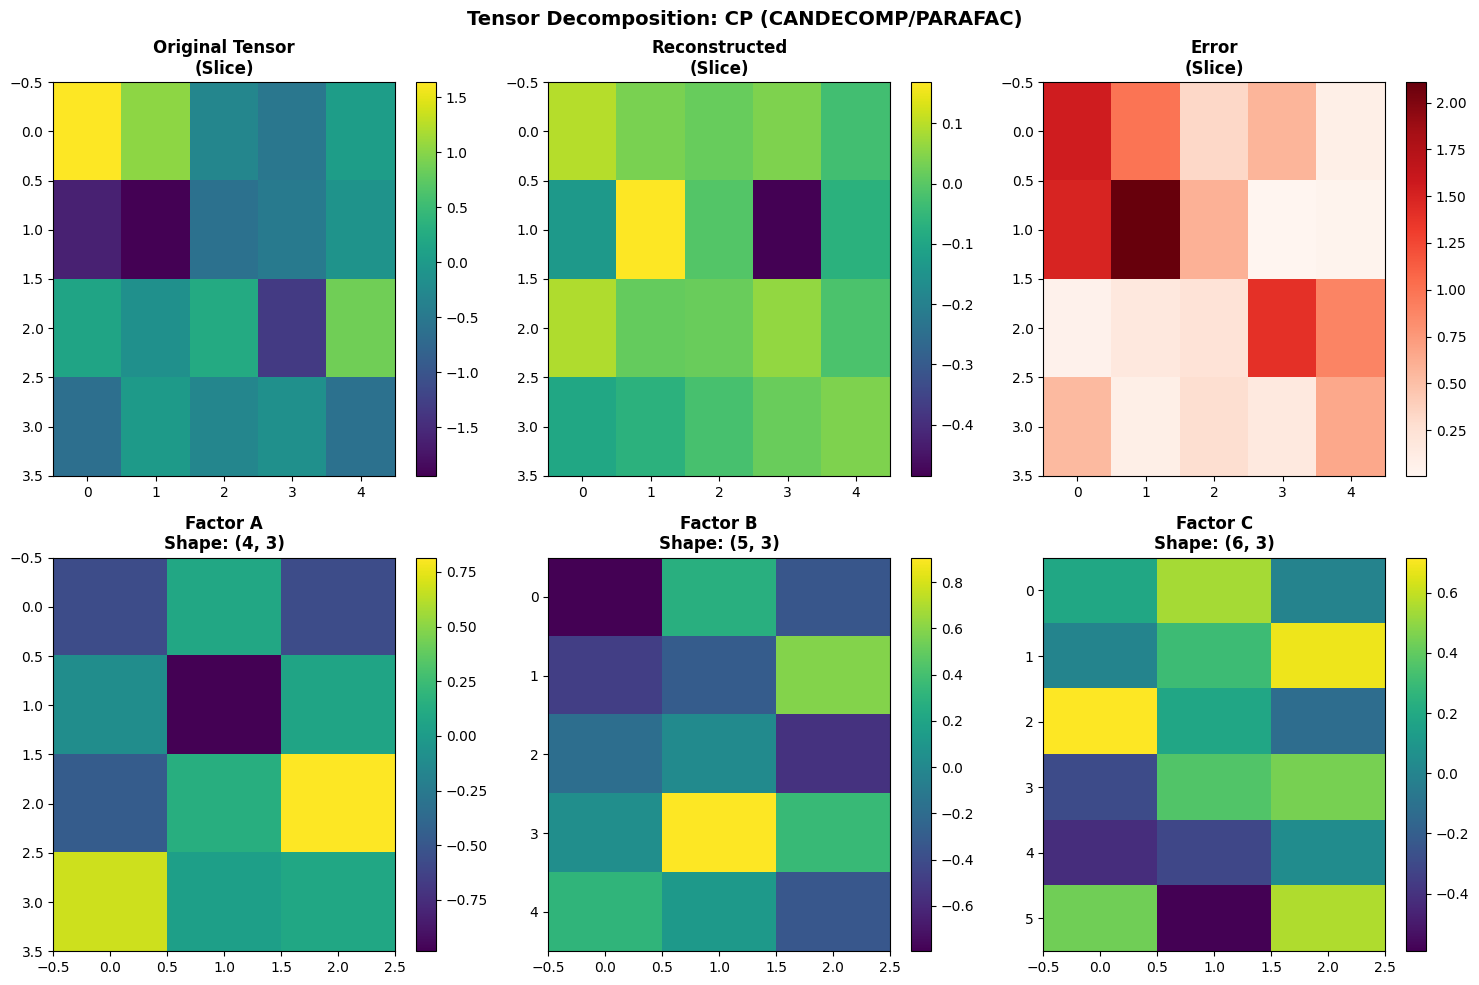


Applications: Multi-way data analysis, recommender systems, signal processing
Key Insight: Tensor decompositions compress high-dimensional data efficiently!


In [40]:
# Simplified tensor decomposition example
# CP (CANDECOMP/PARAFAC) decomposition: approximate tensor as sum of rank-1 tensors

# Create a 3D tensor
tensor_3d = np.random.randn(4, 5, 6)

# CP decomposition (simplified): T ≈ Σ λᵣ × aᵣ ⊗ bᵣ ⊗ cᵣ
# For demonstration, use SVD on unfolded matrices

rank_cp = 3

# Unfold tensor along different modes
mode1_unfold = tensor_3d.reshape(4, -1)  # Mode-1 unfolding
mode2_unfold = tensor_3d.transpose(1, 0, 2).reshape(5, -1)  # Mode-2 unfolding
mode3_unfold = tensor_3d.transpose(2, 0, 1).reshape(6, -1)  # Mode-3 unfolding

# SVD of unfolded matrices
U1, s1, Vh1 = np.linalg.svd(mode1_unfold, full_matrices=False)
U2, s2, Vh2 = np.linalg.svd(mode2_unfold, full_matrices=False)
U3, s3, Vh3 = np.linalg.svd(mode3_unfold, full_matrices=False)

# Extract factors
A = U1[:, :rank_cp]
B = U2[:, :rank_cp]
C = U3[:, :rank_cp]

# Reconstruct (simplified CP)
tensor_reconstructed = np.zeros_like(tensor_3d)
for r in range(rank_cp):
    # Outer product: a_r ⊗ b_r ⊗ c_r
    outer = np.einsum('i,j,k->ijk', A[:, r], B[:, r], C[:, r])
    tensor_reconstructed += outer

# Compute Frobenius norm using np.linalg.norm with ord=None (default) for tensors
reconstruction_error = np.linalg.norm(tensor_3d - tensor_reconstructed)
relative_error_tensor = reconstruction_error / np.linalg.norm(tensor_3d)

print("Tensor Decomposition (CP - Simplified):")
print("=" * 60)
print(f"Original tensor shape: {tensor_3d.shape}")
print(f"Decomposition rank: {rank_cp}")
print(f"\nFactor matrices:")
print(f"  A shape: {A.shape}")
print(f"  B shape: {B.shape}")
print(f"  C shape: {C.shape}")
print(f"\nReconstruction error (Frobenius): {reconstruction_error:.4f}")
print(f"Relative error: {relative_error_tensor:.4f} ({relative_error_tensor*100:.2f}%)")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original tensor (slice)
im1 = axes[0, 0].imshow(tensor_3d[:, :, 0], cmap='viridis', aspect='auto')
axes[0, 0].set_title('Original Tensor\n(Slice)', fontsize=12, fontweight='bold')
plt.colorbar(im1, ax=axes[0, 0])

# Reconstructed tensor (slice)
im2 = axes[0, 1].imshow(tensor_reconstructed[:, :, 0], cmap='viridis', aspect='auto')
axes[0, 1].set_title('Reconstructed\n(Slice)', fontsize=12, fontweight='bold')
plt.colorbar(im2, ax=axes[0, 1])

# Error (slice)
error_slice = np.abs(tensor_3d[:, :, 0] - tensor_reconstructed[:, :, 0])
im3 = axes[0, 2].imshow(error_slice, cmap='Reds', aspect='auto')
axes[0, 2].set_title('Error\n(Slice)', fontsize=12, fontweight='bold')
plt.colorbar(im3, ax=axes[0, 2])

# Factor matrices
im4 = axes[1, 0].imshow(A, cmap='viridis', aspect='auto')
axes[1, 0].set_title(f'Factor A\nShape: {A.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im4, ax=axes[1, 0])

im5 = axes[1, 1].imshow(B, cmap='viridis', aspect='auto')
axes[1, 1].set_title(f'Factor B\nShape: {B.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im5, ax=axes[1, 1])

im6 = axes[1, 2].imshow(C, cmap='viridis', aspect='auto')
axes[1, 2].set_title(f'Factor C\nShape: {C.shape}', fontsize=12, fontweight='bold')
plt.colorbar(im6, ax=axes[1, 2])

plt.suptitle('Tensor Decomposition: CP (CANDECOMP/PARAFAC)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Multi-way data analysis, recommender systems, signal processing")
print("Key Insight: Tensor decompositions compress high-dimensional data efficiently!")


### Application 6.6: Multi-way Data - Recommender Systems with Multiple Dimensions

Tensors enable modeling multi-dimensional relationships in recommender systems.


Multi-way Recommender System Tensor:
Rating tensor shape: (10, 15, 3)
  Dimensions: 10 users × 15 items × 3 contexts

Sample ratings:
  User 0, Item 0: [2.87922493 4.0853592  3.06585483]
  User 0, Item 1: [3.87332377 3.03654283 2.83542628]

Aggregate statistics:
  Overall mean: 3.02
  Mean by user: [2.9011918  3.05452563 2.97931245 3.06083097 3.06652201]
  Mean by item: [2.93049614 2.98097775 3.04184252 2.86909322 3.12867656]
  Mean by context: [2.71988178 2.96743317 3.36195318]


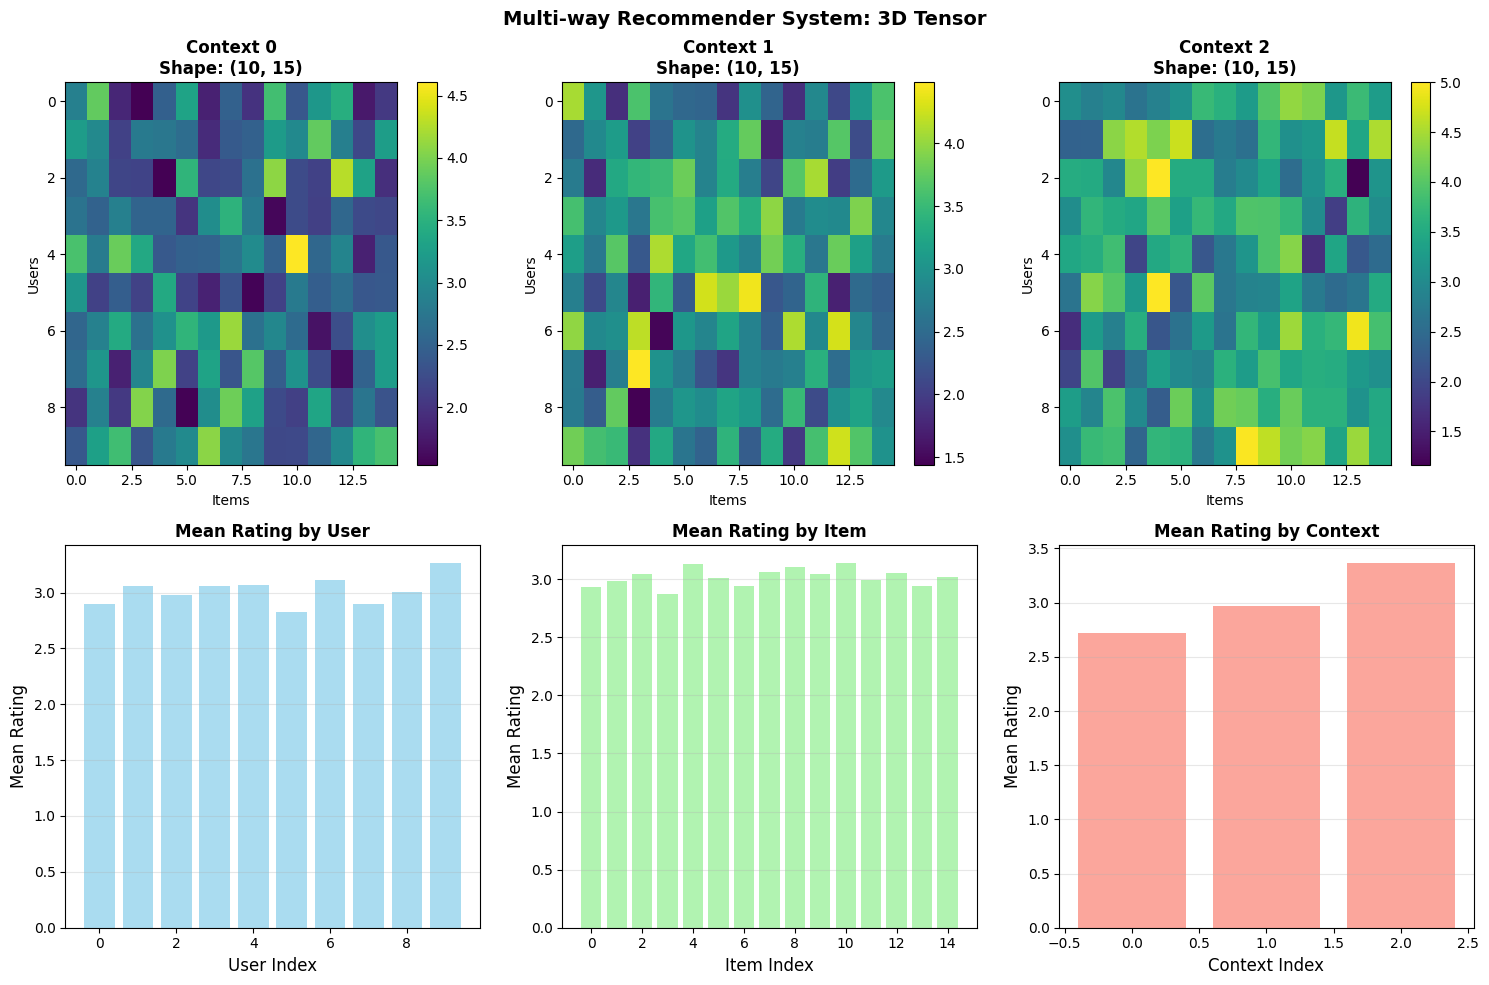


Applications: Context-aware recommendations, multi-dimensional data analysis
Key Insight: Tensors capture complex multi-way relationships!


In [41]:
# Multi-way recommender system: users × items × contexts
# Example: users rate movies in different contexts (time, location, etc.)

n_users, n_items, n_contexts = 10, 15, 3

# Create 3D rating tensor
rating_tensor = np.zeros((n_users, n_items, n_contexts))

# Generate synthetic ratings
np.random.seed(42)
for u in range(n_users):
    for i in range(n_items):
        for c in range(n_contexts):
            # Base rating + user bias + item bias + context effect
            base_rating = 3.0
            user_bias = np.random.randn() * 0.5
            item_bias = np.random.randn() * 0.5
            context_effect = (c - 1) * 0.3  # Contexts have different effects
            rating = base_rating + user_bias + item_bias + context_effect
            rating_tensor[u, i, c] = np.clip(rating, 1, 5)

print("Multi-way Recommender System Tensor:")
print("=" * 60)
print(f"Rating tensor shape: {rating_tensor.shape}")
print(f"  Dimensions: {n_users} users × {n_items} items × {n_contexts} contexts")
print(f"\nSample ratings:")
print(f"  User 0, Item 0: {rating_tensor[0, 0, :]}")
print(f"  User 0, Item 1: {rating_tensor[0, 1, :]}")

# Aggregate statistics
mean_rating = np.mean(rating_tensor)
mean_by_user = np.mean(rating_tensor, axis=(1, 2))
mean_by_item = np.mean(rating_tensor, axis=(0, 2))
mean_by_context = np.mean(rating_tensor, axis=(0, 1))

print(f"\nAggregate statistics:")
print(f"  Overall mean: {mean_rating:.2f}")
print(f"  Mean by user: {mean_by_user[:5]}")
print(f"  Mean by item: {mean_by_item[:5]}")
print(f"  Mean by context: {mean_by_context}")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Tensor structure
im1 = axes[0, 0].imshow(rating_tensor[:, :, 0], cmap='viridis', aspect='auto')
axes[0, 0].set_title(f'Context 0\nShape: {rating_tensor[:, :, 0].shape}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Items')
axes[0, 0].set_ylabel('Users')
plt.colorbar(im1, ax=axes[0, 0])

im2 = axes[0, 1].imshow(rating_tensor[:, :, 1], cmap='viridis', aspect='auto')
axes[0, 1].set_title(f'Context 1\nShape: {rating_tensor[:, :, 1].shape}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Items')
axes[0, 1].set_ylabel('Users')
plt.colorbar(im2, ax=axes[0, 1])

im3 = axes[0, 2].imshow(rating_tensor[:, :, 2], cmap='viridis', aspect='auto')
axes[0, 2].set_title(f'Context 2\nShape: {rating_tensor[:, :, 2].shape}', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Items')
axes[0, 2].set_ylabel('Users')
plt.colorbar(im3, ax=axes[0, 2])

# Statistics
axes[1, 0].bar(range(len(mean_by_user)), mean_by_user, alpha=0.7, color='skyblue')
axes[1, 0].set_xlabel('User Index', fontsize=12)
axes[1, 0].set_ylabel('Mean Rating', fontsize=12)
axes[1, 0].set_title('Mean Rating by User', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].bar(range(len(mean_by_item)), mean_by_item, alpha=0.7, color='lightgreen')
axes[1, 1].set_xlabel('Item Index', fontsize=12)
axes[1, 1].set_ylabel('Mean Rating', fontsize=12)
axes[1, 1].set_title('Mean Rating by Item', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

axes[1, 2].bar(range(len(mean_by_context)), mean_by_context, alpha=0.7, color='salmon')
axes[1, 2].set_xlabel('Context Index', fontsize=12)
axes[1, 2].set_ylabel('Mean Rating', fontsize=12)
axes[1, 2].set_title('Mean Rating by Context', fontsize=12, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.suptitle('Multi-way Recommender System: 3D Tensor', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nApplications: Context-aware recommendations, multi-dimensional data analysis")
print("Key Insight: Tensors capture complex multi-way relationships!")


---

## Summary and Key Takeaways

This comprehensive notebook demonstrated fundamental linear algebra concepts through real-world applications. Let's summarize the key insights and relationships.


In [42]:
# Create comprehensive summary table
import pandas as pd

concepts_summary = {
    'Concept': [
        'Vectors',
        'Matrix Operations',
        'Basis',
        'Norms',
        'Eigenvectors/Eigenvalues',
        'Tensors'
    ],
    'Key Applications': [
        'Physics, similarity, projections, data representation',
        'Neural networks, transformations, solving systems',
        'Coordinate systems, PCA, graphics, signal processing',
        'Regularization, distance metrics, optimization',
        'PageRank, eigenfaces, spectral clustering, stability',
        'Images, deep learning, video, multi-way data'
    ],
    'Fundamental Operations': [
        'Addition, dot product, cross product, projection',
        'Multiplication, inverse, determinant, decomposition',
        'Gram-Schmidt, change of basis, orthonormalization',
        'L1, L2, L∞, Frobenius, Nuclear',
        'Eigendecomposition, diagonalization',
        'Reshaping, slicing, broadcasting, decomposition'
    ],
    'Real-World Impact': [
        'Foundation of all data structures',
        'Computational backbone of ML/AI',
        'Enables dimensionality reduction',
        'Controls model complexity',
        'Reveals hidden structure',
        'Handles multi-dimensional data'
    ]
}

df_concepts = pd.DataFrame(concepts_summary)
print("Linear Algebra Concepts Summary:")
print("=" * 100)
print(df_concepts.to_string(index=False))
print("=" * 100)


Linear Algebra Concepts Summary:
                 Concept                                      Key Applications                              Fundamental Operations                 Real-World Impact
                 Vectors Physics, similarity, projections, data representation    Addition, dot product, cross product, projection Foundation of all data structures
       Matrix Operations     Neural networks, transformations, solving systems Multiplication, inverse, determinant, decomposition   Computational backbone of ML/AI
                   Basis  Coordinate systems, PCA, graphics, signal processing   Gram-Schmidt, change of basis, orthonormalization  Enables dimensionality reduction
                   Norms        Regularization, distance metrics, optimization                      L1, L2, L∞, Frobenius, Nuclear         Controls model complexity
Eigenvectors/Eigenvalues  PageRank, eigenfaces, spectral clustering, stability                 Eigendecomposition, diagonalization          Re

### Key Relationships and Connections

1. **Vectors → Matrices → Tensors**: A natural progression from 1D to 2D to multi-dimensional structures
   - Vectors are 1D arrays (rank-1 tensors)
   - Matrices are 2D arrays (rank-2 tensors)
   - Tensors generalize to any dimension

2. **Basis ↔ Eigenvectors**: 
   - Eigenvectors form a natural basis (eigenbasis)
   - PCA uses eigenvectors as basis vectors
   - Change of basis connects different representations

3. **Norms ↔ Regularization**:
   - Different norms lead to different regularization effects
   - L1 promotes sparsity, L2 promotes smoothness
   - Choice of norm affects optimization

4. **Matrix Operations ↔ Neural Networks**:
   - Every layer is a matrix multiplication
   - Weights are matrices/tensors
   - Forward pass = sequential matrix operations

5. **Eigenvalues ↔ Stability & Structure**:
   - Eigenvalues reveal system behavior
   - Principal components maximize variance (eigenvalues)
   - PageRank uses dominant eigenvector

### When to Use Each Concept

**Vectors**: 
- Representing data points, features, or physical quantities
- Computing similarities and distances
- Basic building blocks for all linear algebra

**Matrix Operations**:
- Linear transformations and mappings
- Solving systems of equations
- Neural network computations

**Basis**:
- Dimensionality reduction (PCA)
- Coordinate transformations
- Signal processing (Fourier basis)

**Norms**:
- Regularization in machine learning
- Distance metrics
- Error measurement

**Eigenvectors/Eigenvalues**:
- Finding principal directions (PCA)
- Graph analysis (PageRank, clustering)
- Stability analysis
- Diagonalization

**Tensors**:
- Multi-dimensional data (images, video)
- Deep learning architectures
- Multi-way data analysis

### Common Patterns Across Applications

1. **Decomposition**: Breaking complex structures into simpler components
   - SVD: A = U Σ V^T
   - Eigendecomposition: A = Q Λ Q^T
   - Tensor decomposition: Multi-way factorization

2. **Projection**: Reducing dimensionality while preserving information
   - Vector projection onto subspaces
   - PCA: Project onto principal components
   - Low-rank approximation

3. **Transformation**: Changing representation without losing information
   - Change of basis
   - Coordinate transformations
   - Feature extraction

4. **Optimization**: Finding optimal solutions
   - Regularization with norms
   - Eigenvalue problems
   - Matrix completion

### Mathematical Foundations

All these concepts are unified by fundamental principles:

- **Linearity**: Operations preserve vector addition and scalar multiplication
- **Orthogonality**: Many optimal solutions involve orthogonal structures
- **Decomposition**: Complex objects decompose into simpler parts
- **Invariance**: Key properties remain under certain transformations

### Further Learning

- **Advanced Topics**: 
  - Tensor networks and quantum computing
  - Manifold learning and non-linear dimensionality reduction
  - Randomized linear algebra for large-scale problems

- **Applications**:
  - Computer vision and image processing
  - Natural language processing
  - Recommender systems
  - Scientific computing

- **Tools**:
  - NumPy, SciPy for numerical computation
  - PyTorch, TensorFlow for deep learning
  - NetworkX for graph analysis


---

## Conclusion

This notebook demonstrated **36+ real-world applications** across 6 fundamental linear algebra topics:

1. **Vectors** (6 applications): Physics simulations, similarity measures, projections, data representation
2. **Matrix Operations** (6 applications): Neural networks, image processing, solving systems, decompositions
3. **Basis** (6 applications): Coordinate systems, Gram-Schmidt, PCA, graphics, Fourier transform
4. **Norms** (6 applications): L1/L2 regularization, distance metrics, error bounds, matrix approximation
5. **Eigenvectors/Eigenvalues** (6 applications): PCA, PageRank, vibration analysis, eigenfaces, clustering, stability
6. **Tensors** (6 applications): Images, neural networks, video processing, tensor decomposition, multi-way data

### Key Takeaways

- **Linear algebra is everywhere**: From physics to machine learning to graphics
- **Concepts are interconnected**: Vectors → Matrices → Tensors form a natural hierarchy
- **Applications drive understanding**: Real-world examples make abstract concepts concrete
- **Mathematical elegance**: Simple principles (decomposition, projection, transformation) underlie complex applications

### The Power of Linear Algebra

Linear algebra provides the mathematical foundation for:
- **Data Science**: Representing and analyzing high-dimensional data
- **Machine Learning**: Neural networks, dimensionality reduction, optimization
- **Computer Graphics**: Transformations, rendering, 3D modeling
- **Signal Processing**: Fourier analysis, filtering, compression
- **Scientific Computing**: Solving differential equations, simulations

Understanding these fundamental concepts through practical applications bridges the gap between theory and practice, enabling you to tackle complex problems across diverse domains!

---
